<H1> Mammogram Anormality Detection

<H2> This notebook attemps to train a CNN model which can detect calcification or mass inside mammogram images. 
<H2> The product will be a web-based decision support tool to compliment the assessment of the doctors; by providing an initial opinion from the system.



In [ ]:
!pip install scikit-learn==0.23

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 7.3 MB 9.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [ ]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     |████████████████████████████████| 788kB 6.8MB/s 
     |████████████████████████████████| 368kB 28.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.24.1 which is incompatible.
     |████████████████████████████████| 122kB 8.6MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.24.1 which is incompatible.


In [ ]:
!pip uninstall keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Found existing installation: Keras 2.3.1
Uninstalling Keras-2.3.1:
  Would remove:
    /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/Keras-2.3.1.dist-info/*
    /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/docs/*
    /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/keras/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [ ]:

!pip install keras==2.3.1



In [ ]:
import sklearn

In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 450kB 37.3MB/s 
     |████████████████████████████████| 3.9MB 26.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=f469a2d2d04ecbf7344e5ba7671118cee6048b81906df8aa559932d77968e815
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: 

In [1]:
#!pip install tensorflow

#!pip install keras

!pip install keras==2.3.1

import tensorflow as tf
#from tensorflow.keras import Sequential

#import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 377 kB 15.1 MB/s eta 0:00:01


<H2> Data Sources - Images are from Cancern Imaging Archive (https://www.cancerimagingarchive.net/)
<H3> (1) The Chinese Mammography Database (CMMD)
<H3> (2) The Curated Breast Imaging Subset of DDSM (CBIS-DDSM)


<H3> Loading the images and metadata

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

from zipfile import ZipFile
from io import BytesIO, StringIO

!pip install py7zr

import py7zr


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_784702db720341388d92bbeee9f05362 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_784702db720341388d92bbeee9f05362 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_784702db720341388d92bbeee9f05362 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aUoeXFqCPMwiIzvajTL_OkAVUEZRo-xgrDeRsN0GYdZ4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_784702db720341388d92bbeee9f05362)

body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='CMMD_clinicaldata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_clinical = pd.read_csv(body)
df_clinical.head()



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 65 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 37.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 35.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 33.8 MB/s eta 0:00:01


ID1 LeftRight  Age  number    abnormality classification subtype
0  D1-0001         R   44       2  calcification         Benign     NaN
1  D1-0002         L   40       2  calcification         Benign     NaN
2  D1-0003         L   39       2  calcification         Benign     NaN
3  D1-0004         L   41       2  calcification         Benign     NaN
4  D1-0005         R   42       2  calcification         Benign     NaN

In [ ]:
# Identify quality issues (e.g. missing values, wrong measurements, …)

# Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)

# Get an idea on the value distribution of your data using statistical measures and visualizations

<H2> Feature Exploration

In [ ]:

body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='metadata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_file = pd.read_csv(body)
df_file.head()


Series UID Collection  \
0  1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...       CMMD   
1  1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...       CMMD   
2  1.3.6.1.4.1.14519.5.2.1.1239.1759.610823649257...       CMMD   
3  1.3.6.1.4.1.14519.5.2.1.1239.1759.328825651506...       CMMD   
4  1.3.6.1.4.1.14519.5.2.1.1239.1759.202447815325...       CMMD   

  3rd Party Analysis  Data Description URI Subject ID  \
0                 NO                   NaN    D1-0003   
1                 NO                   NaN    D1-0001   
2                 NO                   NaN    D1-0002   
3                 NO                   NaN    D1-0004   
4                 NO                   NaN    D1-0006   

                                           Study UID  Study Description  \
0  1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...                NaN   
1  1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...                NaN   
2  1.3.6.1.4.1.14519.5.2.1.1239.1759.241519791051...                NaN   
3  1.3.6.1.4.1.14519.5.2.1.1239.1759.132173027545...                NaN   
4  1.3.6.1.4.1.14519.5.2.1.1239.1759.241563313733...                NaN   

   Study Date  Series Description  Manufacturer Modality  \
0  07-18-2011                 NaN           NaN       MG   
1  07-18-2010                 NaN           NaN       MG   
2  07-18-2010                 NaN           NaN       MG   
3  07-18-2011                 NaN           NaN       MG   
4  07-18-2010                 NaN           NaN       MG   

                                      SOP Class Name  \
0  Digital Mammography X-Ray Image Storage - For ...   
1  Digital Mammography X-Ray Image Storage - For ...   
2  Digital Mammography X-Ray Image Storage - For ...   
3  Digital Mammography X-Ray Image Storage - For ...   
4  Digital Mammography X-Ray Image Storage - For ...   

                 SOP Class UID  Number of Images File Size  \
0  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
1  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
2  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
3  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
4  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   

                                    File Location       Download Timestamp  
0  .\CMMD\D1-0003\07-18-2011-25491\1.000000-24283  2021-05-25T13:25:02.646  
1  .\CMMD\D1-0001\07-18-2010-79377\1.000000-70244  2021-05-25T13:25:04.118  
2  .\CMMD\D1-0002\07-18-2010-49231\1.000000-45313   2021-05-25T13:25:04.52  
3  .\CMMD\D1-0004\07-18-2011-14914\1.000000-36301  2021-05-25T13:25:07.566  
4  .\CMMD\D1-0006\07-18-2010-16802\1.000000-64676   2021-05-25T13:25:09.34

In [ ]:
df_clinical['subtype'] = df_clinical['subtype'].fillna('No SubType')

In [ ]:
df_clinical.head()


ID1 LeftRight  Age  number    abnormality classification     subtype
0  D1-0001         R   44       2  calcification         Benign  No SubType
1  D1-0002         L   40       2  calcification         Benign  No SubType
2  D1-0003         L   39       2  calcification         Benign  No SubType
3  D1-0004         L   41       2  calcification         Benign  No SubType
4  D1-0005         R   42       2  calcification         Benign  No SubType

In [ ]:
df_clinical.isna().any()

ID1               False
LeftRight         False
Age               False
number            False
abnormality       False
classification    False
subtype           False
dtype: bool

In [ ]:
df_clinical.nunique()

ID1               1775
LeftRight            2
Age                 69
abnormality          3
classification       2
subtype              5
dtype: int64

In [ ]:
print(df_clinical.abnormality.unique())
print(df_clinical.classification.unique())
print(df_clinical.subtype.unique())


['calcification' 'both' 'mass']
['Benign' 'Malignant']
['No SubType' 'Luminal B' 'HER2-enriched' 'Luminal A' 'triple negative']


In [ ]:
print(df_clinical.groupby('abnormality').count())
print(df_clinical.groupby('classification').count())
print(df_clinical.groupby('subtype').count())

                ID1  LeftRight   Age  classification  subtype
abnormality                                                  
both            461        461   461             461      461
calcification   262        262   262             262      262
mass           1149       1149  1149            1149     1149
                 ID1  LeftRight   Age  abnormality  subtype
classification                                             
Benign           556        556   556          556      556
Malignant       1316       1316  1316         1316     1316
                  ID1  LeftRight   Age  abnormality  classification
subtype                                                            
HER2-enriched     135        135   135          135             135
Luminal A         152        152   152          152             152
Luminal B         376        376   376          376             376
No SubType       1123       1123  1123         1123            1123
triple negative    86         86    86    

In [ ]:
df_clinical.drop(['number'], axis=1, inplace=True)


In [ ]:
df_clinical


ID1 LeftRight  Age    abnormality classification          subtype
0     D1-0001         R   44  calcification         Benign       No SubType
1     D1-0002         L   40  calcification         Benign       No SubType
2     D1-0003         L   39  calcification         Benign       No SubType
3     D1-0004         L   41  calcification         Benign       No SubType
4     D1-0005         R   42  calcification         Benign       No SubType
...       ...       ...  ...            ...            ...              ...
1867  D2-0745         L   43           mass      Malignant  triple negative
1868  D2-0746         R   59           mass      Malignant    HER2-enriched
1869  D2-0747         R   53           mass      Malignant        Luminal B
1870  D2-0748         R   29           mass      Malignant        Luminal B
1871  D2-0749         L   42           mass      Malignant        Luminal B

[1872 rows x 6 columns]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline





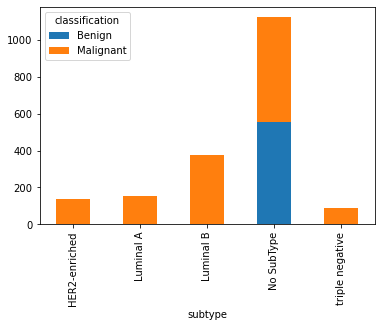

In [ ]:
#df_clinical.groupby('subtype')['abnormality'].nunique().plot(kind='bar')
#plt.show()

df_clinical.groupby(['subtype','classification']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


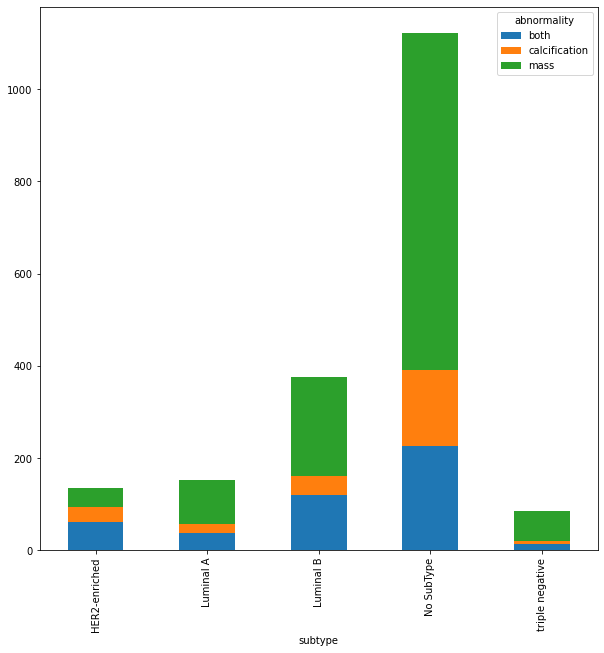

In [ ]:

df_clinical.groupby(['subtype','abnormality']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,10))
plt.show()


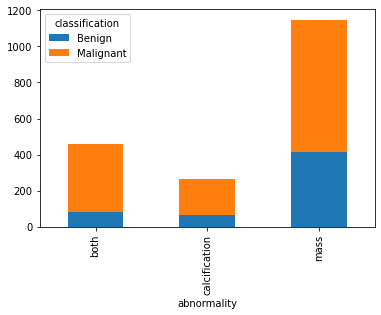

In [ ]:
df_clinical.groupby(['abnormality','classification']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
df_clinical.groupby(['abnormality','classification']).size()





abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign             64
               Malignant         198
mass           Benign            412
               Malignant         737
dtype: int64

<H3> Data Assessment

- takes about 1000 images for accuracy in neural network model
- to top up with CBIS images

- going for multi-label model; i.e. calcification, mass or both
- decision support system that aids radiologist

- benign cases has certain characteristics like shape and size, and no immediate impact to patient except follow up in 6mths time likely
- malignant cases will be the focus point, which helps to improve the survival rate with early detection; shape and size of mass/calcification is different from normal kind

- human accuracy rate is around 87%; hence false negative and false positive exists currently
- high density of breast can also obscure abnormal cells

- resource constraint includes; ibm cloud limitations (on free account) and practical (project) time to train model 
- lack of images which relates to both mass/classification but benign (only 80x2 = 160 images); this will lead to imbalance of model in detection
- using lowest common denominator of 381 (x2 =762) for number of malignant images in the 3 categories; malig-calc top up to 381; malig-mass downsample to 381; malig-both stays at 381


- may use transfer learning to improve the accuract and reduce training time 

- decision to go for multi-label classifier model; with potential for detection of both calcification and mass inside mammograms

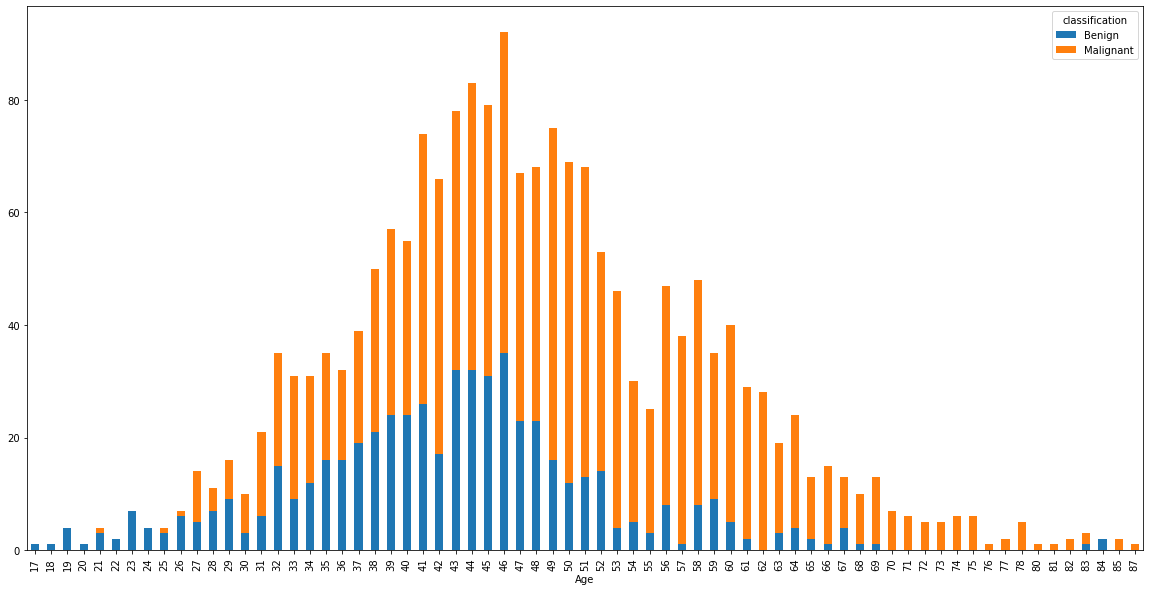

In [ ]:
df_clinical.groupby(['Age','classification']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff63006ad90>]],
      dtype=object)

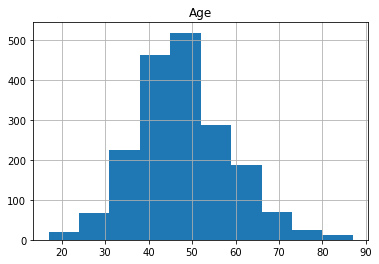

In [ ]:
df_clinical.hist()


In [ ]:
# only get the malignant cases from CMMD

df_CMMD_Malignant = df_clinical[df_clinical['classification'] == 'Malignant']

#df_clinical['classification'] == 'Malignant'


In [ ]:
#df_CMMD_Malignant.head()

df_CMMD_Malignant.drop(['LeftRight', 'Age', 'number','subtype'], axis=1, inplace=True)

df_CMMD_Malignant.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ID1    abnormality classification
48  D1-0045  calcification      Malignant
49  D1-0046  calcification      Malignant
50  D1-0047  calcification      Malignant
51  D1-0051  calcification      Malignant
52  D1-0053  calcification      Malignant

In [ ]:
df_CMMD_Malignant.head()

ID1    abnormality classification
48  D1-0045  calcification      Malignant
49  D1-0046  calcification      Malignant
50  D1-0047  calcification      Malignant
51  D1-0051  calcification      Malignant
52  D1-0053  calcification      Malignant

In [ ]:
# link up file path

df_file.isna().any()

Series UID              False
Collection              False
3rd Party Analysis      False
Data Description URI     True
Subject ID              False
Study UID               False
Study Description        True
Study Date              False
Series Description       True
Manufacturer             True
Modality                False
SOP Class Name          False
SOP Class UID           False
Number of Images        False
File Size               False
File Location           False
Download Timestamp      False
dtype: bool

In [ ]:
df_file.head()

Series UID Collection  \
0  1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...       CMMD   
1  1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...       CMMD   
2  1.3.6.1.4.1.14519.5.2.1.1239.1759.610823649257...       CMMD   
3  1.3.6.1.4.1.14519.5.2.1.1239.1759.328825651506...       CMMD   
4  1.3.6.1.4.1.14519.5.2.1.1239.1759.202447815325...       CMMD   

  3rd Party Analysis  Data Description URI Subject ID  \
0                 NO                   NaN    D1-0003   
1                 NO                   NaN    D1-0001   
2                 NO                   NaN    D1-0002   
3                 NO                   NaN    D1-0004   
4                 NO                   NaN    D1-0006   

                                           Study UID  Study Description  \
0  1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...                NaN   
1  1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...                NaN   
2  1.3.6.1.4.1.14519.5.2.1.1239.1759.241519791051...                NaN   
3  1.3.6.1.4.1.14519.5.2.1.1239.1759.132173027545...                NaN   
4  1.3.6.1.4.1.14519.5.2.1.1239.1759.241563313733...                NaN   

   Study Date  Series Description  Manufacturer Modality  \
0  07-18-2011                 NaN           NaN       MG   
1  07-18-2010                 NaN           NaN       MG   
2  07-18-2010                 NaN           NaN       MG   
3  07-18-2011                 NaN           NaN       MG   
4  07-18-2010                 NaN           NaN       MG   

                                      SOP Class Name  \
0  Digital Mammography X-Ray Image Storage - For ...   
1  Digital Mammography X-Ray Image Storage - For ...   
2  Digital Mammography X-Ray Image Storage - For ...   
3  Digital Mammography X-Ray Image Storage - For ...   
4  Digital Mammography X-Ray Image Storage - For ...   

                 SOP Class UID  Number of Images File Size  \
0  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
1  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
2  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
3  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   
4  1.2.840.10008.5.1.4.1.1.1.2                 2   8.38 MB   

                                    File Location       Download Timestamp  
0  .\CMMD\D1-0003\07-18-2011-25491\1.000000-24283  2021-05-25T13:25:02.646  
1  .\CMMD\D1-0001\07-18-2010-79377\1.000000-70244  2021-05-25T13:25:04.118  
2  .\CMMD\D1-0002\07-18-2010-49231\1.000000-45313   2021-05-25T13:25:04.52  
3  .\CMMD\D1-0004\07-18-2011-14914\1.000000-36301  2021-05-25T13:25:07.566  
4  .\CMMD\D1-0006\07-18-2010-16802\1.000000-64676   2021-05-25T13:25:09.34

In [ ]:


df_CMMD_FilePath = df_file[['Subject ID', 'File Location']]
df_CMMD_FilePath.head()

                                                   

Subject ID                                   File Location
0    D1-0003  .\CMMD\D1-0003\07-18-2011-25491\1.000000-24283
1    D1-0001  .\CMMD\D1-0001\07-18-2010-79377\1.000000-70244
2    D1-0002  .\CMMD\D1-0002\07-18-2010-49231\1.000000-45313
3    D1-0004  .\CMMD\D1-0004\07-18-2011-14914\1.000000-36301
4    D1-0006  .\CMMD\D1-0006\07-18-2010-16802\1.000000-64676

In [ ]:
df_CMMD_FilePath['File Location'] = df_CMMD_FilePath['File Location'].str.slice(7,)
                                                      
                                                                                  
df_CMMD_FilePath.head()   

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Subject ID                            File Location
0    D1-0003  D1-0003\07-18-2011-25491\1.000000-24283
1    D1-0001  D1-0001\07-18-2010-79377\1.000000-70244
2    D1-0002  D1-0002\07-18-2010-49231\1.000000-45313
3    D1-0004  D1-0004\07-18-2011-14914\1.000000-36301
4    D1-0006  D1-0006\07-18-2010-16802\1.000000-64676

In [ ]:
# change file location from back slash to front slash
df_CMMD_FilePath['File Location'] = df_CMMD_FilePath['File Location'].str.replace('\\','/')
                                                      
                                                                                  
df_CMMD_FilePath.head()   

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Subject ID                            File Location
0    D1-0003  D1-0003/07-18-2011-25491/1.000000-24283
1    D1-0001  D1-0001/07-18-2010-79377/1.000000-70244
2    D1-0002  D1-0002/07-18-2010-49231/1.000000-45313
3    D1-0004  D1-0004/07-18-2011-14914/1.000000-36301
4    D1-0006  D1-0006/07-18-2010-16802/1.000000-64676

In [ ]:
# link the two dataframe

df_CMMD_Malignant_Images = pd.merge(left=df_CMMD_Malignant, right=df_CMMD_FilePath, left_on='ID1', right_on='Subject ID')

df_CMMD_Malignant_Images.head()


ID1    abnormality classification Subject ID  \
0  D1-0045  calcification      Malignant    D1-0045   
1  D1-0046  calcification      Malignant    D1-0046   
2  D1-0047  calcification      Malignant    D1-0047   
3  D1-0051  calcification      Malignant    D1-0051   
4  D1-0053  calcification      Malignant    D1-0053   

                             File Location  
0  D1-0045/07-18-2010-92358/1.000000-76622  
1  D1-0046/07-18-2010-10359/1.000000-89305  
2  D1-0047/07-17-2008-93028/1.000000-59605  
3  D1-0051/07-18-2010-81300/1.000000-84975  
4  D1-0053/07-18-2010-94559/1.000000-60987

In [ ]:
df_CMMD_Malignant_Images.isna().any()

ID1               False
abnormality       False
classification    False
Subject ID        False
File Location     False
dtype: bool

In [ ]:
df_CMMD_Malignant_Images.nunique()

ID1               1310
abnormality          3
classification       1
Subject ID        1310
File Location     1310
dtype: int64

In [ ]:
df_CMMD_Malignant_Images['abnormality'].unique()

df_CMMD_Malignant_Images.groupby(['abnormality']).size()

abnormality
both             381
calcification    198
mass             737
dtype: int64

<H3> Balance the number of images for training - all to 381 x2 = 762 images (70% of 1000 required for modelling) 

In [ ]:
# downsize mass type to 381
df_CMMD_Malignant_Images[df_CMMD_Malignant_Images['abnormality'] == 'mass'].head(381)



ID1 abnormality classification Subject ID  \
246  D1-1042        mass      Malignant    D1-1042   
247  D1-1045        mass      Malignant    D1-1045   
248  D1-1047        mass      Malignant    D1-1047   
249  D1-1050        mass      Malignant    D1-1050   
250  D1-1053        mass      Malignant    D1-1053   
..       ...         ...            ...        ...   
955  D2-0391        mass      Malignant    D2-0391   
956  D2-0392        mass      Malignant    D2-0392   
957  D2-0393        mass      Malignant    D2-0393   
958  D2-0394        mass      Malignant    D2-0394   
959  D2-0395        mass      Malignant    D2-0395   

                               File Location  
246  D1-1042/07-18-2011-47524/1.000000-03751  
247  D1-1045/07-18-2010-35484/1.000000-54774  
248  D1-1047/07-18-2010-80491/1.000000-54179  
249  D1-1050/07-18-2011-09785/1.000000-63350  
250  D1-1053/07-18-2011-55334/1.000000-55300  
..                                       ...  
955  D2-0391/07-18-2010-78762/1.000000-94724  
956  D2-0392/07-18-2010-91072/1.000000-14709  
957  D2-0393/07-18-2010-56813/1.000000-03777  
958  D2-0394/07-18-2010-44636/1.000000-59309  
959  D2-0395/07-18-2010-27452/1.000000-18787  

[381 rows x 5 columns]

In [ ]:

#insert file path from CBIS Calc-Malig
df_CMMD_Malignant_Images[df_CMMD_Malignant_Images['abnormality'] == 'calcification']
                         
                         

        

ID1    abnormality classification Subject ID  \
0    D1-0045  calcification      Malignant    D1-0045   
1    D1-0046  calcification      Malignant    D1-0046   
2    D1-0047  calcification      Malignant    D1-0047   
3    D1-0051  calcification      Malignant    D1-0051   
4    D1-0053  calcification      Malignant    D1-0053   
..       ...            ...            ...        ...   
656  D2-0094  calcification      Malignant    D2-0094   
657  D2-0095  calcification      Malignant    D2-0095   
658  D2-0096  calcification      Malignant    D2-0096   
659  D2-0097  calcification      Malignant    D2-0097   
660  D2-0098  calcification      Malignant    D2-0098   

                               File Location  
0    D1-0045/07-18-2010-92358/1.000000-76622  
1    D1-0046/07-18-2010-10359/1.000000-89305  
2    D1-0047/07-17-2008-93028/1.000000-59605  
3    D1-0051/07-18-2010-81300/1.000000-84975  
4    D1-0053/07-18-2010-94559/1.000000-60987  
..                                       ...  
656  D2-0094/07-17-2012-52565/1.000000-43554  
657  D2-0095/07-17-2012-61997/1.000000-66024  
658  D2-0096/07-17-2012-79734/1.000000-84050  
659  D2-0097/07-17-2012-81453/1.000000-00864  
660  D2-0098/07-17-2012-41401/1.000000-75737  

[198 rows x 5 columns]

In [ ]:
df_CMMD_Malignant_Images.drop(['Subject ID'], axis=1, inplace=True)


<H3> Get images and details from CBIS

In [ ]:
#images from CBIS


body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='calc_case_cbis_train_set.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_calc_cbis = pd.read_csv(body)
df_calc_cbis.head()


patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
df_calc_cbis.isna().any()


patient_id                 False
breast density             False
left or right breast       False
image view                 False
abnormality id             False
abnormality type           False
calc type                   True
calc distribution           True
assessment                 False
pathology                  False
subtlety                   False
image file path            False
cropped image file path    False
ROI mask file path         False
dtype: bool

In [ ]:
df_calc_cbis.nunique()

patient_id                  602
breast density                4
left or right breast          2
image view                    2
abnormality id                7
abnormality type              1
calc type                    45
calc distribution             9
assessment                    5
pathology                     3
subtlety                      5
image file path            1227
cropped image file path    1546
ROI mask file path         1546
dtype: int64

In [ ]:
#only 1 image per view required, not multiple filters
df_calc_cbis = df_calc_cbis[df_calc_cbis['abnormality id'] == 1]


In [ ]:
# # calc type is recognizable

# df_calc_cbis = df_calc_cbis[df_calc_cbis['calc type'].notna()]

# # calc distribution is recognizable

# df_calc_cbis = df_calc_cbis[df_calc_cbis['calc distribution'].notna()]

## na results is benign

In [ ]:
df_calc_cbis.isna().any()


patient_id                 False
breast density             False
left or right breast       False
image view                 False
abnormality id             False
abnormality type           False
calc type                   True
calc distribution           True
assessment                 False
pathology                  False
subtlety                   False
image file path            False
cropped image file path    False
ROI mask file path         False
dtype: bool

In [ ]:
print(df_calc_cbis.pathology.unique())
print(df_calc_cbis['calc type'].unique())
print(df_calc_cbis['calc distribution'].unique())

print(df_calc_cbis['abnormality id'].unique())

['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']
['AMORPHOUS' 'PLEOMORPHIC' nan
 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC' 'PUNCTATE' 'COARSE'
 'VASCULAR' 'FINE_LINEAR_BRANCHING' 'LARGE_RODLIKE'
 'PUNCTATE-LUCENT_CENTER'
 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULAR-PUNCTATE'
 'ROUND_AND_REGULAR-EGGSHELL' 'PUNCTATE-PLEOMORPHIC'
 'PLEOMORPHIC-FINE_LINEAR_BRANCHING' 'DYSTROPHIC' 'LUCENT_CENTER'
 'AMORPHOUS-PLEOMORPHIC' 'ROUND_AND_REGULAR'
 'VASCULAR-COARSE-LUCENT_CENTERED' 'COARSE-ROUND_AND_REGULAR'
 'COARSE-PLEOMORPHIC' 'LUCENT_CENTERED' 'VASCULAR-COARSE'
 'ROUND_AND_REGULAR-PUNCTATE' 'ROUND_AND_REGULAR-LUCENT_CENTER'
 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED' 'SKIN'
 'LUCENT_CENTER-PUNCTATE' 'SKIN-PUNCTATE' 'MILK_OF_CALCIUM'
 'PLEOMORPHIC-PLEOMORPHIC' 'SKIN-COARSE-ROUND_AND_REGULAR'
 'ROUND_AND_REGULAR-PLEOMORPHIC' 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS'
 'ROUND_AND_REGULAR-AMORPHOUS' 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER'
 'LARGE_RODLIKE-ROUND_AND_REGULAR'
 'ROUND_AND_REGULAR

In [ ]:
# replace benigh_without_callback as benign

df_calc_cbis['pathology'] = df_calc_cbis['pathology'].replace(['BENIGN_WITHOUT_CALLBACK'],'BENIGN')


In [ ]:
print(df_calc_cbis.groupby('pathology').count())
#print(df_calc_cbis.groupby('classification').count())
#print(df_calc_cbis.groupby('subtype').count())

# calcification images are 2 per patient side, so number of patients = 248 each for benign and 238 malignant cases


           patient_id  breast density  left or right breast  image view  \
pathology                                                                 
BENIGN            695             695                   695         695   
MALIGNANT         477             477                   477         477   

           abnormality id  abnormality type  calc type  calc distribution  \
pathology                                                                   
BENIGN                695               695        688                504   
MALIGNANT             477               477        476                477   

           assessment  subtlety  image file path  cropped image file path  \
pathology                                                                   
BENIGN            695       695              695                      695   
MALIGNANT         477       477              477                      477   

           ROI mask file path  
pathology                      
BENIGN           

In [ ]:
df_calc_cbis.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  pathology  \
0    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
1    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
2    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
3    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
4    calcification          NaN          REGIONAL           2     BENIGN   

   subtlety                                    image file path  \
0         3  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1         3  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2         4  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3         4  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4         3  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
df_calc_cbis.describe()


breast density  abnormality id  assessment    subtlety
count      973.000000           973.0  973.000000  973.000000
mean         2.832477             1.0    3.728674    3.108941
std          0.921672             0.0    1.154865    1.218197
min          1.000000             1.0    0.000000    1.000000
25%          2.000000             1.0    4.000000    2.000000
50%          3.000000             1.0    4.000000    3.000000
75%          4.000000             1.0    4.000000    4.000000
max          4.000000             1.0    5.000000    5.000000

In [ ]:

body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='cbis_calc_metadata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_calc_cbis_filepath = pd.read_csv(body)
df_calc_cbis_filepath.head()


Series UID Collection  \
0  1.3.6.1.4.1.9590.100.1.2.250596608311207922527...  CBIS-DDSM   
1  1.3.6.1.4.1.9590.100.1.2.474143160103683865197...  CBIS-DDSM   
2  1.3.6.1.4.1.9590.100.1.2.228699627313487111012...  CBIS-DDSM   
3  1.3.6.1.4.1.9590.100.1.2.104743410411133110629...  CBIS-DDSM   
4  1.3.6.1.4.1.9590.100.1.2.406725628213826290127...  CBIS-DDSM   

   3rd Party Analysis                           Data Description URI  \
0                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
1                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
2                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
3                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   
4                 NaN  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY   

                        Subject ID  \
0  Calc-Training_P_00005_RIGHT_MLO   
1   Calc-Training_P_00005_RIGHT_CC   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC   

                                           Study UID  Study Description  \
0  1.3.6.1.4.1.9590.100.1.2.427517897311902339923...                NaN   
1  1.3.6.1.4.1.9590.100.1.2.408909860712120272633...                NaN   
2  1.3.6.1.4.1.9590.100.1.2.201322325113694962619...                NaN   
3  1.3.6.1.4.1.9590.100.1.2.370479499712916693322...                NaN   
4  1.3.6.1.4.1.9590.100.1.2.162256682111885666305...                NaN   

   Study Date     Series Description  Manufacturer Modality  \
0  08-07-2016  full mammogram images           NaN       MG   
1  08-07-2016  full mammogram images           NaN       MG   
2  08-07-2016  full mammogram images           NaN       MG   
3  08-07-2016  full mammogram images           NaN       MG   
4  08-07-2016  full mammogram images           NaN       MG   

                    SOP Class Name              SOP Class UID  \
0  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
1  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
2  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
3  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   
4  Secondary Capture Image Storage  1.2.840.10008.5.1.4.1.1.7   

   Number of Images File Size  \
0                 1  29.14 MB   
1                 1  26.63 MB   
2                 1  30.51 MB   
3                 1  33.16 MB   
4                 1  26.70 MB   

                                       File Location       Download Timestamp  
0  .\CBIS-DDSM\Calc-Training_P_00005_RIGHT_MLO\08...  2021-05-27T17:21:50.259  
1  .\CBIS-DDSM\Calc-Training_P_00005_RIGHT_CC\08-...  2021-05-27T17:21:53.753  
2  .\CBIS-DDSM\Calc-Training_P_00007_LEFT_CC\08-0...  2021-05-27T17:21:54.625  
3  .\CBIS-DDSM\Calc-Training_P_00007_LEFT_MLO\08-...  2021-05-27T17:22:03.638  
4  .\CBIS-DDSM\Calc-Training_P_00008_LEFT_CC\08-0...   2021-05-27T17:22:10.99

In [ ]:
df_calc_cbis_filepath = df_calc_cbis_filepath[['Subject ID', 'File Location']]

df_calc_cbis_filepath.head()

Subject ID  \
0  Calc-Training_P_00005_RIGHT_MLO   
1   Calc-Training_P_00005_RIGHT_CC   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC   

                                       File Location  
0  .\CBIS-DDSM\Calc-Training_P_00005_RIGHT_MLO\08...  
1  .\CBIS-DDSM\Calc-Training_P_00005_RIGHT_CC\08-...  
2  .\CBIS-DDSM\Calc-Training_P_00007_LEFT_CC\08-0...  
3  .\CBIS-DDSM\Calc-Training_P_00007_LEFT_MLO\08-...  
4  .\CBIS-DDSM\Calc-Training_P_00008_LEFT_CC\08-0...

In [ ]:
# change file location from back slash to front slash
df_calc_cbis_filepath['File Location'] = df_calc_cbis_filepath['File Location'].str.replace('\\','/')
                                                      
                                                                                  
df_calc_cbis_filepath.head()  

Subject ID  \
0  Calc-Training_P_00005_RIGHT_MLO   
1   Calc-Training_P_00005_RIGHT_CC   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC   

                                       File Location  
0  ./CBIS-DDSM/Calc-Training_P_00005_RIGHT_MLO/08...  
1  ./CBIS-DDSM/Calc-Training_P_00005_RIGHT_CC/08-...  
2  ./CBIS-DDSM/Calc-Training_P_00007_LEFT_CC/08-0...  
3  ./CBIS-DDSM/Calc-Training_P_00007_LEFT_MLO/08-...  
4  ./CBIS-DDSM/Calc-Training_P_00008_LEFT_CC/08-0...

In [ ]:
df_calc_cbis_filepath['File Location'] = df_calc_cbis_filepath['File Location'].str.slice(12,)
                                                      
                                                                                  
df_calc_cbis_filepath.head()   

Subject ID  \
0  Calc-Training_P_00005_RIGHT_MLO   
1   Calc-Training_P_00005_RIGHT_CC   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC   

                                       File Location  
0  Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
1  Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
2  Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-...  
3  Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM...  
4  Calc-Training_P_00008_LEFT_CC/08-07-2016-DDSM-...

In [ ]:

df_calc_cbis['Subject ID'] = 'Calc-Training_' + df_calc_cbis['patient_id'] + '_' + df_calc_cbis['left or right breast'] + '_' + df_calc_cbis['image view']



df_calc_cbis.shape

(1172, 15)

In [ ]:
df_calc_cbis.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  pathology  \
0    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
1    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
2    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
3    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
4    calcification          NaN          REGIONAL           2     BENIGN   

   subtlety                                    image file path  \
0         3  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1         3  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2         4  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3         4  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4         3  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                        Subject ID  
0   Calc-Training_P_00005_RIGHT_CC  
1  Calc-Training_P_00005_RIGHT_MLO  
2    Calc-Training_P_00007_LEFT_CC  
3   Calc-Training_P_00007_LEFT_MLO  
4    Calc-Training_P_00008_LEFT_CC

In [ ]:
# link the two dataframe

df_CBIS_Malignant_Images = pd.merge(left=df_calc_cbis, right=df_calc_cbis_filepath, left_on='Subject ID', right_on='Subject ID')

df_CBIS_Malignant_Images.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00010               3                 LEFT         CC               1   

  abnormality type                                   calc type  \
0    calcification                                   AMORPHOUS   
1    calcification                                   AMORPHOUS   
2    calcification                                 PLEOMORPHIC   
3    calcification                                 PLEOMORPHIC   
4    calcification  ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC   

     calc distribution  assessment                pathology  subtlety  \
0            CLUSTERED           3                MALIGNANT         3   
1            CLUSTERED           3                MALIGNANT         3   
2               LINEAR           4                   BENIGN         4   
3               LINEAR           4                   BENIGN         4   
4  DIFFUSELY_SCATTERED           2  BENIGN_WITHOUT_CALLBACK         4   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00010_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00010_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00010_LEFT_CC_1/1.3.6.1.4.1.95...   

                        Subject ID  \
0   Calc-Training_P_00005_RIGHT_CC   
1  Calc-Training_P_00005_RIGHT_MLO   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00010_LEFT_CC   

                                       File Location  
0  Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1  Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
2  Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-...  
3  Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM...  
4  Calc-Training_P_00010_LEFT_CC/08-07-2016-DDSM-...

In [ ]:
df_CBIS_Malignant_Images.shape

(973, 16)

In [ ]:
#top up calc malignant cases with CBIS images (1 image per row)
#381 - 198 = 183 , x2 = 366

df_CBIS_Calc_Maglinant = df_CBIS_Malignant_Images[df_CBIS_Malignant_Images['pathology'] == 'MALIGNANT'].head(366)


df_CBIS_Calc_Maglinant.head()


patient_id  breast density left or right breast image view  abnormality id  \
0     P_00005               3                RIGHT         CC               1   
1     P_00005               3                RIGHT        MLO               1   
8     P_00012               2                 LEFT         CC               1   
9     P_00012               2                 LEFT        MLO               1   
11    P_00014               4                 LEFT         CC               1   

   abnormality type    calc type calc distribution  assessment  pathology  \
0     calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
1     calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
8     calcification  PLEOMORPHIC         CLUSTERED           4  MALIGNANT   
9     calcification  PLEOMORPHIC         CLUSTERED           4  MALIGNANT   
11    calcification  PLEOMORPHIC         CLUSTERED           4  MALIGNANT   

    subtlety                                    image file path  \
0          3  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1          3  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
8          4  Calc-Training_P_00012_LEFT_CC/1.3.6.1.4.1.9590...   
9          3  Calc-Training_P_00012_LEFT_MLO/1.3.6.1.4.1.959...   
11         4  Calc-Training_P_00014_LEFT_CC/1.3.6.1.4.1.9590...   

                              cropped image file path  \
0   Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1   Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
8   Calc-Training_P_00012_LEFT_CC_1/1.3.6.1.4.1.95...   
9   Calc-Training_P_00012_LEFT_MLO_1/1.3.6.1.4.1.9...   
11  Calc-Training_P_00014_LEFT_CC_1/1.3.6.1.4.1.95...   

                                   ROI mask file path  \
0   Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1   Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
8   Calc-Training_P_00012_LEFT_CC_1/1.3.6.1.4.1.95...   
9   Calc-Training_P_00012_LEFT_MLO_1/1.3.6.1.4.1.9...   
11  Calc-Training_P_00014_LEFT_CC_1/1.3.6.1.4.1.95...   

                         Subject ID  \
0    Calc-Training_P_00005_RIGHT_CC   
1   Calc-Training_P_00005_RIGHT_MLO   
8     Calc-Training_P_00012_LEFT_CC   
9    Calc-Training_P_00012_LEFT_MLO   
11    Calc-Training_P_00014_LEFT_CC   

                                        File Location  
0   Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1   Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
8   Calc-Training_P_00012_LEFT_CC/08-07-2016-DDSM-...  
9   Calc-Training_P_00012_LEFT_MLO/08-07-2016-DDSM...  
11  Calc-Training_P_00014_LEFT_CC/08-07-2016-DDSM-...

In [ ]:
df_CBIS_Calc_Maglinant = df_CBIS_Calc_Maglinant[['patient_id', 'abnormality type', 'pathology', 'File Location']]

df_CBIS_Calc_Maglinant.describe()

patient_id abnormality type  pathology  \
count         366              366        366   
unique        203                1          1   
top       P_00937    calcification  MALIGNANT   
freq            4              366        366   

                                            File Location  
count                                                 366  
unique                                                366  
top     Calc-Training_P_00049_RIGHT_CC/08-07-2016-DDSM...  
freq                                                    1

In [ ]:
df_CBIS_Calc_Maglinant.rename(columns={'patient_id': 'ID1', 'abnormality type': 'abnormality', 'pathology': 'classification'}, inplace=True)

df_CBIS_Calc_Maglinant.head(20)

ID1    abnormality classification  \
0   P_00005  calcification      MALIGNANT   
1   P_00005  calcification      MALIGNANT   
8   P_00012  calcification      MALIGNANT   
9   P_00012  calcification      MALIGNANT   
11  P_00014  calcification      MALIGNANT   
12  P_00014  calcification      MALIGNANT   
15  P_00020  calcification      MALIGNANT   
16  P_00020  calcification      MALIGNANT   
22  P_00029  calcification      MALIGNANT   
23  P_00029  calcification      MALIGNANT   
24  P_00031  calcification      MALIGNANT   
25  P_00043  calcification      MALIGNANT   
26  P_00047  calcification      MALIGNANT   
27  P_00047  calcification      MALIGNANT   
30  P_00049  calcification      MALIGNANT   
31  P_00049  calcification      MALIGNANT   
36  P_00063  calcification      MALIGNANT   
37  P_00063  calcification      MALIGNANT   
40  P_00078  calcification      MALIGNANT   
41  P_00078  calcification      MALIGNANT   

                                        File Location  
0   Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1   Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
8   Calc-Training_P_00012_LEFT_CC/08-07-2016-DDSM-...  
9   Calc-Training_P_00012_LEFT_MLO/08-07-2016-DDSM...  
11  Calc-Training_P_00014_LEFT_CC/08-07-2016-DDSM-...  
12  Calc-Training_P_00014_LEFT_MLO/08-07-2016-DDSM...  
15  Calc-Training_P_00020_LEFT_CC/08-07-2016-DDSM-...  
16  Calc-Training_P_00020_LEFT_MLO/08-07-2016-DDSM...  
22  Calc-Training_P_00029_LEFT_CC/08-07-2016-DDSM-...  
23  Calc-Training_P_00029_LEFT_MLO/08-07-2016-DDSM...  
24  Calc-Training_P_00031_LEFT_CC/08-07-2016-DDSM-...  
25  Calc-Training_P_00043_LEFT_MLO/08-07-2016-DDSM...  
26  Calc-Training_P_00047_LEFT_CC/08-07-2016-DDSM-...  
27  Calc-Training_P_00047_LEFT_MLO/08-07-2016-DDSM...  
30  Calc-Training_P_00049_RIGHT_CC/08-07-2016-DDSM...  
31  Calc-Training_P_00049_RIGHT_MLO/08-07-2016-DDS...  
36  Calc-Training_P_00063_RIGHT_CC/08-07-2016-DDSM...  
37  Calc-Training_P_00063_RIGHT_MLO/08-07-2016-DDS...  
40  Calc-Training_P_00078_LEFT_CC/08-07-2016-DDSM-...  
41  Calc-Training_P_00078_LEFT_MLO/08-07-2016-DDSM...

<H3> combine the 2 dataframe from CMMD and CBIS

In [ ]:
#combine the 2 dataframe from CMMD and CBIS

df_CMMD_Malignant_Images.head()


ID1    abnormality classification  \
0  D1-0045  calcification      Malignant   
1  D1-0046  calcification      Malignant   
2  D1-0047  calcification      Malignant   
3  D1-0051  calcification      Malignant   
4  D1-0053  calcification      Malignant   

                             File Location  
0  D1-0045/07-18-2010-92358/1.000000-76622  
1  D1-0046/07-18-2010-10359/1.000000-89305  
2  D1-0047/07-17-2008-93028/1.000000-59605  
3  D1-0051/07-18-2010-81300/1.000000-84975  
4  D1-0053/07-18-2010-94559/1.000000-60987

In [ ]:

df_CMMD_CBIS_Malignant_Images = pd.concat([df_CMMD_Malignant_Images, df_CBIS_Calc_Maglinant], ignore_index=True, sort=False)

df_CMMD_CBIS_Malignant_Images.head(20)

ID1    abnormality classification  \
0   D1-0045  calcification      Malignant   
1   D1-0046  calcification      Malignant   
2   D1-0047  calcification      Malignant   
3   D1-0051  calcification      Malignant   
4   D1-0053  calcification      Malignant   
5   D1-0055  calcification      Malignant   
6   D1-0056  calcification      Malignant   
7   D1-0058  calcification      Malignant   
8   D1-0059  calcification      Malignant   
9   D1-0061  calcification      Malignant   
10  D1-0063  calcification      Malignant   
11  D1-0064  calcification      Malignant   
12  D1-0067  calcification      Malignant   
13  D1-0068  calcification      Malignant   
14  D1-0070  calcification      Malignant   
15  D1-0071  calcification      Malignant   
16  D1-0075  calcification      Malignant   
17  D1-0078  calcification      Malignant   
18  D1-0084  calcification      Malignant   
19  D1-0085  calcification      Malignant   

                              File Location  
0   D1-0045/07-18-2010-92358/1.000000-76622  
1   D1-0046/07-18-2010-10359/1.000000-89305  
2   D1-0047/07-17-2008-93028/1.000000-59605  
3   D1-0051/07-18-2010-81300/1.000000-84975  
4   D1-0053/07-18-2010-94559/1.000000-60987  
5   D1-0055/07-18-2010-00397/1.000000-47548  
6   D1-0056/07-18-2010-20192/1.000000-52218  
7   D1-0058/07-18-2010-19450/1.000000-94022  
8   D1-0059/07-18-2010-49984/1.000000-67757  
9   D1-0061/07-18-2010-26681/1.000000-23271  
10  D1-0063/07-18-2010-84963/1.000000-63966  
11  D1-0064/07-18-2010-13229/1.000000-79376  
12  D1-0067/07-18-2010-76409/1.000000-60482  
13  D1-0068/07-18-2010-48390/1.000000-23067  
14  D1-0070/07-18-2010-35832/1.000000-28875  
15  D1-0071/07-18-2010-61588/1.000000-42026  
16  D1-0075/07-18-2010-34833/1.000000-86902  
17  D1-0078/07-18-2010-70407/1.000000-14192  
18  D1-0084/07-18-2010-91925/1.000000-48343  
19  D1-0085/07-18-2010-36192/1.000000-35080

In [ ]:
df_CMMD_CBIS_Malignant_Images.groupby('abnormality').size()


abnormality
both             381
calcification    564
mass             737
dtype: int64

In [ ]:
df_CMMD_CBIS_Malignant_Images.sort_values(by=['abnormality'], inplace=True)

df_CMMD_CBIS_Malignant_Images.tail()

ID1 abnormality classification  \
1130  D2-0565        mass      Malignant   
1131  D2-0566        mass      Malignant   
1132  D2-0567        mass      Malignant   
1264  D2-0699        mass      Malignant   
1214  D2-0649        mass      Malignant   

                                File Location  
1130  D2-0565/07-18-2011-72392/1.000000-93001  
1131  D2-0566/07-18-2011-45353/1.000000-62592  
1132  D2-0567/07-18-2011-88610/1.000000-28440  
1264  D2-0699/07-18-2011-54815/1.000000-34143  
1214  D2-0649/07-18-2011-39599/1.000000-19743

In [ ]:
# mass type 737 - 381 = 356 
n = 356

# drop last n rows
df_CMMD_CBIS_Malignant_Images = df_CMMD_CBIS_Malignant_Images.head(-n)




In [ ]:
df_CMMD_CBIS_Malignant_Images.groupby('abnormality').size()


abnormality
both             381
calcification    564
mass             381
dtype: int64

<H3> save dataframe for multi session processing in ibm watson

In [ ]:
# save dataframe for multi session processing

from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)




In [ ]:
create_download_link(df_CMMD_CBIS_Malignant_Images, "Download Malignant Images CSV", "malignant_images.csv")

In [ ]:
#load preprocessed malignant images from csv


body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='malignant_images.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_malignant_images = pd.read_csv(body)
df_malignant_images.head()


Unnamed: 0      ID1 abnormality classification  \
0         840  D2-0277        both      Malignant   
1         814  D2-0251        both      Malignant   
2         815  D2-0252        both      Malignant   
3         816  D2-0253        both      Malignant   
4         817  D2-0254        both      Malignant   

                             File Location  
0  D2-0277/07-18-2011-57583/1.000000-09100  
1  D2-0251/07-18-2011-49870/1.000000-38927  
2  D2-0252/07-18-2011-21941/1.000000-99533  
3  D2-0253/07-18-2011-94253/1.000000-13350  
4  D2-0254/07-18-2011-14376/1.000000-22755

In [ ]:
df_malignant_images.groupby('abnormality').size()

abnormality
both             381
calcification    564
mass             381
dtype: int64

In [ ]:
df_malignant_images.shape

(1326, 5)

In [ ]:
# replace abnormality 'both' type to ;calcification, mass'

df_malignant_images.replace(to_replace ="both", value ="calcification, mass", inplace=True)
df_malignant_images.head()

Unnamed: 0      ID1          abnormality classification  \
0         840  D2-0277  calcification, mass      Malignant   
1         814  D2-0251  calcification, mass      Malignant   
2         815  D2-0252  calcification, mass      Malignant   
3         816  D2-0253  calcification, mass      Malignant   
4         817  D2-0254  calcification, mass      Malignant   

                             File Location  
0  D2-0277/07-18-2011-57583/1.000000-09100  
1  D2-0251/07-18-2011-49870/1.000000-38927  
2  D2-0252/07-18-2011-21941/1.000000-99533  
3  D2-0253/07-18-2011-94253/1.000000-13350  
4  D2-0254/07-18-2011-14376/1.000000-22755

In [ ]:
#do simple way first, to encode; no need to split dataframe

df_malignant_images['Calc'] = df_malignant_images['abnormality'].str.contains('calcification')
df_malignant_images['Mass'] = df_malignant_images['abnormality'].str.contains('mass')


In [ ]:
df_malignant_images.shape

(1326, 7)

In [ ]:
create_download_link(df_malignant_images, "Download Malignant Images CSV", "malignant_images_labelled.csv")

In [ ]:
# load preprocessed dataframe and continue


body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='malignant_images_labelled.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_malignant_images = pd.read_csv(body)
df_malignant_images.head()


Unnamed: 0  Unnamed: 0.1      ID1          abnormality classification  \
0           0           840  D2-0277  calcification, mass      Malignant   
1           1           814  D2-0251  calcification, mass      Malignant   
2           2           815  D2-0252  calcification, mass      Malignant   
3           3           816  D2-0253  calcification, mass      Malignant   
4           4           817  D2-0254  calcification, mass      Malignant   

                             File Location  Calc  Mass  
0  D2-0277/07-18-2011-57583/1.000000-09100  True  True  
1  D2-0251/07-18-2011-49870/1.000000-38927  True  True  
2  D2-0252/07-18-2011-21941/1.000000-99533  True  True  
3  D2-0253/07-18-2011-94253/1.000000-13350  True  True  
4  D2-0254/07-18-2011-14376/1.000000-22755  True  True

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer

# #multilabel_binarizer = MultiLabelBinarizer(classes=('calcification', 'mass', 'calcification, mass'))
# multilabel_binarizer = MultiLabelBinarizer(classes=("calcification", "mass"))
# #?
# #mlb = multilabel_binarizer.fit_transform(df_malignant_images_labels['abnormality'])
# mlb = multilabel_binarizer.fit_transform(arrTest)

# mlb

# # transform target variable
# #y = multilabel_binarizer.transform(df_malignant_images_labels['abnormality'])
# #print(y)


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
# from sklearn.preprocessing import OneHotEncoder


# y = OneHotEncoder().fit_transform(df_malignant_images_labels[['abnormality']]).toarray()
# print(y)


# #df_malignant_images_labels


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


<H3> Unzip the images file 

In [ ]:
!pwd

/home/wsuser/work


In [ ]:
!ls

In [ ]:
#!python -m zipfile -l D1-5.zip


#remove all files in working directory

#import os
#path = '/home/wsuser/work'
#os.system('rm -rf %s/*' % path)


0

In [ ]:

def extractImagesZip(readrawdata):
    binary_stream =  BytesIO(readrawdata)

    # opening the zip file in READ mode
    with ZipFile(binary_stream, 'r') as zip:
        # printing all the contents of the zip file
        zip.printdir()

        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall()
        print('Done!')
        
        

In [ ]:

def extractImages7Zip(readrawdata):
    binary_stream =  BytesIO(readrawdata)

    # opening the zip file in READ mode
    with py7zr.SevenZipFile(binary_stream, mode='r') as zip:
        # printing all the contents of the zip file
        print(zip.getnames())

        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall()
        print('Done!')

In [ ]:
!ls

In [ ]:



def loadImages(fileName):
    # Your data file was loaded into a botocore.response.StreamingBody object.
    # Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
    # ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
    # pandas documentation: http://pandas.pydata.org/
    streaming_body_1 = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer', Key=fileName)['Body']
    # add missing __iter__ method so pandas accepts body as file-like object
    if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

    readrawdata = streaming_body_1.read()
    print(fileName + " loaded")
    
    extractImages7Zip(readrawdata)
    print(fileName + " extracted")


In [ ]:
loadImages('CMMD-D1-0001-0999.7z')


CMMD-D1-0001-0999.7z loaded
['D1-0001', 'D1-0001/07-18-2010-79377', 'D1-0001/07-18-2010-79377/1.000000-70244', 'D1-0002', 'D1-0002/07-18-2010-49231', 'D1-0002/07-18-2010-49231/1.000000-45313', 'D1-0003', 'D1-0003/07-18-2011-25491', 'D1-0003/07-18-2011-25491/1.000000-24283', 'D1-0004', 'D1-0004/07-18-2011-14914', 'D1-0004/07-18-2011-14914/1.000000-36301', 'D1-0005', 'D1-0005/07-18-2011-52347', 'D1-0005/07-18-2011-52347/1.000000-77249', 'D1-0006', 'D1-0006/07-18-2010-16802', 'D1-0006/07-18-2010-16802/1.000000-64676', 'D1-0007', 'D1-0007/07-18-2010-58107', 'D1-0007/07-18-2010-58107/1.000000-32740', 'D1-0008', 'D1-0008/07-18-2010-03589', 'D1-0008/07-18-2010-03589/1.000000-11043', 'D1-0009', 'D1-0009/07-18-2010-81159', 'D1-0009/07-18-2010-81159/1.000000-74311', 'D1-0010', 'D1-0010/07-18-2010-56931', 'D1-0010/07-18-2010-56931/1.000000-92629', 'D1-0011', 'D1-0011/07-18-2010-93954', 'D1-0011/07-18-2010-93954/1.000000-73995', 'D1-0012', 'D1-0012/07-18-2010-88332', 'D1-0012/07-18-2010-88332/1.00

Done!
CMMD-D1-0001-0999.7z extracted


In [ ]:
!ls -1t | head -10

D2-0727
D2-0728
D2-0729
D2-0730
D2-0731
D2-0732
D2-0733
D2-0734
D2-0735
D2-0736
ls: write error: Broken pipe


In [ ]:
!ls

D1-0001  D1-0131  D1-0267  D1-0400  D1-0653  D1-0753  D1-0837  D1-0921
D1-0002  D1-0132  D1-0268  D1-0410  D1-0656  D1-0754  D1-0838  D1-0922
D1-0003  D1-0133  D1-0269  D1-0411  D1-0658  D1-0755  D1-0839  D1-0923
D1-0004  D1-0134  D1-0270  D1-0413  D1-0662  D1-0756  D1-0840  D1-0924
D1-0005  D1-0135  D1-0271  D1-0414  D1-0663  D1-0757  D1-0841  D1-0925
D1-0006  D1-0140  D1-0272  D1-0420  D1-0664  D1-0758  D1-0842  D1-0926
D1-0007  D1-0142  D1-0273  D1-0422  D1-0666  D1-0759  D1-0843  D1-0927
D1-0008  D1-0143  D1-0274  D1-0423  D1-0667  D1-0760  D1-0844  D1-0928
D1-0009  D1-0147  D1-0275  D1-0427  D1-0672  D1-0761  D1-0845  D1-0929
D1-0010  D1-0148  D1-0276  D1-0428  D1-0677  D1-0762  D1-0846  D1-0930
D1-0011  D1-0149  D1-0277  D1-0430  D1-0678  D1-0763  D1-0847  D1-0931
D1-0012  D1-0152  D1-0278  D1-0433  D1-0679  D1-0764  D1-0848  D1-0932
D1-0013  D1-0154  D1-0279  D1-0435  D1-0681  D1-0765  D1-0849  D1-0933
D1-0014  D1-0157  D1-0280  D1-0436  D1-0682  D1-0766  D1-0850  D1-0934
D1-001

In [ ]:
#import os

#print(os.listdir())

#print(os.getcwd())

#os.chdir('/home/wsuser/work/D1-0001/07-18-2010-79377/1.000000-70244')


['07-18-2010-79377']
/home/wsuser/work/D1-0001


In [ ]:
loadImages('CMMD-D1-1000-1775.7z')

CMMD-D1-1000-1775.7z loaded
['D1-1000', 'D1-1000/07-18-2011-05366', 'D1-1000/07-18-2011-05366/1.000000-97465', 'D1-1001', 'D1-1001/07-18-2011-23011', 'D1-1001/07-18-2011-23011/1.000000-67633', 'D1-1002', 'D1-1002/07-18-2011-04406', 'D1-1002/07-18-2011-04406/1.000000-45707', 'D1-1003', 'D1-1003/07-18-2011-85710', 'D1-1003/07-18-2011-85710/1.000000-22152', 'D1-1004', 'D1-1004/07-18-2011-30134', 'D1-1004/07-18-2011-30134/1.000000-55746', 'D1-1005', 'D1-1005/07-18-2011-84021', 'D1-1005/07-18-2011-84021/1.000000-68271', 'D1-1006', 'D1-1006/07-18-2011-17476', 'D1-1006/07-18-2011-17476/1.000000-98871', 'D1-1007', 'D1-1007/07-18-2011-66640', 'D1-1007/07-18-2011-66640/1.000000-36196', 'D1-1008', 'D1-1008/07-18-2011-64414', 'D1-1008/07-18-2011-64414/1.000000-93159', 'D1-1009', 'D1-1009/07-18-2011-77329', 'D1-1009/07-18-2011-77329/1.000000-46259', 'D1-1010', 'D1-1010/07-18-2011-68313', 'D1-1010/07-18-2011-68313/1.000000-72033', 'D1-1011', 'D1-1011/07-18-2011-63617', 'D1-1011/07-18-2011-63617/1.00

Done!
CMMD-D1-1000-1775.7z extracted


In [ ]:
loadImages('CMMD-D2-0001-0399.7z')

CMMD-D2-0001-0399.7z loaded
['D2-0001', 'D2-0001/07-18-2011-75485', 'D2-0001/07-18-2011-75485/1.000000-12786', 'D2-0002', 'D2-0002/07-18-2010-26354', 'D2-0002/07-18-2010-26354/1.000000-32501', 'D2-0003', 'D2-0003/07-18-2010-57046', 'D2-0003/07-18-2010-57046/1.000000-63551', 'D2-0004', 'D2-0004/07-18-2010-29234', 'D2-0004/07-18-2010-29234/1.000000-22206', 'D2-0005', 'D2-0005/07-18-2010-26051', 'D2-0005/07-18-2010-26051/1.000000-83453', 'D2-0006', 'D2-0006/07-18-2010-69394', 'D2-0006/07-18-2010-69394/1.000000-45236', 'D2-0007', 'D2-0007/07-18-2010-39940', 'D2-0007/07-18-2010-39940/1.000000-88925', 'D2-0008', 'D2-0008/07-18-2010-90196', 'D2-0008/07-18-2010-90196/1.000000-16513', 'D2-0009', 'D2-0009/07-18-2010-16987', 'D2-0009/07-18-2010-16987/1.000000-61904', 'D2-0010', 'D2-0010/07-18-2010-40354', 'D2-0010/07-18-2010-40354/1.000000-46626', 'D2-0011', 'D2-0011/07-18-2010-89714', 'D2-0011/07-18-2010-89714/1.000000-34952', 'D2-0012', 'D2-0012/07-18-2010-02689', 'D2-0012/07-18-2010-02689/1.00

Done!
CMMD-D2-0001-0399.7z extracted


In [ ]:
loadImages('CMMD-D2-0400-0749.7z')

CMMD-D2-0400-0749.7z loaded
['D2-0400', 'D2-0400/07-18-2010-08585', 'D2-0400/07-18-2010-08585/1.000000-79648', 'D2-0401', 'D2-0401/07-18-2010-55602', 'D2-0401/07-18-2010-55602/1.000000-72194', 'D2-0402', 'D2-0402/07-18-2010-63784', 'D2-0402/07-18-2010-63784/1.000000-56645', 'D2-0403', 'D2-0403/07-18-2010-34625', 'D2-0403/07-18-2010-34625/1.000000-13237', 'D2-0404', 'D2-0404/07-18-2010-46970', 'D2-0404/07-18-2010-46970/1.000000-19244', 'D2-0405', 'D2-0405/07-18-2010-86373', 'D2-0405/07-18-2010-86373/1.000000-99643', 'D2-0406', 'D2-0406/07-18-2010-80589', 'D2-0406/07-18-2010-80589/1.000000-76085', 'D2-0407', 'D2-0407/07-18-2011-17336', 'D2-0407/07-18-2011-17336/1.000000-10694', 'D2-0408', 'D2-0408/07-18-2010-53879', 'D2-0408/07-18-2010-53879/1.000000-63501', 'D2-0409', 'D2-0409/07-18-2010-71659', 'D2-0409/07-18-2010-71659/1.000000-59026', 'D2-0410', 'D2-0410/07-18-2010-09106', 'D2-0410/07-18-2010-09106/1.000000-38921', 'D2-0411', 'D2-0411/07-18-2010-57380', 'D2-0411/07-18-2010-57380/1.00

Done!
CMMD-D2-0400-0749.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-00183.7z')

CBIS-DDSM-All-00183.7z loaded
['Calc-Training_P_00005_RIGHT_CC', 'Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM-23157', 'Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM-23157/1.000000-full mammogram images-38548', 'Calc-Training_P_00005_RIGHT_MLO', 'Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDSM-33338', 'Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDSM-33338/1.000000-full mammogram images-96727', 'Calc-Training_P_00007_LEFT_CC', 'Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-72222', 'Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-72222/1.000000-full mammogram images-68297', 'Calc-Training_P_00007_LEFT_MLO', 'Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM-54887', 'Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM-54887/1.000000-full mammogram images-00446', 'Calc-Training_P_00008_LEFT_CC', 'Calc-Training_P_00008_LEFT_CC/08-07-2016-DDSM-64189', 'Calc-Training_P_00008_LEFT_CC/08-07-2016-DDSM-64189/1.000000-full mammogram images-20834', 'Calc-Training_P_00008_LEFT_MLO', 'Calc-Training_P_00008_

Done!
CBIS-DDSM-All-00183.7z extracted


In [ ]:
!ls

D1-0001  D1-0351  D1-0777  D1-0999  D1-1457  D2-0085  D2-0307  D2-0529
D1-0002  D1-0355  D1-0778  D1-1000  D1-1469  D2-0086  D2-0308  D2-0530
D1-0003  D1-0356  D1-0779  D1-1001  D1-1470  D2-0087  D2-0309  D2-0531
D1-0004  D1-0358  D1-0780  D1-1002  D1-1478  D2-0088  D2-0310  D2-0532
D1-0005  D1-0362  D1-0781  D1-1003  D1-1480  D2-0089  D2-0311  D2-0533
D1-0006  D1-0363  D1-0782  D1-1004  D1-1481  D2-0090  D2-0312  D2-0534
D1-0007  D1-0364  D1-0783  D1-1005  D1-1483  D2-0091  D2-0313  D2-0535
D1-0008  D1-0365  D1-0784  D1-1006  D1-1484  D2-0092  D2-0314  D2-0536
D1-0009  D1-0366  D1-0785  D1-1007  D1-1488  D2-0093  D2-0315  D2-0537
D1-0010  D1-0367  D1-0786  D1-1008  D1-1490  D2-0094  D2-0316  D2-0538
D1-0011  D1-0368  D1-0787  D1-1009  D1-1492  D2-0095  D2-0317  D2-0539
D1-0012  D1-0369  D1-0788  D1-1010  D1-1493  D2-0096  D2-0318  D2-0540
D1-0013  D1-0372  D1-0789  D1-1011  D1-1494  D2-0097  D2-0319  D2-0541
D1-0014  D1-0373  D1-0790  D1-1012  D1-1498  D2-0098  D2-0320  D2-0542
D1-001

In [ ]:
loadImages('CBIS-DDSM-All-00377.7z')

CBIS-DDSM-All-00377.7z loaded
['Calc-Training_P_00185_LEFT_CC', 'Calc-Training_P_00185_LEFT_CC/08-07-2016-DDSM-60265', 'Calc-Training_P_00185_LEFT_CC/08-07-2016-DDSM-60265/1.000000-full mammogram images-63855', 'Calc-Training_P_00185_LEFT_MLO', 'Calc-Training_P_00185_LEFT_MLO/08-07-2016-DDSM-91035', 'Calc-Training_P_00185_LEFT_MLO/08-07-2016-DDSM-91035/1.000000-full mammogram images-08364', 'Calc-Training_P_00188_RIGHT_MLO', 'Calc-Training_P_00188_RIGHT_MLO/08-07-2016-DDSM-53121', 'Calc-Training_P_00188_RIGHT_MLO/08-07-2016-DDSM-53121/1.000000-full mammogram images-23604', 'Calc-Training_P_00189_LEFT_CC', 'Calc-Training_P_00189_LEFT_CC/08-07-2016-DDSM-84343', 'Calc-Training_P_00189_LEFT_CC/08-07-2016-DDSM-84343/1.000000-full mammogram images-29766', 'Calc-Training_P_00189_LEFT_MLO', 'Calc-Training_P_00189_LEFT_MLO/08-07-2016-DDSM-81824', 'Calc-Training_P_00189_LEFT_MLO/08-07-2016-DDSM-81824/1.000000-full mammogram images-43700', 'Calc-Training_P_00196_RIGHT_CC', 'Calc-Training_P_00196_

Done!
CBIS-DDSM-All-00377.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-00505.7z')

CBIS-DDSM-All-00505.7z loaded
['Calc-Training_P_00339_LEFT_CC', 'Calc-Training_P_00339_LEFT_CC/08-07-2016-DDSM-28609', 'Calc-Training_P_00339_LEFT_CC/08-07-2016-DDSM-28609/1.000000-full mammogram images-67576', 'Calc-Training_P_00339_LEFT_MLO', 'Calc-Training_P_00339_LEFT_MLO/08-07-2016-DDSM-29539', 'Calc-Training_P_00339_LEFT_MLO/08-07-2016-DDSM-29539/1.000000-full mammogram images-13982', 'Calc-Training_P_00346_RIGHT_CC', 'Calc-Training_P_00346_RIGHT_CC/08-07-2016-DDSM-52158', 'Calc-Training_P_00346_RIGHT_CC/08-07-2016-DDSM-52158/1.000000-full mammogram images-34363', 'Calc-Training_P_00346_RIGHT_MLO', 'Calc-Training_P_00346_RIGHT_MLO/08-07-2016-DDSM-71082', 'Calc-Training_P_00346_RIGHT_MLO/08-07-2016-DDSM-71082/1.000000-full mammogram images-87734', 'Calc-Training_P_00349_RIGHT_CC', 'Calc-Training_P_00349_RIGHT_CC/08-07-2016-DDSM-32000', 'Calc-Training_P_00349_RIGHT_CC/08-07-2016-DDSM-32000/1.000000-full mammogram images-54552', 'Calc-Training_P_00349_RIGHT_MLO', 'Calc-Training_P_00

Done!
CBIS-DDSM-All-00505.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-00638.7z')

CBIS-DDSM-All-00638.7z loaded
['Calc-Training_P_00506_RIGHT_CC', 'Calc-Training_P_00506_RIGHT_CC/08-07-2016-DDSM-89746', 'Calc-Training_P_00506_RIGHT_CC/08-07-2016-DDSM-89746/1.000000-full mammogram images-66180', 'Calc-Training_P_00506_RIGHT_MLO', 'Calc-Training_P_00506_RIGHT_MLO/08-07-2016-DDSM-51498', 'Calc-Training_P_00506_RIGHT_MLO/08-07-2016-DDSM-51498/1.000000-full mammogram images-61062', 'Calc-Training_P_00508_LEFT_CC', 'Calc-Training_P_00508_LEFT_CC/08-07-2016-DDSM-42670', 'Calc-Training_P_00508_LEFT_CC/08-07-2016-DDSM-42670/1.000000-full mammogram images-18323', 'Calc-Training_P_00508_LEFT_MLO', 'Calc-Training_P_00508_LEFT_MLO/08-07-2016-DDSM-48503', 'Calc-Training_P_00508_LEFT_MLO/08-07-2016-DDSM-48503/1.000000-full mammogram images-79570', 'Calc-Training_P_00510_LEFT_CC', 'Calc-Training_P_00510_LEFT_CC/08-07-2016-DDSM-20878', 'Calc-Training_P_00510_LEFT_CC/08-07-2016-DDSM-20878/1.000000-full mammogram images-19270', 'Calc-Training_P_00510_LEFT_MLO', 'Calc-Training_P_00510_

Done!
CBIS-DDSM-All-00638.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-00792.7z')

CBIS-DDSM-All-00792.7z loaded
['Calc-Training_P_00639_RIGHT_CC', 'Calc-Training_P_00639_RIGHT_CC/08-07-2016-DDSM-67555', 'Calc-Training_P_00639_RIGHT_CC/08-07-2016-DDSM-67555/1.000000-full mammogram images-77200', 'Calc-Training_P_00639_RIGHT_MLO', 'Calc-Training_P_00639_RIGHT_MLO/08-07-2016-DDSM-46359', 'Calc-Training_P_00639_RIGHT_MLO/08-07-2016-DDSM-46359/1.000000-full mammogram images-29833', 'Calc-Training_P_00642_LEFT_CC', 'Calc-Training_P_00642_LEFT_CC/08-07-2016-DDSM-80836', 'Calc-Training_P_00642_LEFT_CC/08-07-2016-DDSM-80836/1.000000-full mammogram images-99726', 'Calc-Training_P_00642_LEFT_MLO', 'Calc-Training_P_00642_LEFT_MLO/08-07-2016-DDSM-90246', 'Calc-Training_P_00642_LEFT_MLO/08-07-2016-DDSM-90246/1.000000-full mammogram images-81722', 'Calc-Training_P_00642_RIGHT_CC', 'Calc-Training_P_00642_RIGHT_CC/08-07-2016-DDSM-37094', 'Calc-Training_P_00642_RIGHT_CC/08-07-2016-DDSM-37094/1.000000-full mammogram images-86940', 'Calc-Training_P_00642_RIGHT_MLO', 'Calc-Training_P_00

Done!
CBIS-DDSM-All-00792.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-00960.7z')

CBIS-DDSM-All-00960.7z loaded
['Calc-Training_P_00793_LEFT_CC', 'Calc-Training_P_00793_LEFT_CC/08-07-2016-DDSM-50801', 'Calc-Training_P_00793_LEFT_CC/08-07-2016-DDSM-50801/1.000000-full mammogram images-12696', 'Calc-Training_P_00793_LEFT_MLO', 'Calc-Training_P_00793_LEFT_MLO/08-07-2016-DDSM-98147', 'Calc-Training_P_00793_LEFT_MLO/08-07-2016-DDSM-98147/1.000000-full mammogram images-65267', 'Calc-Training_P_00799_LEFT_CC', 'Calc-Training_P_00799_LEFT_CC/08-07-2016-DDSM-54321', 'Calc-Training_P_00799_LEFT_CC/08-07-2016-DDSM-54321/1.000000-full mammogram images-46002', 'Calc-Training_P_00799_LEFT_MLO', 'Calc-Training_P_00799_LEFT_MLO/08-07-2016-DDSM-47726', 'Calc-Training_P_00799_LEFT_MLO/08-07-2016-DDSM-47726/1.000000-full mammogram images-91503', 'Calc-Training_P_00799_RIGHT_CC', 'Calc-Training_P_00799_RIGHT_CC/08-07-2016-DDSM-09085', 'Calc-Training_P_00799_RIGHT_CC/08-07-2016-DDSM-09085/1.000000-full mammogram images-80888', 'Calc-Training_P_00799_RIGHT_MLO', 'Calc-Training_P_00799_RI

Done!
CBIS-DDSM-All-00960.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-01116.7z')

CBIS-DDSM-All-01116.7z loaded
['Calc-Training_P_00965_LEFT_CC', 'Calc-Training_P_00965_LEFT_CC/08-07-2016-DDSM-88562', 'Calc-Training_P_00965_LEFT_CC/08-07-2016-DDSM-88562/1.000000-full mammogram images-66700', 'Calc-Training_P_00965_LEFT_MLO', 'Calc-Training_P_00965_LEFT_MLO/08-07-2016-DDSM-24102', 'Calc-Training_P_00965_LEFT_MLO/08-07-2016-DDSM-24102/1.000000-full mammogram images-51984', 'Calc-Training_P_00967_RIGHT_CC', 'Calc-Training_P_00967_RIGHT_CC/08-07-2016-DDSM-83191', 'Calc-Training_P_00967_RIGHT_CC/08-07-2016-DDSM-83191/1.000000-full mammogram images-99717', 'Calc-Training_P_00967_RIGHT_MLO', 'Calc-Training_P_00967_RIGHT_MLO/08-07-2016-DDSM-06345', 'Calc-Training_P_00967_RIGHT_MLO/08-07-2016-DDSM-06345/1.000000-full mammogram images-56822', 'Calc-Training_P_00969_LEFT_CC', 'Calc-Training_P_00969_LEFT_CC/08-07-2016-DDSM-22097', 'Calc-Training_P_00969_LEFT_CC/08-07-2016-DDSM-22097/1.000000-full mammogram images-29920', 'Calc-Training_P_00969_LEFT_MLO', 'Calc-Training_P_00969_

Done!
CBIS-DDSM-All-01116.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-01293.7z')

CBIS-DDSM-All-01293.7z loaded
['Calc-Training_P_01121_RIGHT_CC', 'Calc-Training_P_01121_RIGHT_CC/08-07-2016-DDSM-63025', 'Calc-Training_P_01121_RIGHT_CC/08-07-2016-DDSM-63025/1.000000-full mammogram images-73270', 'Calc-Training_P_01122_LEFT_MLO', 'Calc-Training_P_01122_LEFT_MLO/08-07-2016-DDSM-17986', 'Calc-Training_P_01122_LEFT_MLO/08-07-2016-DDSM-17986/1.000000-full mammogram images-14571', 'Calc-Training_P_01126_LEFT_CC', 'Calc-Training_P_01126_LEFT_CC/08-07-2016-DDSM-82905', 'Calc-Training_P_01126_LEFT_CC/08-07-2016-DDSM-82905/1.000000-full mammogram images-84332', 'Calc-Training_P_01126_LEFT_MLO', 'Calc-Training_P_01126_LEFT_MLO/08-07-2016-DDSM-59508', 'Calc-Training_P_01126_LEFT_MLO/08-07-2016-DDSM-59508/1.000000-full mammogram images-46253', 'Calc-Training_P_01127_RIGHT_CC', 'Calc-Training_P_01127_RIGHT_CC/08-07-2016-DDSM-52841', 'Calc-Training_P_01127_RIGHT_CC/08-07-2016-DDSM-52841/1.000000-full mammogram images-41820', 'Calc-Training_P_01127_RIGHT_MLO', 'Calc-Training_P_01127

Done!
CBIS-DDSM-All-01293.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-01456.7z')

CBIS-DDSM-All-01456.7z loaded
['Calc-Training_P_01293_RIGHT_CC', 'Calc-Training_P_01293_RIGHT_CC/08-07-2016-DDSM-94821', 'Calc-Training_P_01293_RIGHT_CC/08-07-2016-DDSM-94821/1.000000-full mammogram images-90938', 'Calc-Training_P_01293_RIGHT_MLO', 'Calc-Training_P_01293_RIGHT_MLO/08-07-2016-DDSM-19026', 'Calc-Training_P_01293_RIGHT_MLO/08-07-2016-DDSM-19026/1.000000-full mammogram images-36157', 'Calc-Training_P_01296_RIGHT_CC', 'Calc-Training_P_01296_RIGHT_CC/08-07-2016-DDSM-72869', 'Calc-Training_P_01296_RIGHT_CC/08-07-2016-DDSM-72869/1.000000-full mammogram images-53612', 'Calc-Training_P_01296_RIGHT_MLO', 'Calc-Training_P_01296_RIGHT_MLO/08-07-2016-DDSM-12269', 'Calc-Training_P_01296_RIGHT_MLO/08-07-2016-DDSM-12269/1.000000-full mammogram images-71506', 'Calc-Training_P_01297_LEFT_CC', 'Calc-Training_P_01297_LEFT_CC/08-07-2016-DDSM-37841', 'Calc-Training_P_01297_LEFT_CC/08-07-2016-DDSM-37841/1.000000-full mammogram images-22232', 'Calc-Training_P_01297_LEFT_MLO', 'Calc-Training_P_

Done!
CBIS-DDSM-All-01456.7z extracted


In [ ]:
!ls

Calc-Training_P_00005_RIGHT_CC	 Calc-Training_P_01437_RIGHT_CC   D1-1434
Calc-Training_P_00005_RIGHT_MLO  Calc-Training_P_01437_RIGHT_MLO  D1-1435
Calc-Training_P_00007_LEFT_CC	 Calc-Training_P_01440_LEFT_CC	  D1-1437
Calc-Training_P_00007_LEFT_MLO	 Calc-Training_P_01440_LEFT_MLO   D1-1438
Calc-Training_P_00008_LEFT_CC	 Calc-Training_P_01440_RIGHT_CC   D1-1442
Calc-Training_P_00008_LEFT_MLO	 Calc-Training_P_01440_RIGHT_MLO  D1-1444
Calc-Training_P_00008_RIGHT_CC	 Calc-Training_P_01443_RIGHT_CC   D1-1445
Calc-Training_P_00008_RIGHT_MLO  Calc-Training_P_01443_RIGHT_MLO  D1-1452
Calc-Training_P_00010_LEFT_CC	 Calc-Training_P_01446_LEFT_MLO   D1-1457
Calc-Training_P_00010_LEFT_MLO	 Calc-Training_P_01451_RIGHT_CC   D1-1469
Calc-Training_P_00011_LEFT_CC	 Calc-Training_P_01451_RIGHT_MLO  D1-1470
Calc-Training_P_00011_LEFT_MLO	 Calc-Training_P_01454_LEFT_MLO   D1-1478
Calc-Training_P_00012_LEFT_CC	 Calc-Training_P_01455_RIGHT_CC   D1-1480
Calc-Training_P_00012_LEFT_MLO	 Calc-Training_P_01455_R

In [ ]:
loadImages('CBIS-DDSM-All-01676.7z')

CBIS-DDSM-All-01676.7z loaded
['Calc-Training_P_01457_LEFT_CC', 'Calc-Training_P_01457_LEFT_CC/08-07-2016-DDSM-97306', 'Calc-Training_P_01457_LEFT_CC/08-07-2016-DDSM-97306/1.000000-full mammogram images-48877', 'Calc-Training_P_01457_LEFT_MLO', 'Calc-Training_P_01457_LEFT_MLO/08-07-2016-DDSM-69656', 'Calc-Training_P_01457_LEFT_MLO/08-07-2016-DDSM-69656/1.000000-full mammogram images-18939', 'Calc-Training_P_01457_RIGHT_CC', 'Calc-Training_P_01457_RIGHT_CC/08-07-2016-DDSM-64674', 'Calc-Training_P_01457_RIGHT_CC/08-07-2016-DDSM-64674/1.000000-full mammogram images-36313', 'Calc-Training_P_01457_RIGHT_MLO', 'Calc-Training_P_01457_RIGHT_MLO/08-07-2016-DDSM-17126', 'Calc-Training_P_01457_RIGHT_MLO/08-07-2016-DDSM-17126/1.000000-full mammogram images-70919', 'Calc-Training_P_01458_LEFT_CC', 'Calc-Training_P_01458_LEFT_CC/08-07-2016-DDSM-32558', 'Calc-Training_P_01458_LEFT_CC/08-07-2016-DDSM-32558/1.000000-full mammogram images-32474', 'Calc-Training_P_01458_LEFT_MLO', 'Calc-Training_P_01458_

Done!
CBIS-DDSM-All-01676.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-01858.7z')

CBIS-DDSM-All-01858.7z loaded
['Calc-Training_P_01678_RIGHT_CC', 'Calc-Training_P_01678_RIGHT_CC/08-07-2016-DDSM-63063', 'Calc-Training_P_01678_RIGHT_CC/08-07-2016-DDSM-63063/1.000000-full mammogram images-39590', 'Calc-Training_P_01678_RIGHT_MLO', 'Calc-Training_P_01678_RIGHT_MLO/08-07-2016-DDSM-33342', 'Calc-Training_P_01678_RIGHT_MLO/08-07-2016-DDSM-33342/1.000000-full mammogram images-59283', 'Calc-Training_P_01679_RIGHT_CC', 'Calc-Training_P_01679_RIGHT_CC/08-07-2016-DDSM-38169', 'Calc-Training_P_01679_RIGHT_CC/08-07-2016-DDSM-38169/1.000000-full mammogram images-74323', 'Calc-Training_P_01679_RIGHT_MLO', 'Calc-Training_P_01679_RIGHT_MLO/08-07-2016-DDSM-21719', 'Calc-Training_P_01679_RIGHT_MLO/08-07-2016-DDSM-21719/1.000000-full mammogram images-34545', 'Calc-Training_P_01683_LEFT_CC', 'Calc-Training_P_01683_LEFT_CC/08-07-2016-DDSM-53512', 'Calc-Training_P_01683_LEFT_CC/08-07-2016-DDSM-53512/1.000000-full mammogram images-90190', 'Calc-Training_P_01688_RIGHT_MLO', 'Calc-Training_P

Done!
CBIS-DDSM-All-01858.7z extracted


In [ ]:
loadImages('CBIS-DDSM-All-02584.7z')

CBIS-DDSM-All-02584.7z loaded
['Calc-Training_P_01864_LEFT_CC', 'Calc-Training_P_01864_LEFT_CC/08-07-2016-DDSM-32590', 'Calc-Training_P_01864_LEFT_CC/08-07-2016-DDSM-32590/1.000000-full mammogram images-15220', 'Calc-Training_P_01864_LEFT_MLO', 'Calc-Training_P_01864_LEFT_MLO/08-07-2016-DDSM-94686', 'Calc-Training_P_01864_LEFT_MLO/08-07-2016-DDSM-94686/1.000000-full mammogram images-72411', 'Calc-Training_P_01864_RIGHT_CC', 'Calc-Training_P_01864_RIGHT_CC/08-07-2016-DDSM-97160', 'Calc-Training_P_01864_RIGHT_CC/08-07-2016-DDSM-97160/1.000000-full mammogram images-32529', 'Calc-Training_P_01864_RIGHT_MLO', 'Calc-Training_P_01864_RIGHT_MLO/08-07-2016-DDSM-80706', 'Calc-Training_P_01864_RIGHT_MLO/08-07-2016-DDSM-80706/1.000000-full mammogram images-40366', 'Calc-Training_P_01875_LEFT_CC', 'Calc-Training_P_01875_LEFT_CC/08-07-2016-DDSM-62336', 'Calc-Training_P_01875_LEFT_CC/08-07-2016-DDSM-62336/1.000000-full mammogram images-98641', 'Calc-Training_P_01875_LEFT_MLO', 'Calc-Training_P_01875_

Done!
CBIS-DDSM-All-02584.7z extracted


In [ ]:
!ls

Calc-Training_P_00005_RIGHT_CC	 Calc-Training_P_01629_LEFT_CC	  D1-1192
Calc-Training_P_00005_RIGHT_MLO  Calc-Training_P_01629_LEFT_MLO   D1-1193
Calc-Training_P_00007_LEFT_CC	 Calc-Training_P_01639_RIGHT_CC   D1-1196
Calc-Training_P_00007_LEFT_MLO	 Calc-Training_P_01639_RIGHT_MLO  D1-1197
Calc-Training_P_00008_LEFT_CC	 Calc-Training_P_01647_RIGHT_CC   D1-1199
Calc-Training_P_00008_LEFT_MLO	 Calc-Training_P_01647_RIGHT_MLO  D1-1200
Calc-Training_P_00008_RIGHT_CC	 Calc-Training_P_01655_RIGHT_CC   D1-1201
Calc-Training_P_00008_RIGHT_MLO  Calc-Training_P_01655_RIGHT_MLO  D1-1203
Calc-Training_P_00010_LEFT_CC	 Calc-Training_P_01659_LEFT_CC	  D1-1205
Calc-Training_P_00010_LEFT_MLO	 Calc-Training_P_01659_LEFT_MLO   D1-1206
Calc-Training_P_00011_LEFT_CC	 Calc-Training_P_01660_RIGHT_CC   D1-1208
Calc-Training_P_00011_LEFT_MLO	 Calc-Training_P_01660_RIGHT_MLO  D1-1211
Calc-Training_P_00012_LEFT_CC	 Calc-Training_P_01664_LEFT_CC	  D1-1213
Calc-Training_P_00012_LEFT_MLO	 Calc-Training_P_01664_LEF

<H3> Process DICOM format images

In [ ]:
!pip install pydicom

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 1.9 MB 18.0 MB/s eta 0:00:01


In [ ]:
import pydicom as dicom
import matplotlib.pylab as plt

<H2> Prepare images for model training

In [ ]:
import numpy as np
#import cv2

from skimage.transform import resize


#abels = ['calcification', 'mass']
img_size = 224

def get_data(data_dir, df_images_):
    data = [] 
    dataLabel = []
    
    for index, row in df_images_.iterrows():
        print(row['ID1'], row['abnormality'], row['File Location'])
        path = os.path.join(data_dir, row['File Location'])
        #classify = [row['Calc'], row['Mass']]
        classify = [row['Calc-Benign'], row['Calc-Malignant'], row['Mass-Benign'], row['Mass-Malignant']]
        
        print("Path = " + path + " Class = " + str(classify))
        
    #for label in labels: 
        #path = os.path.join(data_dir, label)
        #class_num = labels.index(label)
        #for img in os.listdir(path):
        
        try:
            #files = filter(os.path.isfile, os.listdir(path))  #files only
            files = os.listdir(path)  #files only
            print(files)
            
            for img in files:
            #for img in filter(os.path.isfile, os.listdir(path)):  # files only            
                print (img)
                #print("in img process")
                
                try:
                    #img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                    #img_arr = cv2.imread(os.path.join(path, img))
                    ds = dicom.dcmread(os.path.join(path, img))
                    img_arr = ds.pixel_array
                    print("img_arr = " + str(img_arr.shape))
                    
                    #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    resized_arr = resize(img_arr, (img_size, img_size), anti_aliasing=True) # Reshaping images to preferred size
                    print("resize_arr = " + str(resized_arr.shape))
                    
                    resized_arr = resized_arr/255 # normalized
                    
                    #data.append([resized_arr, classify])
                    data.append(resized_arr)
                    dataLabel.append(classify)
                    
                    #print("after data append")
                    
                except Exception as e:
                    print(e)
                    continue
        except Exception as e:
            print(e)
            continue
                
    return np.array(data), np.array(dataLabel)



In [ ]:
# do progressive loading on image array
# set imageLoaded bool column


<H3> Image files are loaded progressively due to kernel crashing on full load on ibm watson; likely due to RAM limitations; have pushed to max of 16GB environment

In [ ]:


import numpy as np
#import cv2

from skimage.transform import resize


#abels = ['calcification', 'mass']
img_size = 224

def get_data_progressive(data_dir, df_images_):
    data = [] 
    dataLabel = []
    
    for index, row in df_images_.iterrows():
        print(row['ID1'], row['abnormality'], row['File Location'])
        path = os.path.join(data_dir, row['File Location'])
        #classify = [row['Calc'], row['Mass']]
        classify = [row['Calc-Benign'], row['Calc-Malignant'], row['Mass-Benign'], row['Mass-Malignant']]
        
        print("Path = " + path + " Class = " + str(classify))
        
    #for label in labels: 
        #path = os.path.join(data_dir, label)
        #class_num = labels.index(label)
        #for img in os.listdir(path):
        
        if row['ImageLoaded'] == False:   # image not loaded to array
        
            try:
                #files = filter(os.path.isfile, os.listdir(path))  #files only
                files = os.listdir(path)  #files only
                print(files)

                for img in files:
                #for img in filter(os.path.isfile, os.listdir(path)):  # files only            
                    print (img)
                    #print("in img process")

                    try:
                        #img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                        #img_arr = cv2.imread(os.path.join(path, img))
                        ds = dicom.dcmread(os.path.join(path, img))
                        img_arr = ds.pixel_array
                        print("img_arr = " + str(img_arr.shape))

                        #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                        resized_arr = resize(img_arr, (img_size, img_size), anti_aliasing=True) # Reshaping images to preferred size
                        print("resize_arr = " + str(resized_arr.shape))

                        resized_arr = resized_arr/255 # normalized

                        #data.append([resized_arr, classify])
                        data.append(resized_arr)
                        dataLabel.append(classify)

                        #print("after data append")
                        df_images_.at[index,'ImageLoaded'] = True     # set image loaded to array as true                        

                    except Exception as e:
                        print(e)
                        continue


            except Exception as e:
                print(e)
                continue

        
    return np.array(data), np.array(dataLabel)




In [ ]:
df_CMMD_CBIS_AllType_Images2.nunique()

Unnamed: 0        453
ID1               435
abnormality         1
classification      2
File Location     435
Calc-Benign         2
Calc-Malignant      2
Mass-Benign         2
Mass-Malignant      2
dtype: int64

In [ ]:
df_CMMD_CBIS_AllType_Images2['ImageLoaded'] = False


In [ ]:
df_CMMD_CBIS_AllType_Images2

Unnamed: 0      ID1          abnormality classification  \
0 158         158  D1-0242  calcification, mass         Benign   
  159         159  D1-0243  calcification, mass         Benign   
  160         160  D1-0244  calcification, mass         Benign   
  161         161  D1-0245  calcification, mass         Benign   
  162         162  D1-0245  calcification, mass         Benign   
...           ...      ...                  ...            ...   
1 714         714  D2-0324  calcification, mass      Malignant   
  715         715  D2-0325  calcification, mass      Malignant   
  716         716  D2-0326  calcification, mass      Malignant   
  717         717  D2-0327  calcification, mass      Malignant   
  718         718  D2-0328  calcification, mass      Malignant   

                                 File Location  Calc-Benign  Calc-Malignant  \
0 158  D1-0242/07-18-2010-12255/1.000000-50304         True           False   
  159  D1-0243/07-18-2010-86712/1.000000-50826         True           False   
  160  D1-0244/07-18-2011-26498/1.000000-24965         True           False   
  161  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
  162  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
...                                        ...          ...             ...   
1 714  D2-0324/07-17-2012-13284/1.000000-65425        False            True   
  715  D2-0325/07-17-2012-74123/1.000000-72784        False            True   
  716  D2-0326/07-17-2012-61616/1.000000-17187        False            True   
  717  D2-0327/07-17-2012-05774/1.000000-54903        False            True   
  718  D2-0328/07-17-2012-82945/1.000000-03640        False            True   

       Mass-Benign  Mass-Malignant  ImageLoaded  
0 158         True           False        False  
  159         True           False        False  
  160         True           False        False  
  161         True           False        False  
  162         True           False        False  
...            ...             ...          ...  
1 714        False            True        False  
  715        False            True        False  
  716        False            True        False  
  717        False            True        False  
  718        False            True        False  

[453 rows x 10 columns]

In [ ]:
# totalImageArray, totalImageLabel

imagesArrTotal = np.array([]).reshape(0,224,224)
imagesLabelTotal = np.array([]).reshape(0,4)


In [ ]:
# progressive loading of image array; after unzip in batches

from datetime import datetime

dateTimeObj = datetime.now()
print("Image array preparation time starts = " + str(dateTimeObj))


#df_CMMD_CBIS_AllType_Images9 = df_CMMD_CBIS_AllType_Images2[df_CMMD_CBIS_AllType_Images2['ImageLoaded'] == False]    # take rows with image yet to load

imagesArr, imagesLabel = get_data_progressive(os.getcwd(), df_CMMD_CBIS_AllType_Images2)


dateTimeObj = datetime.now()
print("Image array preparation time ends = " + str(dateTimeObj))


imagesArrTotal = np.concatenate((imagesArrTotal, imagesArr))
imagesLabelTotal = np.concatenate((imagesLabelTotal, imagesLabel))
 


Image array preparation time starts = 2021-06-08 01:19:44.389976
D1-0242 calcification, mass D1-0242/07-18-2010-12255/1.000000-50304
Path = /home/wsuser/work/D1-0242/07-18-2010-12255/1.000000-50304 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0243 calcification, mass D1-0243/07-18-2010-86712/1.000000-50826
Path = /home/wsuser/work/D1-0243/07-18-2010-86712/1.000000-50826 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0244 calcification, mass D1-0244/07-18-2011-26498/1.000000-24965
Path = /home/wsuser/work/D1-0244/07-18-2011-26498/1.000000-24965 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0245 calcification, mass D1-0

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0260 calcification, mass D1-0260/07-18-2010-02512/1.000000-03714
Path = /home/wsuser/work/D1-0260/07-18-2010-02512/1.000000-03714 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0261 calcification, mass D1-0261/07-18-2010-15780/1.000000-00594
Path = /home/wsuser/work/D1-0261/07-18-2010-15780/1.000000-00594 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0262 calcification, mass D1-0262/07-18-2011-19762/1.000000-72612
Path = /home/wsuser/work/D1-0262/07-18-2011-19762/1.000000-72612 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0263 calcificat

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0279 calcification, mass D1-0279/07-18-2011-64506/1.000000-90984
Path = /home/wsuser/work/D1-0279/07-18-2011-64506/1.000000-90984 Class = [True, False, True, False]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0280 calcification, mass D1-0280/07-18-2011-40807/1.000000-94759
Path = /home/wsuser/work/D1-0280/07-18-2011-40807/1.000000-94759 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0281 calcification, mass D1-0281/07-18-2011-44321/1.000000-44827
Path = /h

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0301 calcification, mass D1-0301/07-17-2012-87352/1.000000-78984
Path = /home/wsuser/work/D1-0301/07-17-2012-87352/1.000000-78984 Class = [True, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0310 calcification, mass D1-0310/07-18-2011-42038/1.000000-95548
Path = /home/wsuser/work/D1-0310/07-18-2011-42038/1.000000-95548 Class = [True, False, True, False]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0335 calcification, mass D1-0335/07-18-2010-67781/1.000000-68480
Path = /h

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0356 calcification, mass D1-0356/07-18-2010-31895/1.000000-85409
Path = /home/wsuser/work/D1-0356/07-18-2010-31895/1.000000-85409 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0358 calcification, mass D1-0358/07-18-2010-21888/1.000000-70028
Path = /home/wsuser/work/D1-0358/07-18-2010-21888/1.000000-70028 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0362 calcification, mass D1-0362/07-18-2010-10298/1.000000-60599
Path = /home/wsuser/work/D1-0362/07-18-2010-10298/1.000000-60599 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0363 calcificat

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0398 calcification, mass D1-0398/07-18-2010-51839/1.000000-77279
Path = /home/wsuser/work/D1-0398/07-18-2010-51839/1.000000-77279 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0400 calcification, mass D1-0400/07-18-2010-24478/1.000000-32663
Path = /home/wsuser/work/D1-0400/07-18-2010-24478/1.000000-32663 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0410 calcification, mass D1-0410/07-18-2010-81016/1.000000-19610
Path = /home/wsuser/work/D1-0410/07-18-2010-81016/1.000000-19610 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0411 calcificat

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0472 calcification, mass D1-0472/07-18-2010-35749/1.000000-37469
Path = /home/wsuser/work/D1-0472/07-18-2010-35749/1.000000-37469 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0500 calcification, mass D1-0500/07-18-2011-08590/1.000000-02669
Path = /home/wsuser/work/D1-0500/07-18-2011-08590/1.000000-02669 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0501 calcification, mass D1-0501/07-18-2011-95743/1.000000-19347
Path = /home/wsuser/work/D1-0501/07-18-2011-95743/1.000000-19347 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0503 calcificat

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0575 calcification, mass D1-0575/07-18-2011-27845/1.000000-27950
Path = /home/wsuser/work/D1-0575/07-18-2011-27845/1.000000-27950 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0577 calcification, mass D1-0577/07-18-2011-40264/1.000000-12052
Path = /home/wsuser/work/D1-0577/07-18-2011-40264/1.000000-12052 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0578 calcification, mass D1-0578/07-18-2011-19919/1.000000-56504
Path = /home/wsuser/work/D1-0578/07-18-2011-19919/1.000000-56504 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0579 calcificat

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0647 calcification, mass D1-0647/07-18-2011-38027/1.000000-85175
Path = /home/wsuser/work/D1-0647/07-18-2011-38027/1.000000-85175 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0649 calcification, mass D1-0649/07-18-2011-15348/1.000000-66146
Path = /home/wsuser/work/D1-0649/07-18-2011-15348/1.000000-66146 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0653 calcification, mass D1-0653/07-18-2011-50921/1.000000-51883
Path = /home/wsuser/work/D1-0653/07-18-2011-50921/1.000000-51883 Class = [False, True, False, True]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0656 calcificat

resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0107 calcification, mass D2-0107/07-18-2010-20352/1.000000-44261
Path = /home/wsuser/work/D2-0107/07-18-2010-20352/1.000000-44261 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0108 calcification, mass D2-0108/07-18-2010-69535/1.000000-18247
Path = /home/wsuser/work/D2-0108/07-18-2010-69535/1.000000-18247 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0109 calcification, mass D2-0109/07-18-2010-72055/1.

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0127 calcification, mass D2-0127/07-18-2010-56134/1.000000-48069
Path = /home/wsuser/work/D2-0127/07-18-2010-56134/1.000000-48069 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0128 calcification, mass D2-0128/07-18-2010-61490/1.000000-65552
Path = /home/wsuser/work/D2-0128/07-18-2010-61490/1.000000-65552 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0146 calcification, mass D2-0146/07-18-2010-70679/1.000000-81799
Path = /home/wsuser/work/D2-0146/07-18-2010-70679/1.000000-81799 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0147 calcification, mass D2-0147/07-18-2010-29236/1.000000-43992
Path = /home/wsuser/work/D2-0147/07-18-2010-29236/1.000000-43992 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0165 calcification, mass D2-0165/07-18-2010-71371/1.000000-65082
Path = /home/wsuser/work/D2-0165/07-18-2010-71371/1.000000-65082 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0166 calcification, mass D2-0166/07-18-2010-53622/1.000000-91462
Path = /home/wsuser/work/D2-0166/07-18-2010-53622/1.000000-91462 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0184 calcification, mass D2-0184/07-18-2010-98462/1.000000-65705
Path = /home/wsuser/work/D2-0184/07-18-2010-98462/1.000000-65705 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0185 calcification, mass D2-0185/07-18-2010-46683/1.000000-43380
Path = /home/wsuser/work/D2-0185/07-18-2010-46683/1.000000-43380 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0203 calcification, mass D2-0203/07-18-2010-61052/1.000000-11951
Path = /home/wsuser/work/D2-0203/07-18-2010-61052/1.000000-11951 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0204 calcification, mass D2-0204/07-18-2010-45385/1.000000-44796
Path = /home/wsuser/work/D2-0204/07-18-2010-45385/1.000000-44796 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0221 calcification, mass D2-0221/07-18-2011-95961/1.000000-15262
Path = /home/wsuser/work/D2-0221/07-18-2011-95961/1.000000-15262 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0222 calcification, mass D2-0222/07-18-2011-05069/1.000000-78479
Path = /home/wsuser/work/D2-0222/07-18-2011-05069/1.000000-78479 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0240 calcification, mass D2-0240/07-18-2011-57679/1.000000-68947
Path = /home/wsuser/work/D2-0240/07-18-2011-57679/1.000000-68947 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0241 calcification, mass D2-0241/07-18-2011-17667/1.000000-75099
Path = /home/wsuser/work/D2-0241/07-18-2011-17667/1.000000-75099 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0259 calcification, mass D2-0259/07-18-2011-44135/1.000000-15732
Path = /home/wsuser/work/D2-0259/07-18-2011-44135/1.000000-15732 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0260 calcification, mass D2-0260/07-18-2011-93733/1.000000-79193
Path = /home/wsuser/work/D2-0260/07-18-2011-93733/1.000000-79193 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0278 calcification, mass D2-0278/07-18-2011-49692/1.000000-26519
Path = /home/wsuser/work/D2-0278/07-18-2011-49692/1.000000-26519 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0279 calcification, mass D2-0279/07-18-2011-31128/1.000000-58484
Path = /home/wsuser/work/D2-0279/07-18-2011-31128/1.000000-58484 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0297 calcification, mass D2-0297/07-18-2011-21648/1.000000-49535
Path = /home/wsuser/work/D2-0297/07-18-2011-21648/1.000000-49535 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0298 calcification, mass D2-0298/07-18-2011-15504/1.000000-71349
Path = /home/wsuser/work/D2-0298/07-18-2011-15504/1.000000-71349 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0299 calcification, mass D2-0299/07-18-2011-36682/1.

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0317 calcification, mass D2-0317/07-18-2011-92332/1.000000-94682
Path = /home/wsuser/work/D2-0317/07-18-2011-92332/1.000000-94682 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0318 calcification, mass D2-0318/07-18-2011-66062/1.000000-45015
Path = /home/wsuser/work/D2-0318/07-18-2011-66062/1.000000-45015 Class = [False, True, False, True]
['1-4.dcm', '1-1.dcm', '1-2.dcm', '1-3.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)


In [ ]:
#imagesArrTotal = np.concatenate((imagesArrTotal, imagesArr))
#imagesLabelTotal = np.concatenate((imagesLabelTotal, imagesLabel))

In [ ]:
print(imagesArr.shape)
print(imagesLabel.shape)


(1432, 224, 224)
(1432, 4)


In [ ]:
print(imagesArrTotal.shape)
print(imagesLabelTotal.shape)

(1432, 224, 224)
(1432, 4)


In [ ]:
!ls

D1-0001  D1-0191  D1-0364  D1-0666  D1-0789  D1-0903  D1-1017  D1-1251	D1-1528
D1-0002  D1-0192  D1-0365  D1-0667  D1-0790  D1-0904  D1-1018  D1-1252	D1-1529
D1-0003  D1-0194  D1-0366  D1-0672  D1-0791  D1-0905  D1-1019  D1-1254	D1-1530
D1-0004  D1-0196  D1-0367  D1-0677  D1-0792  D1-0906  D1-1020  D1-1255	D1-1532
D1-0005  D1-0199  D1-0368  D1-0678  D1-0793  D1-0907  D1-1021  D1-1257	D1-1533
D1-0006  D1-0200  D1-0369  D1-0679  D1-0794  D1-0908  D1-1022  D1-1260	D1-1534
D1-0007  D1-0201  D1-0372  D1-0681  D1-0795  D1-0909  D1-1023  D1-1263	D1-1536
D1-0008  D1-0202  D1-0373  D1-0682  D1-0796  D1-0910  D1-1024  D1-1264	D1-1539
D1-0009  D1-0203  D1-0374  D1-0683  D1-0797  D1-0911  D1-1025  D1-1271	D1-1544
D1-0010  D1-0204  D1-0376  D1-0684  D1-0798  D1-0912  D1-1026  D1-1272	D1-1545
D1-0011  D1-0207  D1-0378  D1-0685  D1-0799  D1-0913  D1-1027  D1-1275	D1-1548
D1-0012  D1-0208  D1-0380  D1-0686  D1-0800  D1-0914  D1-1028  D1-1277	D1-1550
D1-0013  D1-0211  D1-0381  D1-0687  D1-0801  D1-0915

In [ ]:
df_CMMD_CBIS_AllType_Images2[df_CMMD_CBIS_AllType_Images2['ImageLoaded'] == False].count()

Unnamed: 0        0
ID1               0
abnormality       0
classification    0
File Location     0
Calc-Benign       0
Calc-Malignant    0
Mass-Benign       0
Mass-Malignant    0
ImageLoaded       0
dtype: int64

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Image array preparation time starts = " + str(dateTimeObj))


imagesArr, imagesLabel = get_data(os.getcwd(), df_CMMD_CBIS_AllType_Images2)



dateTimeObj = datetime.now()
print("Image array preparation time ends = " + str(dateTimeObj))



Image array preparation time starts = 2021-06-03 06:55:38.915527
D1-0001 calcification D1-0001/07-18-2010-79377/1.000000-70244
Path = /home/wsuser/work/D1-0001/07-18-2010-79377/1.000000-70244 Class = [True, False, False, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0002 calcification D1-0002/07-18-2010-49231/1.000000-45313
Path = /home/wsuser/work/D1-0002/07-18-2010-49231/1.000000-45313 Class = [True, False, False, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0003 calcification D1-0003/07-18-2011-25491/1.000000-24283
Path = /home/wsuser/work/D1-0003/07-18-2011-25491/1.000000-24283 Class = [True, False, False, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0004 calcification D1-0004/07-18-2011-14914/

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0027 calcification D1-0027/07-18-2010-10901/1.000000-60467
Path = /home/wsuser/work/D1-0027/07-18-2010-10901/1.000000-60467 Class = [True, False, False, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0028 calcification D1-0028/07-18-2010-66437/1.000000-04412
Path = /home/wsuser/work/D1-0028/07-18-2010-66437/1.000000-04412 Class = [True, False, False, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0029 calcification D1-0029/07-18-2010-05993/1.000000-17291
Path = /home/wsuser/work/D1-0029/07-18-2010-05993/1.000000-17291 Class = [True, False, False, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0030 ca

resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0173 calcification D1-0173/07-18-2011-33756/1.000000-64397
Path = /home/wsuser/work/D1-0173/07-18-2011-33756/1.000000-64397 Class = [True, False, False, False]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0202 calcification D1-0202/07-18-2011-26294/1.000000-31072
Path = /home/wsuser/work/D1-0202/07-18-2011-26294/1.000000-31072 Class = [True, False, False, False]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
im

resize_arr = (224, 224)
P_00011 calcification Calc-Training_P_00011_LEFT_CC/08-07-2016-DDSM-68211/1.000000-full mammogram images-60014
Path = /home/wsuser/work/Calc-Training_P_00011_LEFT_CC/08-07-2016-DDSM-68211/1.000000-full mammogram images-60014 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5356, 2671)
resize_arr = (224, 224)
P_00011 calcification Calc-Training_P_00011_LEFT_MLO/08-07-2016-DDSM-51459/1.000000-full mammogram images-41286
Path = /home/wsuser/work/Calc-Training_P_00011_LEFT_MLO/08-07-2016-DDSM-51459/1.000000-full mammogram images-41286 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5491, 2941)
resize_arr = (224, 224)
P_00013 calcification Calc-Training_P_00013_RIGHT_MLO/08-07-2016-DDSM-25255/1.000000-full mammogram images-58727
Path = /home/wsuser/work/Calc-Training_P_00013_RIGHT_MLO/08-07-2016-DDSM-25255/1.000000-full mammogram images-58727 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (6211, 3166)
resize_arr

resize_arr = (224, 224)
P_00098 calcification Calc-Training_P_00098_LEFT_CC/08-07-2016-DDSM-52223/1.000000-full mammogram images-56677
Path = /home/wsuser/work/Calc-Training_P_00098_LEFT_CC/08-07-2016-DDSM-52223/1.000000-full mammogram images-56677 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4616, 3080)
resize_arr = (224, 224)
P_00098 calcification Calc-Training_P_00098_LEFT_MLO/08-07-2016-DDSM-31673/1.000000-full mammogram images-50667
Path = /home/wsuser/work/Calc-Training_P_00098_LEFT_MLO/08-07-2016-DDSM-31673/1.000000-full mammogram images-50667 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4584, 3064)
resize_arr = (224, 224)
P_00098 calcification Calc-Training_P_00098_RIGHT_CC/08-07-2016-DDSM-32720/1.000000-full mammogram images-29119
Path = /home/wsuser/work/Calc-Training_P_00098_RIGHT_CC/08-07-2016-DDSM-32720/1.000000-full mammogram images-29119 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4632, 2984)
resize_arr =

img_arr = (6841, 4636)
resize_arr = (224, 224)
P_00183 calcification Calc-Training_P_00183_RIGHT_MLO/08-07-2016-DDSM-58739/1.000000-full mammogram images-66560
Path = /home/wsuser/work/Calc-Training_P_00183_RIGHT_MLO/08-07-2016-DDSM-58739/1.000000-full mammogram images-66560 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4512, 2824)
resize_arr = (224, 224)
P_00185 calcification Calc-Training_P_00185_LEFT_CC/08-07-2016-DDSM-60265/1.000000-full mammogram images-63855
Path = /home/wsuser/work/Calc-Training_P_00185_LEFT_CC/08-07-2016-DDSM-60265/1.000000-full mammogram images-63855 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5491, 2506)
resize_arr = (224, 224)
P_00185 calcification Calc-Training_P_00185_LEFT_MLO/08-07-2016-DDSM-91035/1.000000-full mammogram images-08364
Path = /home/wsuser/work/Calc-Training_P_00185_LEFT_MLO/08-07-2016-DDSM-91035/1.000000-full mammogram images-08364 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = 

resize_arr = (224, 224)
P_00276 calcification Calc-Training_P_00276_RIGHT_MLO/08-07-2016-DDSM-39572/1.000000-full mammogram images-89341
Path = /home/wsuser/work/Calc-Training_P_00276_RIGHT_MLO/08-07-2016-DDSM-39572/1.000000-full mammogram images-89341 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5491, 2971)
resize_arr = (224, 224)
P_00282 calcification Calc-Training_P_00282_LEFT_CC/08-07-2016-DDSM-86735/1.000000-full mammogram images-78594
Path = /home/wsuser/work/Calc-Training_P_00282_LEFT_CC/08-07-2016-DDSM-86735/1.000000-full mammogram images-78594 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4712, 3152)
resize_arr = (224, 224)
P_00282 calcification Calc-Training_P_00282_LEFT_MLO/08-07-2016-DDSM-49985/1.000000-full mammogram images-73114
Path = /home/wsuser/work/Calc-Training_P_00282_LEFT_MLO/08-07-2016-DDSM-49985/1.000000-full mammogram images-73114 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4736, 3120)
resize_arr

resize_arr = (224, 224)
P_00337 calcification Calc-Training_P_00337_LEFT_CC/08-07-2016-DDSM-55000/1.000000-full mammogram images-36034
Path = /home/wsuser/work/Calc-Training_P_00337_LEFT_CC/08-07-2016-DDSM-55000/1.000000-full mammogram images-36034 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4006, 1861)
resize_arr = (224, 224)
P_00337 calcification Calc-Training_P_00337_LEFT_MLO/08-07-2016-DDSM-39949/1.000000-full mammogram images-85759
Path = /home/wsuser/work/Calc-Training_P_00337_LEFT_MLO/08-07-2016-DDSM-39949/1.000000-full mammogram images-85759 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5191, 2056)
resize_arr = (224, 224)
P_00346 calcification Calc-Training_P_00346_RIGHT_CC/08-07-2016-DDSM-52158/1.000000-full mammogram images-34363
Path = /home/wsuser/work/Calc-Training_P_00346_RIGHT_CC/08-07-2016-DDSM-52158/1.000000-full mammogram images-34363 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4600, 2824)
resize_arr =

resize_arr = (224, 224)
P_00395 calcification Calc-Training_P_00395_RIGHT_CC/08-07-2016-DDSM-94824/1.000000-full mammogram images-10290
Path = /home/wsuser/work/Calc-Training_P_00395_RIGHT_CC/08-07-2016-DDSM-94824/1.000000-full mammogram images-10290 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5912, 3656)
resize_arr = (224, 224)
P_00395 calcification Calc-Training_P_00395_RIGHT_MLO/08-07-2016-DDSM-90619/1.000000-full mammogram images-06500
Path = /home/wsuser/work/Calc-Training_P_00395_RIGHT_MLO/08-07-2016-DDSM-90619/1.000000-full mammogram images-06500 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (5920, 3688)
resize_arr = (224, 224)
P_00398 calcification Calc-Training_P_00398_LEFT_CC/08-07-2016-DDSM-98728/1.000000-full mammogram images-36180
Path = /home/wsuser/work/Calc-Training_P_00398_LEFT_CC/08-07-2016-DDSM-98728/1.000000-full mammogram images-36180 Class = [True, False, False, False]
['1-1.dcm']
1-1.dcm
img_arr = (4632, 3040)
resize_arr

(5019, 224, 224)
(5019, 4)


array([0., 1., 0., 0.])

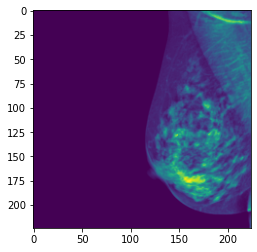

In [ ]:
print(imagesArrTotal.shape)

#imagesArr2 = imagesArr[0:,0]
#imagesArr2.shape
#print(imagesArr2)

print(imagesLabelTotal.shape)


x=600


plt.imshow(imagesArrTotal[x])

imagesLabelTotal[x]

array([0., 1., 0., 0.])

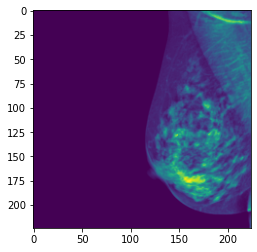

In [ ]:
x=600


plt.imshow(imagesArrTotal[x])

imagesLabelTotal[x]


<H2> Train the Model

In [ ]:
#!pip install tensorflow

#!pip install keras

!pip install keras==2.3.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [ ]:
#!pip install tensorflow

#!pip install keras

!pip install keras==2.3.1

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


Using TensorFlow backend.


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(imagesArr[0:, 0], imagesArr[0:, 1], random_state=42, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(imagesArr, imagesLabel, random_state=42, test_size=0.1)


In [ ]:
#imagesArr[0:, 0]

In [ ]:
#imagesArr[0:, 1]

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 193600)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                12390464  
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape[0]

3380

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)

X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

#X_train = X_train.reshape(X_train.shape[0], 224, 224, -1)
#X_train = X_train.reshape(-1, 224, 224, 1)

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + dateTimeObj)


model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


dateTimeObj = datetime.now()
print("Model training time ends = " + dateTimeObj)


Train on 3380 samples, validate on 376 samples
Epoch 1/10
3380/3380 [==============================] - 249s 74ms/step - loss: 0.6356 - accuracy: 0.6440 - val_loss: 0.5981 - val_accuracy: 0.6702
Epoch 2/10
3380/3380 [==============================] - 259s 77ms/step - loss: 0.5962 - accuracy: 0.6635 - val_loss: 0.5848 - val_accuracy: 0.6749
Epoch 3/10
3380/3380 [==============================] - 225s 67ms/step - loss: 0.5771 - accuracy: 0.6754 - val_loss: 0.5790 - val_accuracy: 0.6782
Epoch 4/10
3380/3380 [==============================] - 225s 67ms/step - loss: 0.5583 - accuracy: 0.6891 - val_loss: 0.5764 - val_accuracy: 0.6782
Epoch 5/10
3380/3380 [==============================] - 229s 68ms/step - loss: 0.5264 - accuracy: 0.7123 - val_loss: 0.5696 - val_accuracy: 0.6822
Epoch 6/10
3380/3380 [==============================] - 243s 72ms/step - loss: 0.5047 - accuracy: 0.7311 - val_loss: 0.5687 - val_accuracy: 0.7015
Epoch 7/10
3380/3380 [==============================] - 267s 79ms/step 

<H2> Test the accuracy of model

img_test_arr = (2294, 1914)
 Calcification, Mass [[0.3582924  0.46481147 0.5397976  0.28527576]]
Malignant
-----


NameError: name 'df_malignant_images' is not defined

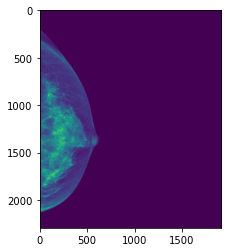

In [ ]:
# specify your image path
image_path = '/home/wsuser/work/D2-0265/07-18-2011-26675/1.000000-78722/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))



print("Malignant")
print("-----")

print(df_malignant_images[df_malignant_images['ID1'].str.contains("D2-0265")])

print("\nBenign")
print("-----")

print(df_clinical[df_clinical['ID1'].str.contains("D2-0265")])


In [ ]:
print(df_file[df_file['Subject ID'].str.contains("D2-0265")])



                                             Series UID Collection  \
1291  1.3.6.1.4.1.14519.5.2.1.1239.1759.201758168653...       CMMD   

     3rd Party Analysis  Data Description URI Subject ID  \
1291                 NO                   NaN    D2-0265   

                                              Study UID  Study Description  \
1291  1.3.6.1.4.1.14519.5.2.1.1239.1759.325774952989...                NaN   

      Study Date  Series Description  Manufacturer Modality  \
1291  07-18-2011                 NaN           NaN       MG   

                                         SOP Class Name  \
1291  Digital Mammography X-Ray Image Storage - For ...   

                    SOP Class UID  Number of Images File Size  \
1291  1.2.840.10008.5.1.4.1.1.1.2                 4  16.76 MB   

                                       File Location      Download Timestamp  
1291  .\CMMD\D2-0265\07-18-2011-26675\1.000000-78722  2021-05-25T14:21:29.11  


<H2> Save the model

In [ ]:
import pickle

# save the model to disk
filename = 'multi_label_model_1.sav'
pickle.dump(model, open(filename, 'wb'))
 


In [ ]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

<H2> Re-engineer the model - without 'both' type abnormality;

In [ ]:
df_malignant_images.groupby('abnormality').size()

abnormality
calcification          564
calcification, mass    381
mass                   381
dtype: int64

In [ ]:
df_malignant_images_wo_both = df_malignant_images[df_malignant_images['abnormality'] != 'calcification, mass']


In [ ]:
df_malignant_images_wo_both.groupby('abnormality').size()

abnormality
calcification    564
mass             381
dtype: int64

In [ ]:
# get_data for only malignant calc and malignant mass


import numpy as np
#import cv2

from skimage.transform import resize


#abels = ['calcification', 'mass']
img_size = 224

def get_data(data_dir, df_images):
    data = [] 
    dataLabel = []
    
    for index, row in df_images.iterrows():
        print(row['ID1'], row['abnormality'], row['File Location'])
        path = os.path.join(data_dir, row['File Location'])
        classify = [row['Calc'], row['Mass']]
        
        print("Path = " + path + " Class = " + str(classify))
        
    #for label in labels: 
        #path = os.path.join(data_dir, label)
        #class_num = labels.index(label)
        #for img in os.listdir(path):
        
        try:
            #files = filter(os.path.isfile, os.listdir(path))  #files only
            files = os.listdir(path)  #files only
            print(files)
            
            for img in files:
            #for img in filter(os.path.isfile, os.listdir(path)):  # files only            
                print (img)
                #print("in img process")
                
                try:
                    #img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                    #img_arr = cv2.imread(os.path.join(path, img))
                    ds = dicom.dcmread(os.path.join(path, img))
                    img_arr = ds.pixel_array
                    print("img_arr = " + str(img_arr.shape))
                    
                    #resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    resized_arr = resize(img_arr, (img_size, img_size), anti_aliasing=True) # Reshaping images to preferred size
                    print("resize_arr = " + str(resized_arr.shape))
                    
                    #data.append([resized_arr, classify])
                    data.append(resized_arr)
                    dataLabel.append(classify)
                    
                    #print("after data append")
                    
                except Exception as e:
                    print(e)
                    continue
        except Exception as e:
            print(e)
            continue
                
    return np.array(data), np.array(dataLabel)



In [ ]:
imagesArr, imagesLabel = get_data(os.getcwd(), df_malignant_images_wo_both)

P_01548 calcification Calc-Training_P_01548_LEFT_MLO/08-07-2016-DDSM-73686/1.000000-full mammogram images-21930
Path = /home/wsuser/work/Calc-Training_P_01548_LEFT_MLO/08-07-2016-DDSM-73686/1.000000-full mammogram images-21930 Class = [True, False]
[Errno 2] No such file or directory: '/home/wsuser/work/Calc-Training_P_01548_LEFT_MLO/08-07-2016-DDSM-73686/1.000000-full mammogram images-21930'
P_01548 calcification Calc-Training_P_01548_LEFT_CC/08-07-2016-DDSM-97403/1.000000-full mammogram images-40194
Path = /home/wsuser/work/Calc-Training_P_01548_LEFT_CC/08-07-2016-DDSM-97403/1.000000-full mammogram images-40194 Class = [True, False]
[Errno 2] No such file or directory: '/home/wsuser/work/Calc-Training_P_01548_LEFT_CC/08-07-2016-DDSM-97403/1.000000-full mammogram images-40194'
P_01545 calcification Calc-Training_P_01545_RIGHT_MLO/08-07-2016-DDSM-17946/1.000000-full mammogram images-40058
Path = /home/wsuser/work/Calc-Training_P_01545_RIGHT_MLO/08-07-2016-DDSM-17946/1.000000-full mammo

resize_arr = (224, 224)
P_00043 calcification Calc-Training_P_00043_LEFT_MLO/08-07-2016-DDSM-89761/1.000000-full mammogram images-92769
Path = /home/wsuser/work/Calc-Training_P_00043_LEFT_MLO/08-07-2016-DDSM-89761/1.000000-full mammogram images-92769 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5296, 2731)
resize_arr = (224, 224)
P_00031 calcification Calc-Training_P_00031_LEFT_CC/08-07-2016-DDSM-07797/1.000000-full mammogram images-01522
Path = /home/wsuser/work/Calc-Training_P_00031_LEFT_CC/08-07-2016-DDSM-07797/1.000000-full mammogram images-01522 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5251, 3076)
resize_arr = (224, 224)
P_00029 calcification Calc-Training_P_00029_LEFT_MLO/08-07-2016-DDSM-17161/1.000000-full mammogram images-62911
Path = /home/wsuser/work/Calc-Training_P_00029_LEFT_MLO/08-07-2016-DDSM-17161/1.000000-full mammogram images-62911 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (6721, 3106)
resize_arr = (224, 224)
P_00029 calcification Calc-Tra

resize_arr = (224, 224)
P_00063 calcification Calc-Training_P_00063_RIGHT_MLO/08-07-2016-DDSM-12475/1.000000-full mammogram images-61807
Path = /home/wsuser/work/Calc-Training_P_00063_RIGHT_MLO/08-07-2016-DDSM-12475/1.000000-full mammogram images-61807 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4688, 3088)
resize_arr = (224, 224)
P_00063 calcification Calc-Training_P_00063_RIGHT_CC/08-07-2016-DDSM-04603/1.000000-full mammogram images-85124
Path = /home/wsuser/work/Calc-Training_P_00063_RIGHT_CC/08-07-2016-DDSM-04603/1.000000-full mammogram images-85124 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4664, 3064)
resize_arr = (224, 224)
P_00864 calcification Calc-Training_P_00864_LEFT_CC/08-07-2016-DDSM-33263/1.000000-full mammogram images-01897
Path = /home/wsuser/work/Calc-Training_P_00864_LEFT_CC/08-07-2016-DDSM-33263/1.000000-full mammogram images-01897 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5491, 2806)
resize_arr = (224, 224)
P_00864 calcification Calc-T

resize_arr = (224, 224)
P_00981 calcification Calc-Training_P_00981_LEFT_MLO/08-07-2016-DDSM-74924/1.000000-full mammogram images-07017
Path = /home/wsuser/work/Calc-Training_P_00981_LEFT_MLO/08-07-2016-DDSM-74924/1.000000-full mammogram images-07017 Class = [True, False]
[Errno 2] No such file or directory: '/home/wsuser/work/Calc-Training_P_00981_LEFT_MLO/08-07-2016-DDSM-74924/1.000000-full mammogram images-07017'
P_00862 calcification Calc-Training_P_00862_LEFT_CC/08-07-2016-DDSM-48194/1.000000-full mammogram images-15315
Path = /home/wsuser/work/Calc-Training_P_00862_LEFT_CC/08-07-2016-DDSM-48194/1.000000-full mammogram images-15315 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4036, 2326)
resize_arr = (224, 224)
P_00861 calcification Calc-Training_P_00861_RIGHT_CC/08-07-2016-DDSM-88697/1.000000-full mammogram images-69122
Path = /home/wsuser/work/Calc-Training_P_00861_RIGHT_CC/08-07-2016-DDSM-88697/1.000000-full mammogram images-69122 Class = [True, False]
['1-1.dcm']
1-1.d

resize_arr = (224, 224)
P_00846 calcification Calc-Training_P_00846_LEFT_MLO/08-07-2016-DDSM-85349/1.000000-full mammogram images-32371
Path = /home/wsuser/work/Calc-Training_P_00846_LEFT_MLO/08-07-2016-DDSM-85349/1.000000-full mammogram images-32371 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5386, 2011)
resize_arr = (224, 224)
P_00852 calcification Calc-Training_P_00852_LEFT_CC/08-07-2016-DDSM-93459/1.000000-full mammogram images-22342
Path = /home/wsuser/work/Calc-Training_P_00852_LEFT_CC/08-07-2016-DDSM-93459/1.000000-full mammogram images-22342 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5596, 3901)
resize_arr = (224, 224)
P_00852 calcification Calc-Training_P_00852_LEFT_MLO/08-07-2016-DDSM-41701/1.000000-full mammogram images-58585
Path = /home/wsuser/work/Calc-Training_P_00852_LEFT_MLO/08-07-2016-DDSM-41701/1.000000-full mammogram images-58585 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (7111, 4186)
resize_arr = (224, 224)
P_00855 calcification Calc-Tra

resize_arr = (224, 224)
P_01045 calcification Calc-Training_P_01045_RIGHT_CC/08-07-2016-DDSM-01794/1.000000-full mammogram images-61059
Path = /home/wsuser/work/Calc-Training_P_01045_RIGHT_CC/08-07-2016-DDSM-01794/1.000000-full mammogram images-61059 Class = [True, False]
[Errno 2] No such file or directory: '/home/wsuser/work/Calc-Training_P_01045_RIGHT_CC/08-07-2016-DDSM-01794/1.000000-full mammogram images-61059'
P_01059 calcification Calc-Training_P_01059_LEFT_CC/08-07-2016-DDSM-37467/1.000000-full mammogram images-88146
Path = /home/wsuser/work/Calc-Training_P_01059_LEFT_CC/08-07-2016-DDSM-37467/1.000000-full mammogram images-88146 Class = [True, False]
[Errno 2] No such file or directory: '/home/wsuser/work/Calc-Training_P_01059_LEFT_CC/08-07-2016-DDSM-37467/1.000000-full mammogram images-88146'
P_01059 calcification Calc-Training_P_01059_LEFT_MLO/08-07-2016-DDSM-23946/1.000000-full mammogram images-81155
Path = /home/wsuser/work/Calc-Training_P_01059_LEFT_MLO/08-07-2016-DDSM-239

resize_arr = (224, 224)
P_00280 calcification Calc-Training_P_00280_LEFT_MLO/08-07-2016-DDSM-28428/1.000000-full mammogram images-94102
Path = /home/wsuser/work/Calc-Training_P_00280_LEFT_MLO/08-07-2016-DDSM-28428/1.000000-full mammogram images-94102 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5824, 4104)
resize_arr = (224, 224)
P_00288 calcification Calc-Training_P_00288_RIGHT_CC/08-07-2016-DDSM-45715/1.000000-full mammogram images-79009
Path = /home/wsuser/work/Calc-Training_P_00288_RIGHT_CC/08-07-2016-DDSM-45715/1.000000-full mammogram images-79009 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (6136, 3046)
resize_arr = (224, 224)
P_00288 calcification Calc-Training_P_00288_RIGHT_MLO/08-07-2016-DDSM-68822/1.000000-full mammogram images-51220
Path = /home/wsuser/work/Calc-Training_P_00288_RIGHT_MLO/08-07-2016-DDSM-68822/1.000000-full mammogram images-51220 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (7021, 3076)
resize_arr = (224, 224)
P_00293 calcification Calc

resize_arr = (224, 224)
P_00078 calcification Calc-Training_P_00078_LEFT_CC/08-07-2016-DDSM-74864/1.000000-full mammogram images-74029
Path = /home/wsuser/work/Calc-Training_P_00078_LEFT_CC/08-07-2016-DDSM-74864/1.000000-full mammogram images-74029 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (6331, 3766)
resize_arr = (224, 224)
P_00078 calcification Calc-Training_P_00078_LEFT_MLO/08-07-2016-DDSM-94271/1.000000-full mammogram images-28597
Path = /home/wsuser/work/Calc-Training_P_00078_LEFT_MLO/08-07-2016-DDSM-94271/1.000000-full mammogram images-28597 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (6166, 4111)
resize_arr = (224, 224)
P_00084 calcification Calc-Training_P_00084_LEFT_CC/08-07-2016-DDSM-96706/1.000000-full mammogram images-00736
Path = /home/wsuser/work/Calc-Training_P_00084_LEFT_CC/08-07-2016-DDSM-96706/1.000000-full mammogram images-00736 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5461, 2776)
resize_arr = (224, 224)
P_00084 calcification Calc-Train

resize_arr = (224, 224)
P_00263 calcification Calc-Training_P_00263_LEFT_MLO/08-07-2016-DDSM-20195/1.000000-full mammogram images-41144
Path = /home/wsuser/work/Calc-Training_P_00263_LEFT_MLO/08-07-2016-DDSM-20195/1.000000-full mammogram images-41144 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (6661, 3346)
resize_arr = (224, 224)
P_00266 calcification Calc-Training_P_00266_LEFT_MLO/08-07-2016-DDSM-92903/1.000000-full mammogram images-10891
Path = /home/wsuser/work/Calc-Training_P_00266_LEFT_MLO/08-07-2016-DDSM-92903/1.000000-full mammogram images-10891 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (5944, 3704)
resize_arr = (224, 224)
P_00438 calcification Calc-Training_P_00438_LEFT_MLO/08-07-2016-DDSM-73421/1.000000-full mammogram images-64040
Path = /home/wsuser/work/Calc-Training_P_00438_LEFT_MLO/08-07-2016-DDSM-73421/1.000000-full mammogram images-64040 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4704, 2608)
resize_arr = (224, 224)
P_00443 calcification Calc-T

resize_arr = (224, 224)
P_00667 calcification Calc-Training_P_00667_RIGHT_CC/08-07-2016-DDSM-03903/1.000000-full mammogram images-93518
Path = /home/wsuser/work/Calc-Training_P_00667_RIGHT_CC/08-07-2016-DDSM-03903/1.000000-full mammogram images-93518 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4672, 2848)
resize_arr = (224, 224)
P_00667 calcification Calc-Training_P_00667_RIGHT_MLO/08-07-2016-DDSM-83255/1.000000-full mammogram images-16730
Path = /home/wsuser/work/Calc-Training_P_00667_RIGHT_MLO/08-07-2016-DDSM-83255/1.000000-full mammogram images-16730 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4640, 2776)
resize_arr = (224, 224)
P_00683 calcification Calc-Training_P_00683_RIGHT_CC/08-07-2016-DDSM-83352/1.000000-full mammogram images-31737
Path = /home/wsuser/work/Calc-Training_P_00683_RIGHT_CC/08-07-2016-DDSM-83352/1.000000-full mammogram images-31737 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4966, 2656)
resize_arr = (224, 224)
P_00683 calcification Calc

resize_arr = (224, 224)
P_00530 calcification Calc-Training_P_00530_LEFT_MLO/08-07-2016-DDSM-68403/1.000000-full mammogram images-57923
Path = /home/wsuser/work/Calc-Training_P_00530_LEFT_MLO/08-07-2016-DDSM-68403/1.000000-full mammogram images-57923 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (6196, 3616)
resize_arr = (224, 224)
P_00534 calcification Calc-Training_P_00534_RIGHT_CC/08-07-2016-DDSM-16527/1.000000-full mammogram images-59479
Path = /home/wsuser/work/Calc-Training_P_00534_RIGHT_CC/08-07-2016-DDSM-16527/1.000000-full mammogram images-59479 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4640, 2776)
resize_arr = (224, 224)
P_00534 calcification Calc-Training_P_00534_RIGHT_MLO/08-07-2016-DDSM-87903/1.000000-full mammogram images-88791
Path = /home/wsuser/work/Calc-Training_P_00534_RIGHT_MLO/08-07-2016-DDSM-87903/1.000000-full mammogram images-88791 Class = [True, False]
['1-1.dcm']
1-1.dcm
img_arr = (4672, 2680)
resize_arr = (224, 224)
P_00546 calcification Calc

resize_arr = (224, 224)
D1-0173 calcification D1-0173/07-18-2011-33756/1.000000-64397
Path = /home/wsuser/work/D1-0173/07-18-2011-33756/1.000000-64397 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0171 calcification D1-0171/07-18-2011-89121/1.000000-65162
Path = /home/wsuser/work/D1-0171/07-18-2011-89121/1.000000-65162 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0169 calcification D1-0169/07-18-2011-97260/1.000000-34173
Path = /home/wsuser/work/D1-0169/07-18-2011-97260/1.000000-34173 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0213 calcification D1-0213/07-18-2011-97028/1.000000-58660
Path = /home/wsuser/work/D1-0213/07-18-2011-97028/1.000000-58660 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0211 calcification D1-0211/07-18-2011-40907/1.000000-87505
Path = /home/wsuser/work/D1-0211/07-18-2011-40907/1.000000-87505 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0208 calcification D1-0208/07-18-2011-91674/1.000000-28579
Path = /home/wsuser/work/D1-0208/07-18-2011-91674/1.000000-28579 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0056 calcification D1-0056/07-18-2010-20192/1.000000-52218
Path = /home/wsuser/work/D1-0056/07-18-2010-20192/1.000000-52218 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0055 calcification D1-0055/07-18-2010-00397/1.000000-47548
Path = /home/wsuser/work/D1-0055/07-18-2010-00397/1.000000-47548 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0053 calcification D1-0053/07-18-2010-94559/1.000000-60987
Path = /home/wsuser/work/D1-0053/07-18-2010-94559/1.000000-60987 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0051 calcification D1-0051/07-18-2010-81300/1.000000-84975
Path = /home/

img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0107 calcification D1-0107/07-18-2010-48156/1.000000-55939
Path = /home/wsuser/work/D1-0107/07-18-2010-48156/1.000000-55939 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0106 calcification D1-0106/07-18-2010-64440/1.000000-49048
Path = /home/wsuser/work/D1-0106/07-18-2010-64440/1.000000-49048 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0105 calcification D1-0105/07-18-2010-53115/1.000000-16134
Path = /home/wsuser/work/D1-0105/07-18-2010-53115/1.000000-16134 Class = [True, False]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-0122 calcification D1-0122/07-18-2010-41816/1.000000-47933
Path = /home/wsuser/work/D1-0122/07-18-2010-4

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0043 calcification D2-0043/07-18-2010-48635/1.000000-16624
Path = /home/wsuser/work/D2-0043/07-18-2010-48635/1.000000-16624 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0044 calcification D2-0044/07-18-2011-00540/1.000000-56972
Path = /home/wsuser/work/D2-0044/07-18-2011-00540/1.000000-56972 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0013 calcification D2-0013/07-18-2010-03314/1.000000-85960
Path = /home/wsuser/work/D2-0013/07-18-2010-03314/1.000000-85960 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0014 calcification D2-0014/07-18-2010-37304/1.000000-79119
Path = /home/wsuser/work/D2-0014/07-18-2010-37304/1.000000-79119 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0015 calcification D2-0015/07-18-20

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0082 calcification D2-0082/07-18-2011-14284/1.000000-95077
Path = /home/wsuser/work/D2-0082/07-18-2011-14284/1.000000-95077 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0083 calcification D2-0083/07-18-2011-23291/1.000000-90925
Path = /home/wsuser/work/D2-0083/07-18-2011-23291/1.000000-90925 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0084 calcification D2-0084/07-18-20

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0052 calcification D2-0052/07-18-2011-94691/1.000000-56640
Path = /home/wsuser/work/D2-0052/07-18-2011-94691/1.000000-56640 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0053 calcification D2-0053/07-18-2011-64147/1.000000-57057
Path = /home/wsuser/work/D2-0053/07-18-2011-64147/1.000000-57057 Class = [True, False]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0054 calcifi

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1545 mass D1-1545/07-18-2011-36244/1.000000-14138
Path = /home/wsuser/work/D1-1545/07-18-2011-36244/1.000000-14138 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1544 mass D1-1544/07-18-2011-22172/1.000000-88915
Path = /home/wsuser/work/D1-1544/07-18-2011-22172/1.000000-88915 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1532 mass D1-1532/07-18-2011-12237/1.000000-31786
Path = /home/wsuser/work/D1-1532/07-18-2011-12237/1.000000-31786 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1539 mass D1-1539/07-18-2011-50291/1.000000-

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1563 mass D1-1563/07-18-2011-70128/1.000000-28911
Path = /home/wsuser/work/D1-1563/07-18-2011-70128/1.000000-28911 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1562 mass D1-1562/07-18-2011-41459/1.000000-99492
Path = /home/wsuser/work/D1-1562/07-18-2011-41459/1.000000-99492 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1561 mass D1-1561/07-18-2011-81867/1.000000-47679
Path = /home/wsuser/work/D1-1561/07-18-2011-81867/1.000000-47679 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1559 mass D1-1559/07-18-2011-92933/1.000000-46703
Path = /home/wsuser/work/D1-1559/07-18-2011-92933

img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1506 mass D1-1506/07-18-2011-72127/1.000000-63984
Path = /home/wsuser/work/D1-1506/07-18-2011-72127/1.000000-63984 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1498 mass D1-1498/07-18-2011-81853/1.000000-19149
Path = /home/wsuser/work/D1-1498/07-18-2011-81853/1.000000-19149 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1494 mass D1-1494/07-18-2011-49863/1.000000-36975
Path = /home/wsuser/work/D1-1494/07-18-2011-49863/1.000000-36975 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1493 mass D1-1493/07-18-2011-19891/1.000000-02173
Path = /home/wsuser/work/D1-1493/07-18-2011-19891/1.000000-02173 Class = [False, 

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0727 mass D2-0727/07-18-2011-07024/1.000000-50301
Path = /home/wsuser/work/D2-0727/07-18-2011-07024/1.000000-50301 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0720 mass D2-0720/07-18-2011-59072/1.000000-94395
Path = /home/wsuser/work/D2-0720/07-18-2011-59072/1.000000-94395 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0728 mass D2-0728/07-18-2011-69216/1.000000-22310
Path = /home/wsuser/work/D2-0728/07

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0718 mass D2-0718/07-18-2011-87676/1.000000-03963
Path = /home/wsuser/work/D2-0718/07-18-2011-87676/1.000000-03963 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0708 mass D2-0708/07-18-2011-90490/1.000000-35123
Path = /home/wsuser/work/D2-0708/07-18-2011-90490/1.000000-35123 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0710 mass D2-0710/07-18-2011-35541/1.000000-50084
Pat

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1608 mass D1-1608/07-18-2011-67353/1.000000-54784
Path = /home/wsuser/work/D1-1608/07-18-2011-67353/1.000000-54784 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1607 mass D1-1607/07-18-2011-92802/1.000000-04438
Path = /home/wsuser/work/D1-1607/07-18-2011-92802/1.000000-04438 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1605 mass D1-1605/07-18-2011-22672/1.000000-02483
Path = /home/wsuser/work/D1-1605/07-18-2011-22672/1.000000-02483 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1601 mass D1-1601/07-18-2011-09062/1.000000-44179
Path = /home/wsuser/work/D1-1601/07-18-2011-09062

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1297 mass D1-1297/07-18-2010-33115/1.000000-25115
Path = /home/wsuser/work/D1-1297/07-18-2010-33115/1.000000-25115 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1395 mass D1-1395/07-18-2010-95860/1.000000-54968
Path = /home/wsuser/work/D1-1395/07-18-2010-95860/1.000000-54968 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1167 mass D1-1167/07-18-2010-89049/1.000000-56442
Path = /home/wsuser/work/D1-1167/07-18-2010-89049/1.000000-56442 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1166 mass D1-1166/07-18-2010-59542/1.000000-81492
Path = /home/wsuser/work/D1-1166/07-18-2010-59542

img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1189 mass D1-1189/07-18-2010-02636/1.000000-29532
Path = /home/wsuser/work/D1-1189/07-18-2010-02636/1.000000-29532 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1185 mass D1-1185/07-18-2010-03449/1.000000-49214
Path = /home/wsuser/work/D1-1185/07-18-2010-03449/1.000000-49214 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1184 mass D1-1184/07-18-2010-99221/1.000000-16962
Path = /home/wsuser/work/D1-1184/07-18-2010-99221/1.000000-16962 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1183 mass D1-1183/07-18-2010-56257/1.000000-98994
Path = /home/wsuser/work/D1-1183/07-18-2010-56257/1.000000-98994 Class = [False, 

resize_arr = (224, 224)
D1-1071 mass D1-1071/07-18-2010-07778/1.000000-59961
Path = /home/wsuser/work/D1-1071/07-18-2010-07778/1.000000-59961 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1076 mass D1-1076/07-18-2010-53188/1.000000-62760
Path = /home/wsuser/work/D1-1076/07-18-2010-53188/1.000000-62760 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1115 mass D1-1115/07-18-2010-77212/1.000000-67626
Path = /home/wsuser/work/D1-1115/07-18-2010-77212/1.000000-67626 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1111 mass D1-1111/07-18-2010-30333/1.000000-02089
Path = /home/wsuser/work/D1-1111/07-18-2010-30333/1.000000-02089 Class = [False, True]
['1-2.dcm', '1-1.

resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1340 mass D1-1340/07-18-2010-90118/1.000000-56236
Path = /home/wsuser/work/D1-1340/07-18-2010-90118/1.000000-56236 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1332 mass D1-1332/07-18-2010-29908/1.000000-36576
Path = /home/wsuser/work/D1-1332/07-18-2010-29908/1.000000-36576 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1330 mass D1-1330/07-18-2010-93847/1.000000-31461
Path = /home/wsuser/work/D1-1330/07-18-2010-93847/1.000000-31461 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1312 mass D1-1312/07-18-2010-76976/1.000000-16911
Path = /home/wsuser/work/D1-1312/07-18-2010-76976/1.000000-16911 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1311 mass D1-1311/07-18-2010-35634/1.000000-91562
Path = /home/wsuser/work/D1-1311/07-18-2010-35634/1.000000-91562 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1257 mass D1-1257/07-18-2010-79521/1.000000-38029
Path = /home/wsuser/work/D1-1257/07-18-2010-79521/1.000000-38029 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1255 mass D1-1255/07-18-2010-71696/1.000000-59402
Path = /home/wsuser/work/D

resize_arr = (224, 224)
D1-1296 mass D1-1296/07-18-2010-35655/1.000000-11155
Path = /home/wsuser/work/D1-1296/07-18-2010-35655/1.000000-11155 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1293 mass D1-1293/07-18-2010-16914/1.000000-20550
Path = /home/wsuser/work/D1-1293/07-18-2010-16914/1.000000-20550 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1292 mass D1-1292/07-18-2010-51319/1.000000-65585
Path = /home/wsuser/work/D1-1292/07-18-2010-51319/1.000000-65585 Class = [False, True]
['1-2.dcm', '1-1.dcm']
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D1-1289 mass D1-1289/07-18-2010-00180/1.000000-07991
Path = /home/wsuser/work/D1-1289/07-18-2010-00180/1.000000-07991 Class = [False, True]
['1-2.dcm', '1-1.

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0426 mass D2-0426/07-18-2010-53604/1.000000-27247
Path = /home/wsuser/work/D2-0426/07-18-2010-53604/1.000000-27247 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0428 mass D2-0428/07-18-2010-86343/1.000000-89703
Path = /home/wsuser/work/D2-0428/07-18-2010-86343/1.000000-89703 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0429 mass D2-0429/07-18-2010-3

img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0396 mass D2-0396/07-18-2010-78279/1.000000-86684
Path = /home/wsuser/work/D2-0396/07-18-2010-78279/1.000000-86684 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0397 mass D2-0397/07-18-2010-78844/1.000000-32018
Path = /home/wsuser/work/D2-0397/07-18-2010-78844/1.000000-32018 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
re

resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0469 mass D2-0469/07-18-2010-68702/1.000000-89216
Path = /home/wsuser/work/D2-0469/07-18-2010-68702/1.000000-89216 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D2-0470 mass D2-0470/07-18-2010-90736/1.000000-08277
Path = /home/wsuser/work/D2-0470/07-18-2010-90736/1.000000-08277 Class = [False, True]
['1-3.dcm', '1-2.dcm', '1-1.dcm', '1-4.dcm']
1-3.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-2.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-1.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
1-4.dcm
img_arr = (2294, 1914)
resize_arr = (224, 224)
D

(1799, 224, 224)
(1799, 2)


array([ True, False])

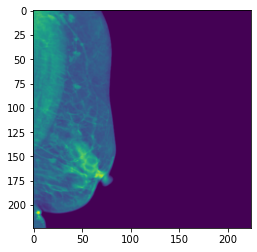

In [ ]:
print(imagesArr.shape)

print(imagesLabel.shape)


x=300

plt.imshow(imagesArr[x])

imagesLabel[x]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(imagesArr, imagesLabel, random_state=42, test_size=0.1)

X_train.shape[0]


1619

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)

X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

In [ ]:
#using same model parameters as first model

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 1619 samples, validate on 180 samples
Epoch 1/10
1619/1619 [==============================] - 99s 61ms/step - loss: 0.7092 - accuracy: 0.6322 - val_loss: 0.6178 - val_accuracy: 0.6306
Epoch 2/10
1619/1619 [==============================] - 98s 61ms/step - loss: 0.5721 - accuracy: 0.6875 - val_loss: 0.5982 - val_accuracy: 0.6500
Epoch 3/10
1619/1619 [==============================] - 97s 60ms/step - loss: 0.5007 - accuracy: 0.7585 - val_loss: 0.5769 - val_accuracy: 0.6778
Epoch 4/10
1619/1619 [==============================] - 99s 61ms/step - loss: 0.4125 - accuracy: 0.8230 - val_loss: 0.6287 - val_accuracy: 0.6667
Epoch 5/10
1619/1619 [==============================] - 98s 60ms/step - loss: 0.3281 - accuracy: 0.8678 - val_loss: 0.6407 - val_accuracy: 0.6667
Epoch 6/10
1619/1619 [==============================] - 100s 62ms/step - loss: 0.2445 - accuracy: 0.9117 - val_loss: 0.6611 - val_accuracy: 0.6417
Epoch 7/10
1619/1619 [==============================] - 97s 60ms/step - loss

<H2> Test the model

img_test_arr = (2294, 1914)
 Calcification, Mass [[0.26748538 0.770303  ]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.53007793 0.3556538 ]]

Malignant
-----
Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, ID1, abnormality, classification, File Location, Calc, Mass]
Index: []

Benign
-----
         ID1 LeftRight  Age  number abnormality classification subtype
747  D1-1007         R   40       2        mass         Benign     NaN


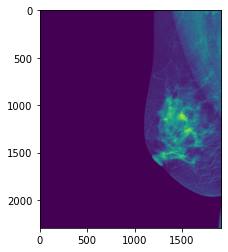

In [ ]:
# specify your image path
image_path = '/home/wsuser/work/D1-1007/07-18-2011-66640/1.000000-36196/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D1-1007/07-18-2011-66640/1.000000-36196/1-2.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))



print("\nMalignant")
print("-----")

print(df_malignant_images[df_malignant_images['ID1'].str.contains("D1-1007")])

print("\nBenign")
print("-----")

print(df_clinical[df_clinical['ID1'].str.contains("D1-1007")])

img_test_arr = (5912, 4096)
 Calcification, Mass [[1.000000e+00 2.924507e-26]]
img_test_arr = (5832, 4104)
 Calcification, Mass [[1.000000e+00 6.255209e-14]]


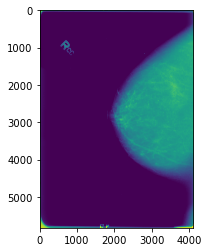

In [ ]:
# specify your image path
image_path = '/home/wsuser/work/Calc-Training_P_00559_RIGHT_MLO/08-07-2016-DDSM-61524/1.000000-full mammogram images-42976/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/Calc-Training_P_00559_RIGHT_CC/08-07-2016-DDSM-69721/1.000000-full mammogram images-48172/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


img_test_arr = (2294, 1914)
 Calcification, Mass [[0.02220648 0.9763941 ]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.0638633 0.9624495]]

Malignant
-----
      Unnamed: 0  Unnamed: 0.1      ID1 abnormality classification  \
1307        1307           968  D2-0404        mass      Malignant   

                                File Location   Calc  Mass  
1307  D2-0404/07-18-2010-46970/1.000000-19244  False  True  

Benign
-----
          ID1 LeftRight  Age  number abnormality classification    subtype
1521  D2-0404         L   47       2        mass      Malignant  Luminal B


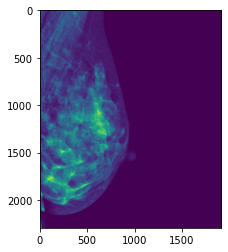

In [ ]:
# specify your image path
image_path = '/home/wsuser/work/D2-0404/07-18-2010-46970/1.000000-19244/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D2-0404/07-18-2010-46970/1.000000-19244/1-2.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


print("\nMalignant")
print("-----")

print(df_malignant_images[df_malignant_images['ID1'].str.contains("D2-0404")])

print("\nBenign")
print("-----")

print(df_clinical[df_clinical['ID1'].str.contains("D2-0404")])

img_test_arr = (2294, 1914)
 Calcification, Mass [[0.9272236 0.1309251]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.6599154 0.2391089]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.53218734 0.45079792]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.2510701  0.77127874]]
Malignant
-----
    Unnamed: 0  Unnamed: 0.1      ID1          abnormality classification  \
15          15           828  D2-0265  calcification, mass      Malignant   

                              File Location  Calc  Mass  
15  D2-0265/07-18-2011-26675/1.000000-78722  True  True  

Benign
-----
          ID1 LeftRight  Age  number abnormality classification    subtype
1380  D2-0265         L   27       2        both         Benign        NaN
1381  D2-0265         R   27       2        both      Malignant  Luminal B


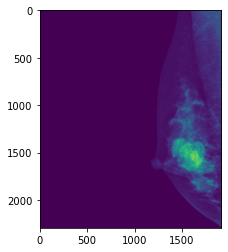

In [ ]:
# specify your image path


image_path = '/home/wsuser/work/D2-0265/07-18-2011-26675/1.000000-78722/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D2-0265/07-18-2011-26675/1.000000-78722/1-2.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D2-0265/07-18-2011-26675/1.000000-78722/1-3.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D2-0265/07-18-2011-26675/1.000000-78722/1-4.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))



print("Malignant")
print("-----")

print(df_malignant_images[df_malignant_images['ID1'].str.contains("D2-0265")])

print("\nBenign")
print("-----")

print(df_clinical[df_clinical['ID1'].str.contains("D2-0265")])


img_test_arr = (2294, 1914)
 Calcification, Mass [[0.5375734 0.612372 ]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.1245022  0.87635505]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.9915215  0.01012549]]
img_test_arr = (2294, 1914)
 Calcification, Mass [[0.85508955 0.12822056]]

Malignant
-----
Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, ID1, abnormality, classification, File Location, Calc, Mass]
Index: []

Benign
-----
         ID1 LeftRight  Age  number abnormality classification subtype
161  D1-0245         L   41       2        both         Benign     NaN
162  D1-0245         R   41       2        both         Benign     NaN


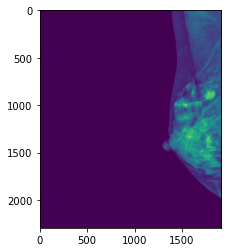

In [ ]:
# specify your image path
image_path = '/home/wsuser/work/D1-0245/07-18-2010-96191/1.000000-82168/1-1.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D1-0245/07-18-2010-96191/1.000000-82168/1-2.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D1-0245/07-18-2010-96191/1.000000-82168/1-3.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


image_path = '/home/wsuser/work/D1-0245/07-18-2010-96191/1.000000-82168/1-4.dcm'

imageClass = TestImage(image_path)

print(" Calcification, Mass " + str(imageClass))


print("\nMalignant")
print("-----")

print(df_malignant_images[df_malignant_images['ID1'].str.contains("D1-0245")])

print("\nBenign")
print("-----")

print(df_clinical[df_clinical['ID1'].str.contains("D1-0245")])

<H3> Model Findings - can detect calcification and mass abnormality, not both together and unable to differentiate malignant or benign accurately



In [ ]:
print(df_file[df_file['Subject ID'].str.contains("D1-0245")])

                                            Series UID Collection  \
148  1.3.6.1.4.1.14519.5.2.1.1239.1759.179426301375...       CMMD   

    3rd Party Analysis  Data Description URI Subject ID  \
148                 NO                   NaN    D1-0245   

                                             Study UID  Study Description  \
148  1.3.6.1.4.1.14519.5.2.1.1239.1759.696633856382...                NaN   

     Study Date  Series Description  Manufacturer Modality  \
148  07-18-2010                 NaN           NaN       MG   

                                        SOP Class Name  \
148  Digital Mammography X-Ray Image Storage - For ...   

                   SOP Class UID  Number of Images File Size  \
148  1.2.840.10008.5.1.4.1.1.1.2                 4  16.76 MB   

                                      File Location       Download Timestamp  
148  .\CMMD\D1-0245\07-18-2010-96191\1.000000-82168  2021-05-25T13:30:45.021  


In [ ]:
import pickle

# save the model to disk
filename = 'multi_label_model_2.sav'
pickle.dump(model, open(filename, 'wb'))
 


In [ ]:
model_result_path = "keras_model_2.h5"
model.save(model_result_path)



In [ ]:
!tar -zcvf keras_model.tgz keras_model_2.h5


keras_model_2.h5


In [ ]:
metadata = {
client.repository.ModelMetaNames.NAME: 'Image-classifier',
client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.5',
client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES:[{'name':'keras', 'version': '2.1.3'}]
}

NameError: name 'client' is not defined

In [ ]:
published_model = client.repository.store_model(model= 'keras_model.tgz', meta_props=metadata, training_data= X_train,training_target= y_train)

In [ ]:
model_id = published_model["metadata"]["guid"]

model_deployment_details = client.deployments.create(artifact_uid=model_id, name="deployment_name" )

<H2> Model Review - Data Add on for more features training to differntiate malignant and benign cases

In [ ]:
df_clinical.groupby(['abnormality','classification']).size()

abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign             64
               Malignant         198
mass           Benign            412
               Malignant         737
dtype: int64

- top up benign cases; 

- add 381-64 = 317 x 2 = 634 calc benign images
- top up 381 - 198 = 183 x 2 = 366 calc malignant images; same as before
- downsize mass benign to 381 x 2 images
- downsize mass malignant to 381 x 2 images; same as before 

- retain both malignant as 381 x 2 images;
- retain both benign as 80 x 2 images; as limitations of data source; expect accuracy loss when both calc and mass abnormality detected




In [ ]:
df_clinical.head()

ID1 LeftRight  Age    abnormality classification     subtype
0  D1-0001         R   44  calcification         Benign  No SubType
1  D1-0002         L   40  calcification         Benign  No SubType
2  D1-0003         L   39  calcification         Benign  No SubType
3  D1-0004         L   41  calcification         Benign  No SubType
4  D1-0005         R   42  calcification         Benign  No SubType

In [ ]:
df_CMMD_AllType = df_clinical[['ID1', 'abnormality', 'classification']]
df_CMMD_AllType.head()

ID1    abnormality classification
0  D1-0001  calcification         Benign
1  D1-0002  calcification         Benign
2  D1-0003  calcification         Benign
3  D1-0004  calcification         Benign
4  D1-0005  calcification         Benign

In [ ]:
df_CMMD_FilePath.head()


Subject ID                            File Location
0    D1-0003  D1-0003/07-18-2011-25491/1.000000-24283
1    D1-0001  D1-0001/07-18-2010-79377/1.000000-70244
2    D1-0002  D1-0002/07-18-2010-49231/1.000000-45313
3    D1-0004  D1-0004/07-18-2011-14914/1.000000-36301
4    D1-0006  D1-0006/07-18-2010-16802/1.000000-64676

In [ ]:
df_CMMD_FilePath.shape

(1775, 2)

In [ ]:
df_CMMD_AllType.shape

(1872, 3)

In [ ]:
# link the two dataframe

df_CMMD_AllType_Images = pd.merge(left=df_CMMD_AllType, right=df_CMMD_FilePath, left_on='ID1', right_on='Subject ID')

df_CMMD_AllType_Images.head()

ID1    abnormality classification Subject ID  \
0  D1-0001  calcification         Benign    D1-0001   
1  D1-0002  calcification         Benign    D1-0002   
2  D1-0003  calcification         Benign    D1-0003   
3  D1-0004  calcification         Benign    D1-0004   
4  D1-0005  calcification         Benign    D1-0005   

                             File Location  
0  D1-0001/07-18-2010-79377/1.000000-70244  
1  D1-0002/07-18-2010-49231/1.000000-45313  
2  D1-0003/07-18-2011-25491/1.000000-24283  
3  D1-0004/07-18-2011-14914/1.000000-36301  
4  D1-0005/07-18-2011-52347/1.000000-77249

In [ ]:
df_CMMD_AllType_Images.shape


(1872, 5)

In [ ]:
df_CMMD_AllType_Images.nunique()

ID1               1775
abnormality          3
classification       2
Subject ID        1775
File Location     1775
dtype: int64

In [ ]:
df_CMMD_AllType_Images.groupby(['abnormality', 'classification']).size()

abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign             64
               Malignant         198
mass           Benign            412
               Malignant         737
dtype: int64

In [ ]:
df_CMMD_Both_Calc = pd.DataFrame()
df_CMMD_Both_Calc = df_CMMD_AllType_Images[df_CMMD_AllType_Images['abnormality'].str.contains('both|calcification')]

df_CMMD_Both_Calc.groupby(['abnormality', 'classification']).size()


abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign             64
               Malignant         198
dtype: int64

In [ ]:
df_CMMD_Mass = pd.DataFrame()
df_CMMD_Mass = df_CMMD_AllType_Images[df_CMMD_AllType_Images['abnormality'].str.contains('mass')]

df_CMMD_Mass.groupby(['abnormality', 'classification']).size()


abnormality  classification
mass         Benign            412
             Malignant         737
dtype: int64

In [ ]:
# take 381 cases for mass benign and mass malignant

df_CMMD_Mass2 = pd.DataFrame()

df_CMMD_Mass2 = df_CMMD_Mass[df_CMMD_Mass['classification'].str.contains('Benign')].head(381)
df_CMMD_Mass2 = df_CMMD_Mass2.append(df_CMMD_Mass[df_CMMD_Mass['classification'].str.contains('Malignant')].head(381))

df_CMMD_Mass2.groupby(['abnormality', 'classification']).size()


abnormality  classification
mass         Benign            381
             Malignant         381
dtype: int64

In [ ]:
# merge back to all types with 381 cases
df_CMMD_AllType_Images2 = pd.DataFrame()

df_CMMD_AllType_Images2 = df_CMMD_Both_Calc.append(df_CMMD_Mass2)

df_CMMD_AllType_Images2.groupby(['abnormality', 'classification']).size()


abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign             64
               Malignant         198
mass           Benign            381
               Malignant         381
dtype: int64

In [ ]:
# link the two dataframe; from CBIS

df_CBIS_AllType_Images = pd.merge(left=df_calc_cbis, right=df_calc_cbis_filepath, left_on='Subject ID', right_on='Subject ID')

df_CBIS_AllType_Images.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  pathology  \
0    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
1    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
2    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
3    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
4    calcification          NaN          REGIONAL           2     BENIGN   

   subtlety                                    image file path  \
0         3  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1         3  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2         4  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3         4  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4         3  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                        Subject ID  \
0   Calc-Training_P_00005_RIGHT_CC   
1  Calc-Training_P_00005_RIGHT_MLO   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC   

                                       File Location  
0  Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1  Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
2  Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-...  
3  Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM...  
4  Calc-Training_P_00008_LEFT_CC/08-07-2016-DDSM-...

In [ ]:
#top up calc malignant cases with CBIS images (1 image per row)
#381 - 198 = 183 , x2 = 366

df_CBIS_Calc_Malignant = pd.DataFrame()

df_CBIS_Calc_Malignant = df_CBIS_AllType_Images[df_CBIS_AllType_Images['pathology'] == 'MALIGNANT'].head(366)

df_CBIS_Calc_Malignant.head()

patient_id  breast density left or right breast image view  abnormality id  \
0     P_00005               3                RIGHT         CC               1   
1     P_00005               3                RIGHT        MLO               1   
12    P_00012               2                 LEFT         CC               1   
13    P_00012               2                 LEFT        MLO               1   
15    P_00014               4                 LEFT         CC               1   

   abnormality type    calc type calc distribution  assessment  pathology  \
0     calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
1     calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
12    calcification  PLEOMORPHIC         CLUSTERED           4  MALIGNANT   
13    calcification  PLEOMORPHIC         CLUSTERED           4  MALIGNANT   
15    calcification  PLEOMORPHIC         CLUSTERED           4  MALIGNANT   

    subtlety                                    image file path  \
0          3  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1          3  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
12         4  Calc-Training_P_00012_LEFT_CC/1.3.6.1.4.1.9590...   
13         3  Calc-Training_P_00012_LEFT_MLO/1.3.6.1.4.1.959...   
15         4  Calc-Training_P_00014_LEFT_CC/1.3.6.1.4.1.9590...   

                              cropped image file path  \
0   Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1   Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
12  Calc-Training_P_00012_LEFT_CC_1/1.3.6.1.4.1.95...   
13  Calc-Training_P_00012_LEFT_MLO_1/1.3.6.1.4.1.9...   
15  Calc-Training_P_00014_LEFT_CC_1/1.3.6.1.4.1.95...   

                                   ROI mask file path  \
0   Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1   Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
12  Calc-Training_P_00012_LEFT_CC_1/1.3.6.1.4.1.95...   
13  Calc-Training_P_00012_LEFT_MLO_1/1.3.6.1.4.1.9...   
15  Calc-Training_P_00014_LEFT_CC_1/1.3.6.1.4.1.95...   

                         Subject ID  \
0    Calc-Training_P_00005_RIGHT_CC   
1   Calc-Training_P_00005_RIGHT_MLO   
12    Calc-Training_P_00012_LEFT_CC   
13   Calc-Training_P_00012_LEFT_MLO   
15    Calc-Training_P_00014_LEFT_CC   

                                        File Location  
0   Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1   Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
12  Calc-Training_P_00012_LEFT_CC/08-07-2016-DDSM-...  
13  Calc-Training_P_00012_LEFT_MLO/08-07-2016-DDSM...  
15  Calc-Training_P_00014_LEFT_CC/08-07-2016-DDSM-...

In [ ]:
df_CBIS_Calc_Malignant.shape

(366, 16)

In [ ]:
#top up calc malignant cases with CBIS images (1 image per row)
#381 - 64 = 317 , x2 = 634

df_CBIS_Calc_Benign = pd.DataFrame()

df_CBIS_Calc_Benign = df_CBIS_AllType_Images[df_CBIS_AllType_Images['pathology'] == 'BENIGN'].head(634)

df_CBIS_Calc_Benign.head()


patient_id  breast density left or right breast image view  abnormality id  \
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   
5    P_00008               1                 LEFT        MLO               1   
6    P_00008               1                RIGHT         CC               1   

  abnormality type    calc type calc distribution  assessment pathology  \
2    calcification  PLEOMORPHIC            LINEAR           4    BENIGN   
3    calcification  PLEOMORPHIC            LINEAR           4    BENIGN   
4    calcification          NaN          REGIONAL           2    BENIGN   
5    calcification          NaN          REGIONAL           2    BENIGN   
6    calcification          NaN          REGIONAL           2    BENIGN   

   subtlety                                    image file path  \
2         4  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3         4  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4         3  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
5         3  Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...   
6         3  Calc-Training_P_00008_RIGHT_CC/1.3.6.1.4.1.959...   

                             cropped image file path  \
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   
5  Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...   
6  Calc-Training_P_00008_RIGHT_CC_1/1.3.6.1.4.1.9...   

                                  ROI mask file path  \
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   
5  Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...   
6  Calc-Training_P_00008_RIGHT_CC_1/1.3.6.1.4.1.9...   

                       Subject ID  \
2   Calc-Training_P_00007_LEFT_CC   
3  Calc-Training_P_00007_LEFT_MLO   
4   Calc-Training_P_00008_LEFT_CC   
5  Calc-Training_P_00008_LEFT_MLO   
6  Calc-Training_P_00008_RIGHT_CC   

                                       File Location  
2  Calc-Training_P_00007_LEFT_CC/08-07-2016-DDSM-...  
3  Calc-Training_P_00007_LEFT_MLO/08-07-2016-DDSM...  
4  Calc-Training_P_00008_LEFT_CC/08-07-2016-DDSM-...  
5  Calc-Training_P_00008_LEFT_MLO/08-07-2016-DDSM...  
6  Calc-Training_P_00008_RIGHT_CC/08-07-2016-DDSM...

In [ ]:
df_CBIS_Calc_Benign.shape

(634, 16)

In [ ]:
df_CBIS_AllType_Images2 = df_CBIS_Calc_Malignant.append(df_CBIS_Calc_Benign)


In [ ]:
df_CBIS_AllType_Images2.shape

(1000, 16)

In [ ]:
df_CBIS_AllType_Images2 = df_CBIS_AllType_Images2[['patient_id', 'abnormality type', 'pathology', 'File Location']]

df_CBIS_AllType_Images2.describe()

patient_id abnormality type pathology  \
count        1000             1000      1000   
unique        500                1         2   
top       P_00750    calcification    BENIGN   
freq            4             1000       634   

                                            File Location  
count                                                1000  
unique                                               1000  
top     Calc-Training_P_01010_RIGHT_MLO/08-07-2016-DDS...  
freq                                                    1

In [ ]:
df_CBIS_AllType_Images2.rename(columns={'patient_id': 'ID1', 'abnormality type': 'abnormality', 'pathology': 'classification'}, inplace=True)

df_CBIS_AllType_Images2.head(20)

ID1    abnormality classification  \
0   P_00005  calcification      MALIGNANT   
1   P_00005  calcification      MALIGNANT   
12  P_00012  calcification      MALIGNANT   
13  P_00012  calcification      MALIGNANT   
15  P_00014  calcification      MALIGNANT   
16  P_00014  calcification      MALIGNANT   
19  P_00020  calcification      MALIGNANT   
20  P_00020  calcification      MALIGNANT   
26  P_00029  calcification      MALIGNANT   
27  P_00029  calcification      MALIGNANT   
32  P_00031  calcification      MALIGNANT   
33  P_00043  calcification      MALIGNANT   
34  P_00047  calcification      MALIGNANT   
35  P_00047  calcification      MALIGNANT   
38  P_00049  calcification      MALIGNANT   
39  P_00049  calcification      MALIGNANT   
44  P_00063  calcification      MALIGNANT   
45  P_00063  calcification      MALIGNANT   
48  P_00078  calcification      MALIGNANT   
49  P_00078  calcification      MALIGNANT   

                                        File Location  
0   Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1   Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
12  Calc-Training_P_00012_LEFT_CC/08-07-2016-DDSM-...  
13  Calc-Training_P_00012_LEFT_MLO/08-07-2016-DDSM...  
15  Calc-Training_P_00014_LEFT_CC/08-07-2016-DDSM-...  
16  Calc-Training_P_00014_LEFT_MLO/08-07-2016-DDSM...  
19  Calc-Training_P_00020_LEFT_CC/08-07-2016-DDSM-...  
20  Calc-Training_P_00020_LEFT_MLO/08-07-2016-DDSM...  
26  Calc-Training_P_00029_LEFT_CC/08-07-2016-DDSM-...  
27  Calc-Training_P_00029_LEFT_MLO/08-07-2016-DDSM...  
32  Calc-Training_P_00031_LEFT_CC/08-07-2016-DDSM-...  
33  Calc-Training_P_00043_LEFT_MLO/08-07-2016-DDSM...  
34  Calc-Training_P_00047_LEFT_CC/08-07-2016-DDSM-...  
35  Calc-Training_P_00047_LEFT_MLO/08-07-2016-DDSM...  
38  Calc-Training_P_00049_RIGHT_CC/08-07-2016-DDSM...  
39  Calc-Training_P_00049_RIGHT_MLO/08-07-2016-DDS...  
44  Calc-Training_P_00063_RIGHT_CC/08-07-2016-DDSM...  
45  Calc-Training_P_00063_RIGHT_MLO/08-07-2016-DDS...  
48  Calc-Training_P_00078_LEFT_CC/08-07-2016-DDSM-...  
49  Calc-Training_P_00078_LEFT_MLO/08-07-2016-DDSM...

In [ ]:
df_CBIS_AllType_Images2['classification'] = df_CBIS_AllType_Images2['classification'].str.replace('BENIGN','Benign')
df_CBIS_AllType_Images2['classification'] = df_CBIS_AllType_Images2['classification'].str.replace('MALIGNANT','Malignant')


In [ ]:
df_CBIS_AllType_Images2.nunique()

ID1                500
abnormality          1
classification       2
File Location     1000
dtype: int64

In [ ]:
df_CBIS_AllType_Images2.groupby(['abnormality', 'classification']).size()

abnormality    classification
calcification  Benign            634
               Malignant         366
dtype: int64

In [ ]:
df_CBIS_AllType_Images2.head()

ID1    abnormality classification  \
0   P_00005  calcification      Malignant   
1   P_00005  calcification      Malignant   
12  P_00012  calcification      Malignant   
13  P_00012  calcification      Malignant   
15  P_00014  calcification      Malignant   

                                        File Location  
0   Calc-Training_P_00005_RIGHT_CC/08-07-2016-DDSM...  
1   Calc-Training_P_00005_RIGHT_MLO/08-07-2016-DDS...  
12  Calc-Training_P_00012_LEFT_CC/08-07-2016-DDSM-...  
13  Calc-Training_P_00012_LEFT_MLO/08-07-2016-DDSM...  
15  Calc-Training_P_00014_LEFT_CC/08-07-2016-DDSM-...

In [ ]:
df_CMMD_AllType_Images2.nunique()

ID1               1399
abnormality          3
classification       2
Subject ID        1399
File Location     1399
dtype: int64

In [ ]:
df_CMMD_AllType_Images2.groupby(['abnormality', 'classification']).size()

abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign             64
               Malignant         198
mass           Benign            381
               Malignant         381
dtype: int64

In [ ]:
df_CMMD_AllType_Images2

ID1    abnormality classification Subject ID  \
0     D1-0001  calcification         Benign    D1-0001   
1     D1-0002  calcification         Benign    D1-0002   
2     D1-0003  calcification         Benign    D1-0003   
3     D1-0004  calcification         Benign    D1-0004   
4     D1-0005  calcification         Benign    D1-0005   
...       ...            ...            ...        ...   
1508  D2-0391           mass      Malignant    D2-0391   
1509  D2-0392           mass      Malignant    D2-0392   
1510  D2-0393           mass      Malignant    D2-0393   
1511  D2-0394           mass      Malignant    D2-0394   
1512  D2-0395           mass      Malignant    D2-0395   

                                File Location  
0     D1-0001/07-18-2010-79377/1.000000-70244  
1     D1-0002/07-18-2010-49231/1.000000-45313  
2     D1-0003/07-18-2011-25491/1.000000-24283  
3     D1-0004/07-18-2011-14914/1.000000-36301  
4     D1-0005/07-18-2011-52347/1.000000-77249  
...                                       ...  
1508  D2-0391/07-18-2010-78762/1.000000-94724  
1509  D2-0392/07-18-2010-91072/1.000000-14709  
1510  D2-0393/07-18-2010-56813/1.000000-03777  
1511  D2-0394/07-18-2010-44636/1.000000-59309  
1512  D2-0395/07-18-2010-27452/1.000000-18787  

[1485 rows x 5 columns]

In [ ]:
df_CMMD_AllType_Images2.drop(['Subject ID'], axis=1, inplace = True)


In [ ]:
df_CMMD_AllType_Images2.head()

ID1    abnormality classification  \
0  D1-0001  calcification         Benign   
1  D1-0002  calcification         Benign   
2  D1-0003  calcification         Benign   
3  D1-0004  calcification         Benign   
4  D1-0005  calcification         Benign   

                             File Location  
0  D1-0001/07-18-2010-79377/1.000000-70244  
1  D1-0002/07-18-2010-49231/1.000000-45313  
2  D1-0003/07-18-2011-25491/1.000000-24283  
3  D1-0004/07-18-2011-14914/1.000000-36301  
4  D1-0005/07-18-2011-52347/1.000000-77249

In [ ]:
df_CMMD_CBIS_AllType_Images = pd.concat([df_CMMD_AllType_Images2, df_CBIS_AllType_Images2], ignore_index=True, sort=False)

df_CMMD_CBIS_AllType_Images.head(20)

ID1    abnormality classification  \
0   D1-0001  calcification         Benign   
1   D1-0002  calcification         Benign   
2   D1-0003  calcification         Benign   
3   D1-0004  calcification         Benign   
4   D1-0005  calcification         Benign   
5   D1-0006  calcification         Benign   
6   D1-0007  calcification         Benign   
7   D1-0008  calcification         Benign   
8   D1-0009  calcification         Benign   
9   D1-0010  calcification         Benign   
10  D1-0011  calcification         Benign   
11  D1-0012  calcification         Benign   
12  D1-0013  calcification         Benign   
13  D1-0014  calcification         Benign   
14  D1-0015  calcification         Benign   
15  D1-0016  calcification         Benign   
16  D1-0017  calcification         Benign   
17  D1-0018  calcification         Benign   
18  D1-0019  calcification         Benign   
19  D1-0020  calcification         Benign   

                              File Location  
0   D1-0001/07-18-2010-79377/1.000000-70244  
1   D1-0002/07-18-2010-49231/1.000000-45313  
2   D1-0003/07-18-2011-25491/1.000000-24283  
3   D1-0004/07-18-2011-14914/1.000000-36301  
4   D1-0005/07-18-2011-52347/1.000000-77249  
5   D1-0006/07-18-2010-16802/1.000000-64676  
6   D1-0007/07-18-2010-58107/1.000000-32740  
7   D1-0008/07-18-2010-03589/1.000000-11043  
8   D1-0009/07-18-2010-81159/1.000000-74311  
9   D1-0010/07-18-2010-56931/1.000000-92629  
10  D1-0011/07-18-2010-93954/1.000000-73995  
11  D1-0012/07-18-2010-88332/1.000000-18277  
12  D1-0013/07-18-2011-47246/1.000000-95456  
13  D1-0014/07-18-2010-09653/1.000000-74216  
14  D1-0015/07-18-2010-91002/1.000000-06502  
15  D1-0016/07-18-2010-00925/1.000000-83888  
16  D1-0017/07-18-2010-55122/1.000000-46048  
17  D1-0018/07-18-2010-31042/1.000000-61573  
18  D1-0019/07-18-2010-19967/1.000000-93647  
19  D1-0020/07-18-2010-83233/1.000000-90171

In [ ]:
df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).size()

abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign            698
               Malignant         564
mass           Benign            381
               Malignant         381
dtype: int64

In [ ]:
create_download_link(df_CMMD_CBIS_AllType_Images, "Download AllType Images CSV", "alltype_images.csv")

<H3> Load the images metadata csv - acrosss multiple session in ibm watson

In [ ]:

body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='alltype_images.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_CMMD_CBIS_AllType_Images = pd.read_csv(body)
df_CMMD_CBIS_AllType_Images.head()


Unnamed: 0      ID1    abnormality classification  \
0           0  D1-0001  calcification         Benign   
1           1  D1-0002  calcification         Benign   
2           2  D1-0003  calcification         Benign   
3           3  D1-0004  calcification         Benign   
4           4  D1-0005  calcification         Benign   

                             File Location  
0  D1-0001/07-18-2010-79377/1.000000-70244  
1  D1-0002/07-18-2010-49231/1.000000-45313  
2  D1-0003/07-18-2011-25491/1.000000-24283  
3  D1-0004/07-18-2011-14914/1.000000-36301  
4  D1-0005/07-18-2011-52347/1.000000-77249

In [ ]:
df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).size()

abnormality    classification
both           Benign             80
               Malignant         381
calcification  Benign            698
               Malignant         564
mass           Benign            381
               Malignant         381
dtype: int64

In [ ]:
df_CMMD_CBIS_AllType_Images.tail()

Unnamed: 0      ID1    abnormality classification  \
2480        2480  P_01759  calcification         Benign   
2481        2481  P_01760  calcification         Benign   
2482        2482  P_01760  calcification         Benign   
2483        2483  P_01766  calcification         Benign   
2484        2484  P_01766  calcification         Benign   

                                          File Location  
2480  Calc-Training_P_01759_RIGHT_MLO/08-07-2016-DDS...  
2481  Calc-Training_P_01760_RIGHT_CC/08-07-2016-DDSM...  
2482  Calc-Training_P_01760_RIGHT_MLO/08-07-2016-DDS...  
2483  Calc-Training_P_01766_LEFT_CC/08-07-2016-DDSM-...  
2484  Calc-Training_P_01766_LEFT_MLO/08-07-2016-DDSM...

In [ ]:
# round 1
df_CMMD_CBIS_AllType_Images.replace(to_replace ="both", value ="calcification, mass", inplace=True)

df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).size()


abnormality          classification
calcification        Benign            698
                     Malignant         564
calcification, mass  Benign             80
                     Malignant         381
mass                 Benign            381
                     Malignant         381
dtype: int64

In [ ]:
# round 2 - drop for 'Both' cases due to imbalance in number of images; leading to model inaccuracy
df_CMMD_CBIS_AllType_Images = df_CMMD_CBIS_AllType_Images[df_CMMD_CBIS_AllType_Images['abnormality'] != "both"]

df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).size()


abnormality    classification
calcification  Benign            698
               Malignant         564
mass           Benign            381
               Malignant         381
dtype: int64

In [ ]:
# round 3 - only process the 'Both' cases and use image augmentation to balance the medical images
df_CMMD_CBIS_AllType_Images = df_CMMD_CBIS_AllType_Images[df_CMMD_CBIS_AllType_Images['abnormality'] == "calcification, mass"]

df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).size()

abnormality          classification
calcification, mass  Benign             80
                     Malignant         381
dtype: int64

In [ ]:
df_CMMD_CBIS_AllType_Images['abnormality'].str.contains('calcification') & df_CMMD_CBIS_AllType_Images['classification'].str.contains('Benign')

0       True
1       True
2       True
3       True
4       True
        ... 
2480    True
2481    True
2482    True
2483    True
2484    True
Length: 2485, dtype: bool

In [ ]:
# set the new features
# shape and size of benign/malignant calc/mass is highly differeent mostly


df_CMMD_CBIS_AllType_Images['Calc-Benign'] = df_CMMD_CBIS_AllType_Images['abnormality'].str.contains('calcification') & df_CMMD_CBIS_AllType_Images['classification'].str.contains('Benign')
df_CMMD_CBIS_AllType_Images['Calc-Malignant'] = df_CMMD_CBIS_AllType_Images['abnormality'].str.contains('calcification') & df_CMMD_CBIS_AllType_Images['classification'].str.contains('Malignant')


df_CMMD_CBIS_AllType_Images['Mass-Benign'] = df_CMMD_CBIS_AllType_Images['abnormality'].str.contains('mass') & df_CMMD_CBIS_AllType_Images['classification'].str.contains('Benign')
df_CMMD_CBIS_AllType_Images['Mass-Malignant'] = df_CMMD_CBIS_AllType_Images['abnormality'].str.contains('mass') & df_CMMD_CBIS_AllType_Images['classification'].str.contains('Malignant')


In [ ]:
df_CMMD_CBIS_AllType_Images.nunique()

Unnamed: 0        461
ID1               439
abnormality         1
classification      2
File Location     439
Calc-Benign         2
Calc-Malignant      2
Mass-Benign         2
Mass-Malignant      2
dtype: int64

In [ ]:
df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'Calc-Malignant']).size()

abnormality          Calc-Malignant
calcification, mass  False              80
                     True              381
dtype: int64

In [ ]:
df_CMMD_CBIS_AllType_Images[df_CMMD_CBIS_AllType_Images['abnormality'] == 'calcification, mass']

Unnamed: 0      ID1          abnormality classification  \
158         158  D1-0242  calcification, mass         Benign   
159         159  D1-0243  calcification, mass         Benign   
160         160  D1-0244  calcification, mass         Benign   
161         161  D1-0245  calcification, mass         Benign   
162         162  D1-0245  calcification, mass         Benign   
..          ...      ...                  ...            ...   
718         718  D2-0328  calcification, mass      Malignant   
719         719  D2-0329  calcification, mass      Malignant   
720         720  D2-0330  calcification, mass      Malignant   
721         721  D2-0331  calcification, mass      Malignant   
722         722  D2-0332  calcification, mass      Malignant   

                               File Location  Calc-Benign  Calc-Malignant  \
158  D1-0242/07-18-2010-12255/1.000000-50304         True           False   
159  D1-0243/07-18-2010-86712/1.000000-50826         True           False   
160  D1-0244/07-18-2011-26498/1.000000-24965         True           False   
161  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
162  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
..                                       ...          ...             ...   
718  D2-0328/07-17-2012-82945/1.000000-03640        False            True   
719  D2-0329/07-17-2012-16433/1.000000-96818        False            True   
720  D2-0330/07-17-2012-89289/1.000000-97307        False            True   
721  D2-0331/07-17-2012-50948/1.000000-00888        False            True   
722  D2-0332/07-17-2012-89934/1.000000-34804        False            True   

     Mass-Benign  Mass-Malignant  
158         True           False  
159         True           False  
160         True           False  
161         True           False  
162         True           False  
..           ...             ...  
718        False            True  
719        False            True  
720        False            True  
721        False            True  
722        False            True  

[461 rows x 9 columns]

In [ ]:
df_CMMD_CBIS_AllType_Images

Unnamed: 0      ID1          abnormality classification  \
158         158  D1-0242  calcification, mass         Benign   
159         159  D1-0243  calcification, mass         Benign   
160         160  D1-0244  calcification, mass         Benign   
161         161  D1-0245  calcification, mass         Benign   
162         162  D1-0245  calcification, mass         Benign   
..          ...      ...                  ...            ...   
718         718  D2-0328  calcification, mass      Malignant   
719         719  D2-0329  calcification, mass      Malignant   
720         720  D2-0330  calcification, mass      Malignant   
721         721  D2-0331  calcification, mass      Malignant   
722         722  D2-0332  calcification, mass      Malignant   

                               File Location  Calc-Benign  Calc-Malignant  \
158  D1-0242/07-18-2010-12255/1.000000-50304         True           False   
159  D1-0243/07-18-2010-86712/1.000000-50826         True           False   
160  D1-0244/07-18-2011-26498/1.000000-24965         True           False   
161  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
162  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
..                                       ...          ...             ...   
718  D2-0328/07-17-2012-82945/1.000000-03640        False            True   
719  D2-0329/07-17-2012-16433/1.000000-96818        False            True   
720  D2-0330/07-17-2012-89289/1.000000-97307        False            True   
721  D2-0331/07-17-2012-50948/1.000000-00888        False            True   
722  D2-0332/07-17-2012-89934/1.000000-34804        False            True   

     Mass-Benign  Mass-Malignant  
158         True           False  
159         True           False  
160         True           False  
161         True           False  
162         True           False  
..           ...             ...  
718        False            True  
719        False            True  
720        False            True  
721        False            True  
722        False            True  

[461 rows x 9 columns]

In [ ]:
#take out last 4 of each and put into test image group

df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).size()





abnormality    classification
calcification  Benign            698
               Malignant         564
mass           Benign            381
               Malignant         381
dtype: int64

In [ ]:
df_CMMD_CBIS_AllType_Images2 = pd.DataFrame()

df_CMMD_CBIS_AllType_Images2 = df_CMMD_CBIS_AllType_Images

df_CMMD_CBIS_AllType_Images2.shape

(461, 9)

In [ ]:
# take out last 4 of each group for testing purpose


df_CMMD_CBIS_AllType_Images_Test = pd.DataFrame()
df_CMMD_CBIS_AllType_Images_Test = df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification']).tail(4)

df_CMMD_CBIS_AllType_Images_Test.head(50)

Unnamed: 0      ID1          abnormality classification  \
354         354  D1-0609  calcification, mass         Benign   
544         544  D2-0158  calcification, mass         Benign   
647         647  D2-0259  calcification, mass         Benign   
654         654  D2-0265  calcification, mass         Benign   
719         719  D2-0329  calcification, mass      Malignant   
720         720  D2-0330  calcification, mass      Malignant   
721         721  D2-0331  calcification, mass      Malignant   
722         722  D2-0332  calcification, mass      Malignant   

                               File Location  Calc-Benign  Calc-Malignant  \
354  D1-0609/07-18-2011-09664/1.000000-09049         True           False   
544  D2-0158/07-18-2010-04660/1.000000-72512         True           False   
647  D2-0259/07-18-2011-44135/1.000000-15732         True           False   
654  D2-0265/07-18-2011-26675/1.000000-78722         True           False   
719  D2-0329/07-17-2012-16433/1.000000-96818        False            True   
720  D2-0330/07-17-2012-89289/1.000000-97307        False            True   
721  D2-0331/07-17-2012-50948/1.000000-00888        False            True   
722  D2-0332/07-17-2012-89934/1.000000-34804        False            True   

     Mass-Benign  Mass-Malignant  
354         True           False  
544         True           False  
647         True           False  
654         True           False  
719        False            True  
720        False            True  
721        False            True  
722        False            True

In [ ]:
df_CMMD_CBIS_AllType_Images

Unnamed: 0      ID1    abnormality classification  \
0              0  D1-0001  calcification         Benign   
1              1  D1-0002  calcification         Benign   
2              2  D1-0003  calcification         Benign   
3              3  D1-0004  calcification         Benign   
4              4  D1-0005  calcification         Benign   
...          ...      ...            ...            ...   
2480        2480  P_01759  calcification         Benign   
2481        2481  P_01760  calcification         Benign   
2482        2482  P_01760  calcification         Benign   
2483        2483  P_01766  calcification         Benign   
2484        2484  P_01766  calcification         Benign   

                                          File Location  Calc-Benign  \
0               D1-0001/07-18-2010-79377/1.000000-70244         True   
1               D1-0002/07-18-2010-49231/1.000000-45313         True   
2               D1-0003/07-18-2011-25491/1.000000-24283         True   
3               D1-0004/07-18-2011-14914/1.000000-36301         True   
4               D1-0005/07-18-2011-52347/1.000000-77249         True   
...                                                 ...          ...   
2480  Calc-Training_P_01759_RIGHT_MLO/08-07-2016-DDS...         True   
2481  Calc-Training_P_01760_RIGHT_CC/08-07-2016-DDSM...         True   
2482  Calc-Training_P_01760_RIGHT_MLO/08-07-2016-DDS...         True   
2483  Calc-Training_P_01766_LEFT_CC/08-07-2016-DDSM-...         True   
2484  Calc-Training_P_01766_LEFT_MLO/08-07-2016-DDSM...         True   

      Calc-Malignant  Mass-Benign  Mass-Malignant  
0              False        False           False  
1              False        False           False  
2              False        False           False  
3              False        False           False  
4              False        False           False  
...              ...          ...             ...  
2480           False        False           False  
2481           False        False           False  
2482           False        False           False  
2483           False        False           False  
2484           False        False           False  

[2024 rows x 9 columns]

In [ ]:

df_CMMD_CBIS_AllType_Images2 = df_CMMD_CBIS_AllType_Images.groupby(['abnormality', 'classification'], as_index=False).apply(lambda x: x.iloc[:-4])

#df_CMMD_CBIS_AllType_Images = 


In [ ]:
df_CMMD_CBIS_AllType_Images2

Unnamed: 0      ID1          abnormality classification  \
0 158         158  D1-0242  calcification, mass         Benign   
  159         159  D1-0243  calcification, mass         Benign   
  160         160  D1-0244  calcification, mass         Benign   
  161         161  D1-0245  calcification, mass         Benign   
  162         162  D1-0245  calcification, mass         Benign   
...           ...      ...                  ...            ...   
1 714         714  D2-0324  calcification, mass      Malignant   
  715         715  D2-0325  calcification, mass      Malignant   
  716         716  D2-0326  calcification, mass      Malignant   
  717         717  D2-0327  calcification, mass      Malignant   
  718         718  D2-0328  calcification, mass      Malignant   

                                 File Location  Calc-Benign  Calc-Malignant  \
0 158  D1-0242/07-18-2010-12255/1.000000-50304         True           False   
  159  D1-0243/07-18-2010-86712/1.000000-50826         True           False   
  160  D1-0244/07-18-2011-26498/1.000000-24965         True           False   
  161  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
  162  D1-0245/07-18-2010-96191/1.000000-82168         True           False   
...                                        ...          ...             ...   
1 714  D2-0324/07-17-2012-13284/1.000000-65425        False            True   
  715  D2-0325/07-17-2012-74123/1.000000-72784        False            True   
  716  D2-0326/07-17-2012-61616/1.000000-17187        False            True   
  717  D2-0327/07-17-2012-05774/1.000000-54903        False            True   
  718  D2-0328/07-17-2012-82945/1.000000-03640        False            True   

       Mass-Benign  Mass-Malignant  
0 158         True           False  
  159         True           False  
  160         True           False  
  161         True           False  
  162         True           False  
...            ...             ...  
1 714        False            True  
  715        False            True  
  716        False            True  
  717        False            True  
  718        False            True  

[453 rows x 9 columns]

In [ ]:
create_download_link(df_CMMD_CBIS_AllType_Images2, "Download AllType Images2 CSV", "alltype_images2.csv")

In [ ]:

body = client_784702db720341388d92bbeee9f05362.get_object(Bucket='default-donotdelete-pr-3nzgnkkp01amer',Key='alltype_images2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_CMMD_CBIS_AllType_Images2 = pd.read_csv(body)
df_CMMD_CBIS_AllType_Images2.head()


Unnamed: 0  Unnamed: 1  Unnamed: 0.1      ID1    abnormality  \
0           0           0             0  D1-0001  calcification   
1           0           1             1  D1-0002  calcification   
2           0           2             2  D1-0003  calcification   
3           0           3             3  D1-0004  calcification   
4           0           4             4  D1-0005  calcification   

  classification                            File Location  Calc-Benign  \
0         Benign  D1-0001/07-18-2010-79377/1.000000-70244         True   
1         Benign  D1-0002/07-18-2010-49231/1.000000-45313         True   
2         Benign  D1-0003/07-18-2011-25491/1.000000-24283         True   
3         Benign  D1-0004/07-18-2011-14914/1.000000-36301         True   
4         Benign  D1-0005/07-18-2011-52347/1.000000-77249         True   

   Calc-Malignant  Mass-Benign  Mass-Malignant  
0           False        False           False  
1           False        False           False  
2           False        False           False  
3           False        False           False  
4           False        False           False

In [ ]:
df_CMMD_CBIS_AllType_Images2.groupby(['abnormality', 'classification']).size()


abnormality    classification
calcification  Benign            694
               Malignant         560
mass           Benign            377
               Malignant         377
dtype: int64

<H2> Train the model ; similar as above

In [ ]:
#!pip install tensorflow

#!pip install keras

!pip install keras==2.3.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 377 kB 15.7 MB/s eta 0:00:01


In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


Using TensorFlow backend.


In [ ]:
# get imagesArr from above


#X_train, X_test, y_train, y_test = train_test_split(imagesArr[0:, 0], imagesArr[0:, 1], random_state=42, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(imagesArr, imagesLabel, random_state=42, test_size=0.1)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 193600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12390464  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape[0]

4517

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)

X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))


Model training time starts = 2021-06-02 06:14:39.950767
Train on 4517 samples, validate on 502 samples
Epoch 1/10
4517/4517 [==============================] - 295s 65ms/step - loss: 0.6222 - accuracy: 0.6550 - val_loss: 0.5460 - val_accuracy: 0.7027
Epoch 2/10
4517/4517 [==============================] - 293s 65ms/step - loss: 0.5570 - accuracy: 0.6923 - val_loss: 0.5274 - val_accuracy: 0.7122
Epoch 3/10
4517/4517 [==============================] - 294s 65ms/step - loss: 0.5318 - accuracy: 0.7078 - val_loss: 0.5166 - val_accuracy: 0.7151
Epoch 4/10
4517/4517 [==============================] - 295s 65ms/step - loss: 0.5049 - accuracy: 0.7313 - val_loss: 0.5239 - val_accuracy: 0.7087
Epoch 5/10
4517/4517 [==============================] - 293s 65ms/step - loss: 0.4845 - accuracy: 0.7428 - val_loss: 0.5150 - val_accuracy: 0.7126
Epoch 6/10
4517/4517 [==============================] - 292s 65ms/step - loss: 0.4563 - accuracy: 0.7625 - val_loss: 0.5142 - val_accuracy: 0.7231
Epoch 7/10
4517

<H2> Test the model

In [ ]:
#TestImage(image_path) already declared above


img_size = 224

def Test_data(data_dir, df_images_test):
    total = 0
    
    for index, row in df_images_test.iterrows():
        print(row['ID1'], row['abnormality'], row['classification'], row['File Location'])
        path = os.path.join(data_dir, row['File Location'])

        classify = [row['Calc-Benign'], row['Calc-Malignant'], row['Mass-Benign'], row['Mass-Malignant']]
        
        print("Path = " + path)        
        print("Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant")        
        print("Label = " + str(classify))
        
       
        try:
            #files = filter(os.path.isfile, os.listdir(path))  #files only
            files = os.listdir(path)  #files only
            print(files)
            
            for img in files:
                print (img)
                #print("in img process")
                
                try:
                    proba = TestImage(os.path.join(path, img))
                    print("Proba = " + str(proba))
                    
                    total = total + 1
                    
                except Exception as e:
                    print(e)
                    continue

        except Exception as e:
            print(e)
            continue
                
    return total

D1-0609 calcification, mass Benign D1-0609/07-18-2011-09664/1.000000-09049
Path = /home/wsuser/work/D1-0609/07-18-2011-09664/1.000000-09049
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [True, False, True, False]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00581225 0.7857658  0.05064046 0.7534031 ]]
1-3.dcm
img_test_arr = (2294, 1914)
Proba = [[0.12446486 0.5083593  0.27851585 0.30325902]]
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01273289 0.49820268 0.05529157 0.9018362 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01069388 0.78127766 0.04416141 0.8244976 ]]
D2-0158 calcification, mass Benign D2-0158/07-18-2010-04660/1.000000-72512
Path = /home/wsuser/work/D2-0158/07-18-2010-04660/1.000000-72512
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [True, False, True, False]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01243414 0.833

Proba = [[0.05641102 0.3910467  0.06124804 0.05796763]]
D2-0394 mass Malignant D2-0394/07-18-2010-44636/1.000000-59309
Path = /home/wsuser/work/D2-0394/07-18-2010-44636/1.000000-59309
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, False, True]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00863787 0.44912088 0.02931543 0.9102619 ]]
1-3.dcm
img_test_arr = (2294, 1914)
Proba = [[2.2916167e-04 8.2454085e-01 2.4547193e-03 9.7991681e-01]]
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00898742 0.57648003 0.01839194 0.9036742 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00293121 0.21799292 0.24744701 0.71413547]]
D2-0395 mass Malignant D2-0395/07-18-2010-27452/1.000000-18787
Path = /home/wsuser/work/D2-0395/07-18-2010-27452/1.000000-18787
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, False, True]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test

TypeError: can only concatenate str (not "int") to str

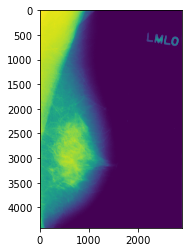

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H2> Model Findings - 'Both' benign abnormality were detected as Both/Mass malignant; possible due to lack of 'Both' benign images
<H3> 'Both' malignant abnormality were detected as Both/Mass malignant

<H3> Mass benign detected as Mass malignant; Calc malignant also high
<H3> Mass malignant detected as Mass malignant; sometimes with calc malignant

<H3> Calc malignant not detected sometimes; and sometimes as Calc benign
<H3> Calc benign detected as Calc benign





<H3> Given that shape of abnormality should have visible physical differences in determining benign/malignant, 
<H3> to retrain model to optimise multi label of abnormality with more accuracy


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 89888)            

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-02 07:18:22.700560
Train on 4517 samples, validate on 502 samples
Epoch 1/10
4517/4517 [==============================] - 554s 123ms/step - loss: 0.6190 - accuracy: 0.6544 - val_loss: 0.5669 - val_accuracy: 0.6977
Epoch 2/10
4517/4517 [==============================] - 517s 114ms/step - loss: 0.5663 - accuracy: 0.6843 - val_loss: 0.5410 - val_accuracy: 0.7052
Epoch 3/10
4517/4517 [==============================] - 494s 109ms/step - loss: 0.5460 - accuracy: 0.6947 - val_loss: 0.5359 - val_accuracy: 0.7047
Epoch 4/10
4517/4517 [==============================] - 498s 110ms/step - loss: 0.5374 - accuracy: 0.7007 - val_loss: 0.5341 - val_accuracy: 0.7211
Epoch 5/10
4517/4517 [==============================] - 496s 110ms/step - loss: 0.5232 - accuracy: 0.7151 - val_loss: 0.5296 - val_accuracy: 0.7191
Epoch 6/10
4517/4517 [==============================] - 501s 111ms/step - loss: 0.5085 - accuracy: 0.7230 - val_loss: 0.5226 - val_accuracy: 0.7067
Epoch 7/1

D1-0609 calcification, mass Benign D1-0609/07-18-2011-09664/1.000000-09049
Path = /home/wsuser/work/D1-0609/07-18-2011-09664/1.000000-09049
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [True, False, True, False]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test_arr = (2294, 1914)
Proba = [[2.7737700e-04 7.2823811e-01 1.4358413e-02 9.4310671e-01]]
1-3.dcm
img_test_arr = (2294, 1914)
Proba = [[0.02118995 0.5134422  0.3068331  0.5817383 ]]
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00273522 0.7036732  0.02635058 0.905309  ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00223027 0.65690416 0.01148105 0.9306025 ]]
D2-0158 calcification, mass Benign D2-0158/07-18-2010-04660/1.000000-72512
Path = /home/wsuser/work/D2-0158/07-18-2010-04660/1.000000-72512
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [True, False, True, False]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01

Proba = [[0.23567377 0.47727585 0.26896885 0.5533275 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01816782 0.50139505 0.05223735 0.23771751]]
D2-0394 mass Malignant D2-0394/07-18-2010-44636/1.000000-59309
Path = /home/wsuser/work/D2-0394/07-18-2010-44636/1.000000-59309
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, False, True]
['1-4.dcm', '1-3.dcm', '1-1.dcm', '1-2.dcm']
1-4.dcm
img_test_arr = (2294, 1914)
Proba = [[0.05487882 0.4903639  0.17649747 0.7032842 ]]
1-3.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01057901 0.42009687 0.19778211 0.74494183]]
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.01345563 0.49962988 0.07498131 0.7957167 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.00834264 0.26382837 0.15629277 0.81220394]]
D2-0395 mass Malignant D2-0395/07-18-2010-27452/1.000000-18787
Path = /home/wsuser/work/D2-0395/07-18-2010-27452/1.000000-18787
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, F

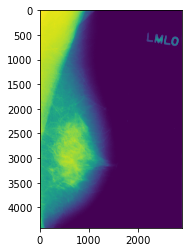

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H2> Model Findings
<H3> 'Both' benign abnormality were detected as Both/Mass malignant; possible due to lack of 'Both' benign images
<H3> 'Both' malignant abnormality were detected as Both/Mass malignant

<H3> Mass benign detected as Mass malignant; Calc malignant also high
<H3> Mass malignant detected as Mass malignant; sometimes with calc malignant

<H3> Calc malignant not detected sometimes; and sometimes as Calc benign
<H3> Calc benign detected as Calc benign



<H3> not working well; 
<H3> to drop the 'Both' abnormality type; could be causing engine lower accuracy



In [ ]:
# get imagesArr from above


#X_train, X_test, y_train, y_test = train_test_split(imagesArr[0:, 0], imagesArr[0:, 1], random_state=42, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(imagesArrTotal, imagesLabelTotal, random_state=42, test_size=0.1)


In [ ]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)       

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)

X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

In [ ]:
print(X_train.shape[0], X_test.shape[0])


3228 359


In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-05 06:40:28.101497
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 348s 108ms/step - loss: 0.5982 - accuracy: 0.7313 - val_loss: 0.5664 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 352s 109ms/step - loss: 0.5808 - accuracy: 0.7493 - val_loss: 0.5655 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 348s 108ms/step - loss: 0.5751 - accuracy: 0.7499 - val_loss: 0.5618 - val_accuracy: 0.7500
Epoch 4/10
3228/3228 [==============================] - 343s 106ms/step - loss: 0.5736 - accuracy: 0.7500 - val_loss: 0.5635 - val_accuracy: 0.7500
Epoch 5/10
3228/3228 [==============================] - 346s 107ms/step - loss: 0.5721 - accuracy: 0.7500 - val_loss: 0.5615 - val_accuracy: 0.7500
Epoch 6/10
3228/3228 [==============================] - 347s 108ms/step - loss: 0.5686 - accuracy: 0.7500 - val_loss: 0.5615 - val_accuracy: 0.7500
Epoch 7/1

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


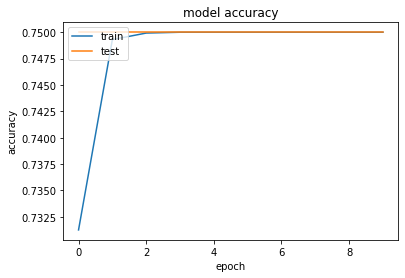

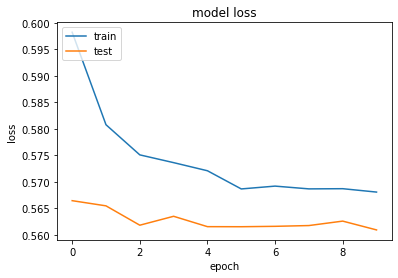

In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pydicom as dicom
import matplotlib.pylab as plt

img_size = 224


def TestImage(image_path):
    ds = dicom.dcmread(image_path)

    plt.imshow(ds.pixel_array)

    img_test_arr = ds.pixel_array
    print("img_test_arr = " + str(img_test_arr.shape))

    resized_arr_test = resize(img_test_arr, (img_size, img_size), anti_aliasing=True) # Reshaping images to preferred size
    resized_arr_test = resized_arr_test/255

    #plt.imshow(resized_arr_test)

    #imagesLabel[x]
    #proba = model.predict(resized_arr_test.reshape(1,img_size,img_size,1)) #grayscale
    proba = model.predict(resized_arr_test.reshape(1,img_size,img_size,1)) #grayscale
    
    return proba
    


D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.22052656 0.25430256 0.24701951 0.23616484]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.20446913 0.23838197 0.23080014 0.22037955]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.11635365 0.14880483 0.13872023 0.13209412]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.10093625 0.13186468 0.12189158 0.11601773]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

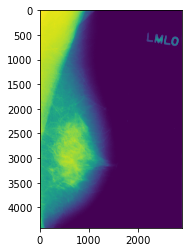

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H2> Save the model to object storage in ibm watson

In [ ]:
model_result_path = "keras_model_5.h5"
model.save(model_result_path)

In [ ]:
from ibm_botocore.client import Config

import ibm_boto3

# cos = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id=credentials['IBM_API_KEY_ID'],
#     ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
#     ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
#     config=Config(signature_version='oauth'),
#     endpoint_url=credentials['ENDPOINT'])


cos = client_784702db720341388d92bbeee9f05362 



In [ ]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-2f7736ba-4963-439f-b81c-0f1e6d6dff34',
    'IBM_API_KEY_ID': 'aUoeXFqCPMwiIzvajTL_OkAVUEZRo-xgrDeRsN0GYdZ4',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'default-donotdelete-pr-3nzgnkkp01amer',
    'FILE': 'CMMD_clinicaldata.csv'
}

In [ ]:
credentials_1['BUCKET']
model_result_path

'keras_model_4.h5'

In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos.upload_file(Filename='keras_model_5.h5', Bucket=credentials_1['BUCKET'], Key='keras_model_5.h5')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    
#upload pickle object
#cos.upload_file('GB_Classification_model.pkl', credentials['BUCKET'],'GB_Classification_model.pkl')

File Uploaded


In [ ]:
#delete model file
!rm -f 'keras_model_5.h5'


In [ ]:
#Download model file from object storage

try:
    cos.download_file(Filename='keras_model_5.h5', Bucket=credentials_1['BUCKET'], Key='keras_model_5.h5')
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')
    



File Downloaded


In [ ]:
!ls  | egrep '\.h5$'

keras_model_4.h5
keras_model_5.h5


<H2> Tweak the model parameters

In [ ]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 193600)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                12390464  
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-05 07:48:39.271807
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 157s 48ms/step - loss: 0.5886 - accuracy: 0.7337 - val_loss: 0.5484 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 155s 48ms/step - loss: 0.5478 - accuracy: 0.7475 - val_loss: 0.5175 - val_accuracy: 0.7437
Epoch 3/10
3228/3228 [==============================] - 155s 48ms/step - loss: 0.5299 - accuracy: 0.7499 - val_loss: 0.5117 - val_accuracy: 0.7493
Epoch 4/10
3228/3228 [==============================] - 153s 47ms/step - loss: 0.5197 - accuracy: 0.7530 - val_loss: 0.5055 - val_accuracy: 0.7563
Epoch 5/10
3228/3228 [==============================] - 156s 48ms/step - loss: 0.5129 - accuracy: 0.7556 - val_loss: 0.5039 - val_accuracy: 0.7563
Epoch 6/10
3228/3228 [==============================] - 163s 51ms/step - loss: 0.5069 - accuracy: 0.7570 - val_loss: 0.4979 - val_accuracy: 0.7521
Epoch 7/10
3228

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[1.000000e+00 8.997383e-04 0.000000e+00 0.000000e+00]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[1.0000000e+00 1.1578431e-05 0.0000000e+00 0.0000000e+00]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[1.000000e+00 8.592575e-29 0.000000e+00 0.000000e+00]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[1.0000000e+00 2.3116672e-26 0.0000000e+00 0.0000000e+00]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/0

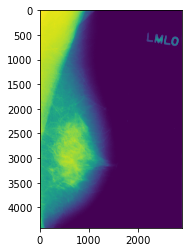

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

In [ ]:
model_result_path = "keras_model_6.h5"
model.save(model_result_path)

In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

model_result_path = "keras_model_6.h5"
model.save(model_result_path)

try:
    cos.upload_file(Filename='keras_model_6.h5', Bucket=credentials_1['BUCKET'], Key='keras_model_6.h5')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    
#upload pickle object
#cos.upload_file('GB_Classification_model.pkl', credentials['BUCKET'],'GB_Classification_model.pkl')

File Uploaded


<H3> Tweak model parameters to aim for higher accuracy > 0.80

In [ ]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 49, 49, 64)       

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-05 08:27:35.049679
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 431s 133ms/step - loss: 0.6004 - accuracy: 0.7312 - val_loss: 0.5697 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 431s 134ms/step - loss: 0.5781 - accuracy: 0.7489 - val_loss: 0.5638 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 424s 131ms/step - loss: 0.5768 - accuracy: 0.7499 - val_loss: 0.5634 - val_accuracy: 0.7500
Epoch 4/10
3228/3228 [==============================] - 423s 131ms/step - loss: 0.5738 - accuracy: 0.7499 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 5/10
3228/3228 [==============================] - 432s 134ms/step - loss: 0.5729 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 6/10
3228/3228 [==============================] - 428s 133ms/step - loss: 0.5716 - accuracy: 0.7500 - val_loss: 0.5639 - val_accuracy: 0.7500
Epoch 7/1

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.22646946 0.26659936 0.2621098  0.24968587]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.223147   0.26369187 0.25902736 0.24663341]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.2072688  0.24916795 0.24407955 0.23214526]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.20728888 0.2492163  0.24396954 0.23207009]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

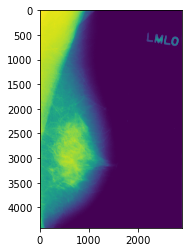

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H2> Model Review - still at 0.75 accuracy
<H3> Use Transfer learning; conv model somehow goes to only 0.75 accuracy

In [ ]:
# from keras.applications import VGG16

# # include top should be False to remove the softmax layer
# pretrained_model = VGG16(include_top=False, weights='imagenet')
# pretrained_model.summary()

In [ ]:
# from keras.utils import to_categorical

# # extract train and val features
# vgg_features_train = pretrained_model.predict(train)
# vgg_features_val = pretrained_model.predict(val)


In [ ]:
# # OHE target column
# train_target = to_categorical(train.labels)
# val_target = to_categorical(val.labels)


In [ ]:
# model2 = Sequential()

# model2.add(Flatten(input_shape=(224,224,1)))
# model2.add(Dense(100, activation='relu'))
# model2.add(Dropout(0.5))
# model2.add(BatchNormalization())
# model2.add(Dense(4, activation='softmax'))

# # compile the model
# model2.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# model2.summary()

# # train model using features generated from VGG16 model
# model2.fit(vgg_features_train, train_target, epochs=10, batch_size=64, validation_data=(vgg_features_val, val_target))


In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.layers import *

# img_size_target = 224
# img_input = Input(shape=(img_size_target, img_size_target, 1))
# img_conc = Concatenate()([img_input, img_input, img_input])  
# model = VGG16(input_tensor=img_conc)

In [ ]:
from keras.applications import VGG16
from keras.layers import *
from keras.models import Model

img_size_target = 224

img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
#vgg_model = VGG16(input_tensor=img_conc)

#vgg_model = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,1) )
vgg_model = VGG16(input_tensor=img_conc, include_top=True, weights='imagenet' )

x = Dense(128, activation='relu')(vgg_model.layers[-4].output) 
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='sigmoid')(x)

vgg_model=Model(vgg_model.input, x)




553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False
    

In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False

from keras.optimizers import adam

opt = adam(lr=0.0001, decay=1e-5)

vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='binary_crossentropy')

vgg_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_1[0][0]              
____________________________________________________________________________________________

In [ ]:
# # train model using features generated from VGG16 model
#history = vgg_model.fit(train, train_target, epochs=10, batch_size=64, validation_data=(vgg_features_val, val_target))
#history = vgg_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), class_weight={0:1.0, 1:0.4})

#history = vgg_model.fit_generator(X_train, y_train, epochs=10, steps_per_epoch=64, validation_data=(X_test, y_test))
history = vgg_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 1210s 375ms/step - loss: 0.6224 - accuracy: 0.6864 - val_loss: 0.5771 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 1214s 376ms/step - loss: 0.6078 - accuracy: 0.7082 - val_loss: 0.5722 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 1233s 382ms/step - loss: 0.6032 - accuracy: 0.7160 - val_loss: 0.5713 - val_accuracy: 0.7500
Epoch 4/10
3228/3228 [==============================] - 1216s 377ms/step - loss: 0.5999 - accuracy: 0.7252 - val_loss: 0.5739 - val_accuracy: 0.7500
Epoch 5/10
3228/3228 [==============================] - 1212s 376ms/step - loss: 0.5936 - accuracy: 0.7344 - val_loss: 0.5669 - val_accuracy: 0.7500
Epoch 6/10
3228/3228 [==============================] - 1222s 379ms/step - loss: 0.5907 - accuracy: 0.7357 - val_loss: 0.5661 - val_accuracy: 0.7500
Epoch 7/10
3228/3228 [==============================] - 121

In [ ]:

model = vgg_model

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.27929875 0.33222368 0.3158022  0.3121965 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.2838295  0.33722255 0.32091507 0.31722233]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.2962961  0.34712234 0.33468208 0.33003724]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.3047422  0.35200202 0.34464446 0.3365366 ]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

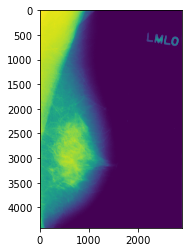

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# model.compile( loss = "categorical_crossentropy", 
#                optimizer = sgd, 
#                metrics=['accuracy']
#              )


# val_accuracy found local minimum; One common local minimum is to always predict the class with the most number of data points.
# You should use weighting on the classes to avoid this minimum.

# from sklearn.utils import compute_class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)

# classWeight = compute_class_weight('balanced', outputLabels, outputs) 
# classWeight = dict(enumerate(classWeight))
# model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs, show_accuracy = True, verbose = 2, validation_data = (X_test, y_test), class_weight=classWeight)


In [ ]:
# model progressive training 

# for epoch in range(20):
#     for path in ['xaa', 'xab', 'xac', 'xad']:
#         x_train, y_train = prepare_data(path)
#         model.fit(x_train, y_train, batch_size=50, epochs=epoch+1, initial_epoch=epoch, shuffle=True)

<H2 Retrain with balanced class weights to avoid local minimum>

<H3> Using VGG16, model maintains 0.75 accuracy; try other parameters

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)       

In [ ]:
#np.unique(y_train)

np.unique(['Calc-Benign', 'Calc-Malignant', 'Mass-Benign', 'Mass-Malignant'])


array(['Calc-Benign', 'Calc-Malignant', 'Mass-Benign', 'Mass-Malignant'],
      dtype='<U14')

In [ ]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

<H3> Using classWeights to handle imbalance class images

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight

classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)

[0.60220661 0.52438164 0.57602583 ... 0.57602583 0.57602583 0.68764012]


In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight

#class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

#classLabels = np.array(['Calc-Benign', 'Calc-Malignant', 'Mass-Benign', 'Mass-Malignant'])

#classWeight = compute_class_weight('balanced', classLabels, y_train) 
#classWeight = dict(enumerate(classWeight))

classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))


Model training time starts = 2021-06-06 06:48:25.262873
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 413s 128ms/step - loss: 0.5981 - accuracy: 0.7280 - val_loss: 0.5696 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 405s 126ms/step - loss: 0.5793 - accuracy: 0.7491 - val_loss: 0.5617 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 410s 127ms/step - loss: 0.5775 - accuracy: 0.7501 - val_loss: 0.5629 - val_accuracy: 0.7500
Epoch 4/10
3228/3228 [==============================] - 405s 126ms/step - loss: 0.5729 - accuracy: 0.7499 - val_loss: 0.5629 - val_accuracy: 0.7500
Epoch 5/10
3228/3228 [==============================] - 408s 126ms/step - loss: 0.5740 - accuracy: 0.7500 - val_loss: 0.5635 - val_accuracy: 0.7500
Epoch 6/10
3228/3228 [==============================] - 407s 126ms/step - loss: 0.5712 - accuracy: 0.7500 - val_loss: 0.5611 - val_accuracy: 0.7500
Epoch 7/1

KeyboardInterrupt: 

<H3> Model training manually stopped as val_accuracy stays at 0.75

In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

In [ ]:
# round 2 - 'Both' cases to add on

imagesArrTotal_Both = imagesArrTotal
imagesLabelTotal_Both = imagesLabelTotal


In [ ]:
print(imagesArrTotal_Both.shape, imagesLabelTotal_Both.shape)

(1432, 224, 224) (1432, 4)


<H3> Save the images array - to work across multiple sessions

In [ ]:
# save the image array for multiple session

from numpy import asarray
from numpy import savez_compressed

# save to npy file
savez_compressed('imagesArrTotal.npz', a=imagesArrTotal)
print('imagesArrTotal.npz saved')

savez_compressed('imagesLabelTotal.npz', a=imagesLabelTotal)
print('imagesLabelTotal.npz saved')




imagesArrTotal.npz saved
imagesLabelTotal.npz saved


In [ ]:
#round 2 - 'Both' cases

# save the image array for multiple session

from numpy import asarray
from numpy import savez_compressed

# save to npy file
savez_compressed('imagesArrTotal_Both.npz', a=imagesArrTotal)
print('imagesArrTotal_Both.npz saved')

savez_compressed('imagesLabelTotal_Both.npz', a=imagesLabelTotal)
print('imagesLabelTotal_Both.npz saved')

imagesArrTotal_Both.npz saved
imagesLabelTotal_Both.npz saved


In [ ]:
#round 2 - All cases

# save the image array for multiple session

from numpy import asarray
from numpy import savez_compressed

# save to npy file
savez_compressed('imagesArrTotal_All.npz', a=imagesArrTotal)
print('imagesArrTotal_All.npz saved')

savez_compressed('imagesLabelTotal_All.npz', a=imagesLabelTotal)
print('imagesLabelTotal_All.npz saved')

imagesArrTotal_All.npz saved
imagesLabelTotal_All.npz saved


In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos2.upload_file(Filename='imagesArrTotal.npz', Bucket=credentials_2['BUCKET'], Key='imagesArrTotal.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    
#upload pickle object
#cos.upload_file('GB_Classification_model.pkl', credentials['BUCKET'],'GB_Classification_model.pkl')

File Uploaded


In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos2.upload_file(Filename='imagesLabelTotal.npz', Bucket=credentials_2['BUCKET'], Key='imagesLabelTotal.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    


File Uploaded


In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos.upload_file(Filename='imagesArrTotal_Both.npz', Bucket=credentials_1['BUCKET'], Key='imagesArrTotal_Both.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    

try:
    cos.upload_file(Filename='imagesLabelTotal_Both.npz', Bucket=credentials_1['BUCKET'], Key='imagesLabelTotal_Both.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')    

File Uploaded
File Uploaded


In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos.upload_file(Filename='imagesArrTotal_All.npz', Bucket=credentials_2['BUCKET'], Key='imagesArrTotal_All.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    

try:
    cos.upload_file(Filename='imagesLabelTotal_All.npz', Bucket=credentials_2['BUCKET'], Key='imagesLabelTotal_All.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

File Uploaded
File Uploaded


In [ ]:
!ls *.npz

imagesArrTotal_All.npz	imagesLabelTotal_All.npz


In [ ]:
!rm -f *.npz

In [2]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-8857261f-8b99-46e1-ba09-4e3f2a7dac14',
    'IBM_API_KEY_ID': 'b6x1_EWKFickSyHLJnmnapodF3xat2aNROqEfQqUQ12x',
    'ENDPOINT': 'https://s3.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'ibmcourse-donotdelete-pr-6b7m5a3r1li9xt',
    'FILE': 'keras_model_i10015_64_64_4.h5'
}


In [3]:
from ibm_botocore.client import Config
import ibm_boto3

cos3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials_3['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials_3['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials_3['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials_3['ENDPOINT'])


In [4]:
#Download model file from object storage

try:
    cos3.download_file(Filename='imagesArrTotal.npz', Bucket=credentials_3['BUCKET'], Key='imagesArrTotal.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')

File Downloaded


In [5]:
#Download model file from object storage

try:
    cos3.download_file(Filename='imagesLabelTotal.npz', Bucket=credentials_3['BUCKET'], Key='imagesLabelTotal.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')

File Downloaded


In [ ]:

try:
    cos3.download_file(Filename='imagesArrTotal_All.npz', Bucket=credentials_3['BUCKET'], Key='imagesArrTotal_All.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')
    
    
try:
    cos3.download_file(Filename='imagesLabelTotal_All.npz', Bucket=credentials_3['BUCKET'], Key='imagesLabelTotal_All.npz')
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')
    
    

File Downloaded
File Downloaded


In [ ]:
# load the image array for multiple session

from numpy import load
import numpy as np

# load dict of arrays
file1 = np.load('imagesArrTotal_All.npz')
file2 = np.load('imagesLabelTotal_All.npz')

#data_dict = dict(file1)

#data_dict['a']

imagesArrTotal = file1['a']
imagesLabelTotal = file2['a']


#print(imagesArrTotal2.shape(), imagesLabelTotal2.shape())


<H3> Loading of image array across multiple sessions 

In [6]:
# load the image array for multiple session -without 'Both' cases

from numpy import load
import numpy as np

# load dict of arrays
file1 = np.load('imagesArrTotal.npz')
file2 = np.load('imagesLabelTotal.npz')

#file1 = np.load('/content/drive/MyDrive/imagesArrTotal.npz')
#file2 = np.load('/content/drive/MyDrive/imagesLabelTotal.npz')

#data_dict = dict(file1)

#data_dict['a']

imagesArrTotal = file1['a']
imagesLabelTotal = file2['a']

In [7]:
print(imagesArrTotal.shape, imagesLabelTotal.shape)

(3587, 224, 224) (3587, 4)


In [ ]:
# round 2

In [ ]:
print(imagesArrTotal_Both.shape, imagesLabelTotal_Both.shape)

(1432, 224, 224) (1432, 4)


In [ ]:
imagesArrTotal = np.concatenate((imagesArrTotal, imagesArrTotal_Both))
imagesLabelTotal = np.concatenate((imagesLabelTotal, imagesLabelTotal_Both))

In [ ]:
print(imagesArrTotal.shape, imagesLabelTotal.shape)

(3587, 224, 224) (3587, 4)


<H3> Split image array into training and testing set

In [8]:
# get imagesArr from above


#X_train, X_test, y_train, y_test = train_test_split(imagesArr[0:, 0], imagesArr[0:, 1], random_state=42, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(imagesArrTotal, imagesLabelTotal, random_state=68, test_size=0.2, stratify=imagesLabelTotal)

# for after model manual testing
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=68, test_size=0.1)

#X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)

#X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)


<H2> Model Training Phase (Continue) 
<H3> Use transfer learning from VGG16

In [ ]:
# use vgg16 transfer learning, similar as above
# run the model definition from above

history = vgg_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), class_weight=classWeight)

Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 1039s 322ms/step - loss: 0.6363 - accuracy: 0.6810 - val_loss: 0.5799 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 1062s 329ms/step - loss: 0.6123 - accuracy: 0.7075 - val_loss: 0.5706 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 1014s 314ms/step - loss: 0.6017 - accuracy: 0.7217 - val_loss: 0.5707 - val_accuracy: 0.7500
Epoch 4/10
3228/3228 [==============================] - 1021s 316ms/step - loss: 0.5985 - accuracy: 0.7217 - val_loss: 0.5728 - val_accuracy: 0.7500
Epoch 5/10
3228/3228 [==============================] - 1024s 317ms/step - loss: 0.5973 - accuracy: 0.7313 - val_loss: 0.5680 - val_accuracy: 0.7500
Epoch 6/10
3228/3228 [==============================] - 1020s 316ms/step - loss: 0.5964 - accuracy: 0.7299 - val_loss: 0.5670 - val_accuracy: 0.7500
Epoch 7/10
3228/3228 [==============================] - 101

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.265087   0.28370857 0.28376633 0.26821217]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.26509422 0.28372175 0.28377482 0.26822358]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.26520795 0.2838057  0.28388932 0.2683285 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.26526126 0.28385666 0.28393412 0.26837423]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

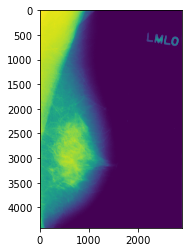

In [ ]:
#model = vgg_model

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))


In [ ]:
# still val_accuracy 0.75; to change dropout to 0.25 or 0.1

# model.add(Dense(12))
# model.add(Activation('relu'))




In [ ]:
# save the model
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-85f798bf-ed49-4371-827e-4d60d8dcd9f6',
    'IBM_API_KEY_ID': 'RLXBUlzeyNfd3FDg977IN4lf-qPLxqdWXbNXCJdRAF9h',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'ibmcourse-donotdelete-pr-10kkmcsdsp1mva',
    'FILE': 'CBIS-DDSM-All-00183.7z'
}


In [ ]:
from ibm_botocore.client import Config
import ibm_boto3

cos2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials_2['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials_2['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials_2['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials_2['ENDPOINT'])

In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

model_result_path = "keras_model_vgg_2.h5"
model.save(model_result_path)

try:
    cos.upload_file(Filename='keras_model_vgg_2.h5', Bucket=credentials_2['BUCKET'], Key='keras_model_vgg_2.h5')
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')
    
#upload pickle object
#cos.upload_file('GB_Classification_model.pkl', credentials['BUCKET'],'GB_Classification_model.pkl')

File Uploaded


In [ ]:
!ls *.h5

ls: cannot access '*.h5': No such file or directory


In [ ]:
try:
    cos.download_file(Filename='keras_model_vgg_2.h5', Bucket=credentials_2['BUCKET'], Key='keras_model_vgg_2.h5')
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')

File Downloaded


In [ ]:
# load model
from keras.models import load_model

model_result_path = "keras_model_vgg_2.h5"
model = load_model(model_result_path)

<H3> Try other model parameters

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 193600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12390464  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 12,391,140
Trainable params: 12,391,140
Non-trainable params: 0
__________________________________________

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight

#class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

#classLabels = np.array(['Calc-Benign', 'Calc-Malignant', 'Mass-Benign', 'Mass-Malignant'])

#classWeight = compute_class_weight('balanced', classLabels, y_train) 
#classWeight = dict(enumerate(classWeight))

classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.60220661 0.52438164 0.57602583 ... 0.57602583 0.57602583 0.68764012]
Model training time starts = 2021-06-07 02:21:59.468803
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 152s 47ms/step - loss: 0.5823 - accuracy: 0.7428 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 148s 46ms/step - loss: 0.5400 - accuracy: 0.7470 - val_loss: 0.5060 - val_accuracy: 0.7611
Epoch 3/10
3228/3228 [==============================] - 144s 45ms/step - loss: 0.5203 - accuracy: 0.7535 - val_loss: 0.4944 - val_accuracy: 0.7646
Epoch 4/10
3228/3228 [==============================] - 148s 46ms/step - loss: 0.5139 - accuracy: 0.7556 - val_loss: 0.4932 - val_accuracy: 0.7632
Epoch 5/10
2944/3228 [==========================>...] - ETA: 12s - loss: 0.5044 - accuracy: 0.7537

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.03383517 0.21955624 0.36165532 0.3685934 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.03521258 0.2190233  0.37469015 0.3507545 ]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.13601843 0.2544018  0.35543105 0.36738914]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.12862721 0.23674996 0.26827556 0.42504457]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

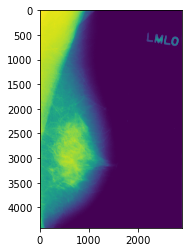

In [ ]:
#model = vgg_model

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

In [ ]:
!ls *.h5

keras_model_simplify_1.h5  keras_model_vgg_2.h5


In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

model_result_path = "keras_model_simplify_1.h5"
model.save(model_result_path)

try:
    cos.upload_file(Filename=model_result_path, Bucket=credentials_2['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

In [ ]:
#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

model_result_path = "keras_model_simplify_1.h5"
model.save(model_result_path)

try:
    cos.download_file(Filename=model_result_path, Bucket=credentials_2['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')

<H3> Test different parameters

In [ ]:
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                25233472  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-07 03:53:20.303780
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 379s 117ms/step - loss: 0.5815 - accuracy: 0.7144 - val_loss: 0.6556 - val_accuracy: 0.7291
Epoch 2/10
3228/3228 [==============================] - 371s 115ms/step - loss: 0.5872 - accuracy: 0.7107 - val_loss: 0.6087 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 371s 115ms/step - loss: 0.5614 - accuracy: 0.7292 - val_loss: 0.5876 - val_accuracy: 0.7500
Epoch 4/10
3228/3228 [==============================] - 374s 116ms/step - loss: 0.5469 - accuracy: 0.7467 - val_loss: 0.5590 - val_accuracy: 0.7500
Epoch 5/10
  64/3228 [..............................] - ETA: 5:54 - loss: 0.5123 - accuracy: 0.7617

KeyboardInterrupt: 

In [ ]:

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H3> Test different parameters

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                5972032   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-07 04:43:13.467519
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 196s 61ms/step - loss: 0.5968 - accuracy: 0.7314 - val_loss: 0.5666 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 195s 60ms/step - loss: 0.5833 - accuracy: 0.7472 - val_loss: 0.5671 - val_accuracy: 0.7500
Epoch 3/10
1536/3228 [=============>................] - ETA: 1:39 - loss: 0.5810 - accuracy: 0.7485

KeyboardInterrupt: 

<H3> Test different parameters

In [ ]:
from keras.layers import Activation

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                12616768  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-07 04:55:48.997773
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 144s 45ms/step - loss: 0.5824 - accuracy: 0.7426 - val_loss: 0.5560 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 141s 44ms/step - loss: 0.5603 - accuracy: 0.7500 - val_loss: 0.5475 - val_accuracy: 0.7500
Epoch 3/10
3228/3228 [==============================] - 138s 43ms/step - loss: 0.5412 - accuracy: 0.7505 - val_loss: 0.5180 - val_accuracy: 0.7528
Epoch 4/10
3228/3228 [==============================] - 140s 43ms/step - loss: 0.5240 - accuracy: 0.7513 - val_loss: 0.5015 - val_accuracy: 0.7611
Epoch 5/10
3228/3228 [==============================] - 139s 43ms/step - loss: 0.5155 - accuracy: 0.7510 - val_loss: 0.4994 - val_accuracy: 0.7660
Epoch 6/10
3228/3228 [==============================] - 144s 44ms/step - loss: 0.5116 - accuracy: 0.7528 - val_loss: 0.4960 - val_accuracy: 0.7695
Epoch 7/10
3228

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.03701284 0.21635933 0.37357488 0.3862298 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.0403599  0.22137854 0.37937486 0.38095203]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.14997761 0.28088632 0.2974152  0.31666693]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.18178786 0.29678798 0.23401463 0.29951528]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

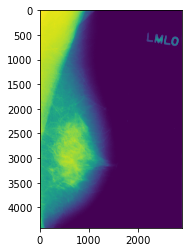

In [ ]:

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

In [ ]:
<H3> Test different parameters

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.summary()

opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                12616768  
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)               

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-07 05:26:01.259882
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 138s 43ms/step - loss: 0.5903 - accuracy: 0.7340 - val_loss: 0.5521 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 138s 43ms/step - loss: 0.5583 - accuracy: 0.7457 - val_loss: 0.5283 - val_accuracy: 0.7604
Epoch 3/10
3228/3228 [==============================] - 139s 43ms/step - loss: 0.5385 - accuracy: 0.7484 - val_loss: 0.5098 - val_accuracy: 0.7674
Epoch 4/10
3228/3228 [==============================] - 140s 44ms/step - loss: 0.5282 - accuracy: 0.7498 - val_loss: 0.5004 - val_accuracy: 0.7611
Epoch 5/10
3228/3228 [==============================] - 138s 43ms/step - loss: 0.5180 - accuracy: 0.7529 - val_loss: 0.5015 - val_accuracy: 0.7618
Epoch 6/10
3228/3228 [==============================] - 141s 44ms/step - loss: 0.5132 - accuracy: 0.7526 - val_loss: 0.4909 - val_accuracy: 0.7653
Epoch 7/10
3228

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.07468427 0.24418266 0.34831044 0.35864636]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.08062373 0.2479673  0.355815   0.35140005]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.2778548  0.2729172  0.23171009 0.2436346 ]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.28257853 0.27477187 0.18773495 0.25046554]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

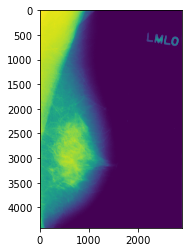

In [ ]:

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H3> Test different parameters

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 197136)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                6308384   
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)               

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-07 05:52:02.840368
Train on 3228 samples, validate on 359 samples
Epoch 1/10
3228/3228 [==============================] - 137s 43ms/step - loss: 0.5832 - accuracy: 0.7351 - val_loss: 0.5512 - val_accuracy: 0.7500
Epoch 2/10
3228/3228 [==============================] - 136s 42ms/step - loss: 0.5525 - accuracy: 0.7470 - val_loss: 0.5223 - val_accuracy: 0.7584
Epoch 3/10
3228/3228 [==============================] - 137s 43ms/step - loss: 0.5281 - accuracy: 0.7510 - val_loss: 0.5137 - val_accuracy: 0.7591
Epoch 4/10
3228/3228 [==============================] - 137s 43ms/step - loss: 0.5181 - accuracy: 0.7528 - val_loss: 0.5039 - val_accuracy: 0.7695
Epoch 5/10
3228/3228 [==============================] - 139s 43ms/step - loss: 0.5169 - accuracy: 0.7524 - val_loss: 0.4968 - val_accuracy: 0.7632
Epoch 6/10
3228/3228 [==============================] - 149s 46ms/step - loss: 0.5039 - accuracy: 0.7560 - val_loss: 0.4935 - val_accuracy: 0.7597
Epoch 7/10
3228

D1-1017 mass Benign D1-1017/07-18-2011-06182/1.000000-97117
Path = /home/wsuser/work/D1-1017/07-18-2011-06182/1.000000-97117
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.08411104 0.26421228 0.38028038 0.37924165]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.09400845 0.2648897  0.38082144 0.34961843]]
D1-1018 mass Benign D1-1018/07-18-2011-93273/1.000000-30971
Path = /home/wsuser/work/D1-1018/07-18-2011-93273/1.000000-30971
Class = Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant
Label = [False, False, True, False]
['1-1.dcm', '1-2.dcm']
1-1.dcm
img_test_arr = (2294, 1914)
Proba = [[0.35465214 0.29394615 0.20199554 0.18247995]]
1-2.dcm
img_test_arr = (2294, 1914)
Proba = [[0.31758517 0.3167707  0.11986961 0.1993255 ]]
D1-1019 mass Benign D1-1019/07-18-2011-44324/1.000000-52073
Path = /home/wsuser/work/D1-1019/07-18-2011-44324/1.000000-52073
Class = C

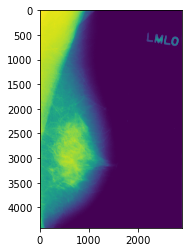

In [ ]:

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H3> Test different parameters

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-07 06:18:25.450821
Train on 3228 samples, validate on 359 samples
Epoch 1/20
3228/3228 [==============================] - 248s 77ms/step - loss: 0.4945 - accuracy: 0.7603 - val_loss: 0.4995 - val_accuracy: 0.7604
Epoch 2/20
3228/3228 [==============================] - 244s 75ms/step - loss: 0.4894 - accuracy: 0.7603 - val_loss: 0.4885 - val_accuracy: 0.7604
Epoch 3/20
3228/3228 [==============================] - 251s 78ms/step - loss: 0.4860 - accuracy: 0.7608 - val_loss: 0.4820 - val_accuracy: 0.7660
Epoch 4/20
3228/3228 [==============================] - 250s 77ms/step - loss: 0.4829 - accuracy: 0.7598 - val_loss: 0.4814 - val_accuracy: 0.7632
Epoch 5/20
3228/3228 [==============================] - 247s 77ms/step - loss: 0.4818 - accuracy: 0.7618 - val_loss: 0.4842 - val_accuracy: 0.7597
Epoch 6/20
3228/3228 [==============================] - 246s 76ms/step - loss: 0.4779 - accuracy: 0.7632 - val_loss: 0.4819 - val_accuracy: 0.7681
Epoch 7/20
3228

In [ ]:

totalTest = Test_data(os.getcwd(), df_CMMD_CBIS_AllType_Images_Test)

print("Total Test done = " + str(totalTest))

<H2> Model Review - accuracy stays less than 0.80
    <H3> Try data augmentation for increasing model accuracy; as medical images are typically imbalance

<H2> Data Augementation Phase 
<H3> to increase shortfall in images

Number of Calc-Benign images = 648
Number of Calc-Malignant images = 778
Number of Mass-Benign images = 734
Number of Mass-Malignant images = 709
Number of Both-Benign images = 0
Number of Both-Malignant images = 0


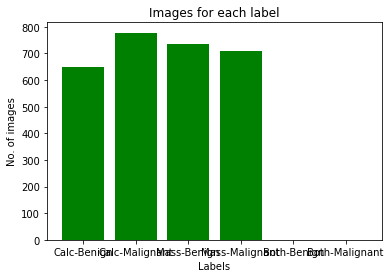

In [9]:
# checking the number of images of each class

a = 0
b = 0
c = 0
d = 0
e = 0
f = 0



for label in y_train:
    if np.array_equal(label, [1, 0, 0, 0]):
        a += 1
    if np.array_equal(label, [0, 1, 0, 0]):
        b += 1
    if np.array_equal(label, [0, 0, 1, 0]):
        c += 1
    if np.array_equal(label, [0, 0, 0, 1]):
        d += 1
    if np.array_equal(label, [1, 0, 1, 0]):
        e += 1
    if np.array_equal(label, [0, 1, 0, 1]):
        f += 1
        

        
print (f'Number of Calc-Benign images = {a}')
print (f'Number of Calc-Malignant images = {b}')
print (f'Number of Mass-Benign images = {c}')
print (f'Number of Mass-Malignant images = {d}')
print (f'Number of Both-Benign images = {e}')
print (f'Number of Both-Malignant images = {f}')




# plotting the data
labels = ['Calc-Benign', 'Calc-Malignant', 'Mass-Benign', 'Mass-Malignant', 'Both-Benign', 'Both-Malignant']

xe = [i for i, _ in enumerate(labels)]

numbers = [a,b,c,d,e,f]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")


plt.xticks(xe, labels)

plt.show()

In [10]:
#!apt-get install python3-OpenCV
#!pip install opencv-python

#import cv2
from skimage.util import random_noise
from skimage import img_as_ubyte
from skimage.transform import rotate
import numpy as np
from skimage import exposure
from skimage import util
from skimage.transform import rescale
from skimage.filters import sobel_h


# def rotate_images(image, scale =1.0, h=256, w = 256):
    
#     center = (h/2,w/2)
    
#     angle = random.randint(-25,25)
#     M = cv.getRotationMatrix2D(center, angle, scale)
#     rotated = cv.warpAffine(image, M, (h,w))
#     return rotated

def flip_LR (image):    
    flipped = np.fliplr(image)
    return flipped


def flip_UD (image):    
    flipped = np.flipud(image)
    return flipped


def rotate_(image, degreeN):
    # clockwise rotation
    rotate_image = rotate(image, angle=degreeN) 
    return rotate_image


def brightChange(image, gammaa):
    #
    image_bright = exposure.adjust_gamma(image, gamma=gammaa,gain=1)
    #image_bright = adjust_gamma(image, gamma=0.5,gain=1)
    #image_dark = adjust_gamma(image, gamma=2,gain=1)
    return image_bright


def scale_down(image, byScale):
    #image_resized = resize(image, (image.shape[0] // byScale, image.shape[1] // byScale), anti_aliasing=True)
    #scale_out = skimage.transform.rescale(img, scale=2.0, mode='constant')
    #scale_in = skimage.transform.rescale(img, scale=0.5, mode='constant')
    image_rescaled = rescale(image, 1.0 / byScale)
    return image_rescaled


def contrastChange(image):
    v_min, v_max = np.percentile(image, (0.2, 99.8))
    better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
    return better_contrast

    #show_images(original_image, better_contrast, 'Rescale intensity')


def invertColor(image):
    color_inversion_image = util.invert(image)
    #show_images(original_image, color_inversion_image, "Inversion")
    return color_inversion_image

    # NOte : this can be simply done with numpy

   # color_inversion_image_with_np = np.invert(original_image)
    #show_images(original_image, color_inversion_image_with_np, "Numpy inversion")


def filter_sobelh(image):
    #image_sobelh = sobel_h(image)
    image_sobelh = sobel(image)
    return image_sobelh


# def translation (image):
    
#     x= random.randint(-50,50)
#     y = random.randint(-50,50)
#     rows,cols,z = image.shape
#     M = np.float32([[1,0,x],[0,1,y]])
#     translate = cv.warpAffine(image,M,(cols,rows))
    
#     return translate


# def blur (image):
    
#     x = random.randrange(1,5,2)
#     blur = cv.GaussianBlur(image,(x,x),cv.BORDER_DEFAULT)
#     return blur

def blur (image):
    
    noisy_image= img_as_ubyte(random_noise(image))
    #noisy_image = random_noise(image, mode='gaussian', seed=None, clip=True)
    #noisy_image = random_noise(image, mode='s&p', seed=None, clip=True)
    return noisy_image


# #TensorFlow. 'x' = A placeholder for an image.
# shape = [height, width, channels]
# x = tf.placeholder(dtype = tf.float32, shape = shape)
# # Adding Gaussian noise
# noise = tf.random_normal(shape=tf.shape(x), mean=0.0, stddev=1.0,
# dtype=tf.float32)
# output = tf.add(x, noise)


[0. 0. 1. 0.]


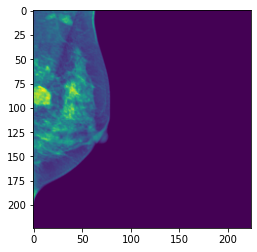

In [11]:
plt.imshow(X_train[38])
print(y_train[38])



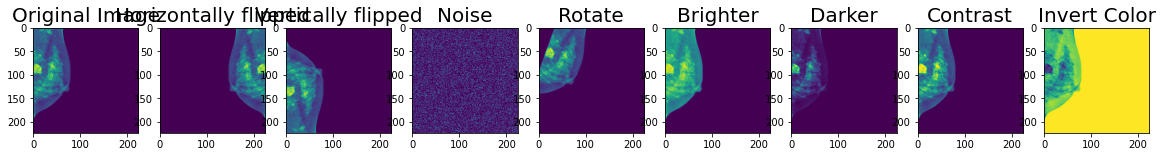

In [12]:
image = X_train[38]

hflipped_image= flip_LR(image) #fliplr reverse the order of columns of pixels in matrix

#Vertically flipped
vflipped_image= flip_UD(image) #flipud reverse the order of rows of pixels in matrix

noisy_image = blur(image)

rotaImage = rotate_(image, -20)

bright_Image = brightChange(image, 0.5) # brightens
dark_Image = brightChange(image, 2) # darkens

#scale_image = scale_down(image, 2)

contrast_image = contrastChange(image)

invColor_image = invertColor(image)

#sobelh_image = filter_sobelh(image)


import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=1,ncols=9,figsize=(20,16))

ax[0].imshow(image)
ax[0].set_title("Original Image", size=20)
ax[1].imshow(hflipped_image)
ax[1].set_title("Horizontally flipped", size=20)
ax[2].imshow(vflipped_image)
ax[2].set_title("Vertically flipped", size=20);
ax[3].imshow(noisy_image)
ax[3].set_title("Noise", size=20);
ax[4].imshow(rotaImage)
ax[4].set_title("Rotate", size=20);
ax[5].imshow(bright_Image)
ax[5].set_title("Brighter", size=20);
ax[6].imshow(dark_Image)
ax[6].set_title("Darker", size=20);
#ax[7].imshow(scale_Image)
#ax[7].set_title("Scale Down", size=20);
ax[7].imshow(contrast_image)
ax[7].set_title("Contrast", size=20);
ax[8].imshow(invColor_image)
ax[8].set_title("Invert Color", size=20);
#ax[10].imshow(sobelh_Image)
#ax[10].set_title("SobelH", size=20);


In [ ]:
print (f'Number of Calc-Benign images = {a}')
print (f'Number of Calc-Malignant images = {b}')
print (f'Number of Mass-Benign images = {c}')
print (f'Number of Mass-Malignant images = {d}')
print (f'Number of Both-Benign images = {e}')
print (f'Number of Both-Malignant images = {f}')


Number of Calc-Benign images = 738
Number of Calc-Malignant images = 878
Number of Mass-Benign images = 809
Number of Mass-Malignant images = 798
Number of Both-Benign images = 185
Number of Both-Malignant images = 1109


In [13]:

def AddAugmentImage(imagesTemp, labelsTemp, image, doFlip=True):
    numAug = 0
    
    #add image augment
    if doFlip == True:
        imagesTemp.append(flip_LR(image) )
        labelsTemp.append(label)
        numAug += 1
        
        #imagesTemp.append(flip_UD(image) )
        #labelsTemp.append(label)
        #numAug += 1
        
    imagesTemp.append(brightChange(image, 0.5) )
    labelsTemp.append(label)
    numAug += 1
    
   # imagesTemp.append(brightChange(image, 2) )
   # labelsTemp.append(label)            
    
    imagesTemp.append(contrastChange(image) )
    labelsTemp.append(label)            
    numAug += 1
    
    imagesTemp.append(invertColor(image) )
    labelsTemp.append(label)
    numAug += 1
    
    return numAug
    


In [14]:
targetTotal = 2500

aDiff = targetTotal - a
bDiff = targetTotal - b
cDiff = targetTotal - c
dDiff = targetTotal - d
eDifff = targetTotal - e
fDifff = targetTotal - f

aTot = a
bTot = b
cTot = c
dTot = d
eTot = e
fTot = f

print(targetTotal, "- a", a, aDiff, " b ", b, bDiff, " c ", c, cDiff, " d ", d, dDiff, " e ", e, eDifff, " f ", f, fDifff )



imagesTemp = []
labelsTemp = []

idx = 0
for label in y_train:
    print(idx, label)
    
    if np.array_equal(label, [1, 0, 0, 0]):
        if aDiff > 0:
            image = X_train[idx]
            numA = AddAugmentImage(imagesTemp, labelsTemp, image, False)
                                            
            image = flip_LR(X_train[idx])
            numB = AddAugmentImage(imagesTemp, labelsTemp, image, False)
            
            image = flip_UD(X_train[idx])
            numE = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            numC = numA + numB + numE

            aDiff = aDiff - numC
            aTot = aTot + numC
            
            print (label , " added ", numC, " augment ", aTot, aDiff)
            
    if np.array_equal(label, [0, 1, 0, 0]):
        if bDiff > 0:
            #add image augment
            image = X_train[idx]
            numA = AddAugmentImage(imagesTemp, labelsTemp, image, False)  

            image = flip_LR(X_train[idx])
            numB = AddAugmentImage(imagesTemp, labelsTemp, image, False)
            
            image = flip_UD(X_train[idx])
            numE = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            numC = numA + numB + numE            

                
            bDiff = bDiff - numC
            bTot = bTot + numC
            
            print (label , " added ", numC, " augment ", bTot, bDiff)
            
    if np.array_equal(label, [0, 0, 1, 0]):
        if cDiff > 0:
            #add image augment
            image = X_train[idx]
            numA = AddAugmentImage(imagesTemp, labelsTemp, image, False)   
            
            image = flip_LR(X_train[idx])
            numB = AddAugmentImage(imagesTemp, labelsTemp, image, False)            

            image = flip_UD(X_train[idx])
            numE = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            numC = numA + numB + numE
                
            cDiff = cDiff - numC
            cTot = cTot + numC
            
            print (label , " added ", numC, " augment ", cTot, cDiff)
            
    if np.array_equal(label, [0, 0, 0, 1]):
        if dDiff > 0:
            #add image augment
            image = X_train[idx]
            numA = AddAugmentImage(imagesTemp, labelsTemp, image, False)    
            
            image = flip_LR(X_train[idx])
            numB = AddAugmentImage(imagesTemp, labelsTemp, image, False)            

            image = flip_UD(X_train[idx])
            numE = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            numC = numA + numB + numE
                
            dDiff = dDiff - numC
            dTot = dTot + numC
            
            print (label, " added ", numC, " augment ", dTot, dDiff)
            
    if np.array_equal(label, [1, 0, 1, 0]):
        if eDifff > 0:
            #add image augment
            image = X_train[idx]
            numA = AddAugmentImage(imagesTemp, labelsTemp, image, False)
            
            image = flip_LR(X_train[idx])
            numB = AddAugmentImage(imagesTemp, labelsTemp, image, False)            

            #image = flip_UD(X_train[idx])
            #numE = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            numC = numA + numB #+ numE
            
            #image = flip_LR(X_train[idx])
            #AddAugmentImage(imagesTemp, labelsTemp, image, False)
            
            #image = flip_UD(X_train[idx])
            #AddAugmentImage(imagesTemp, labelsTemp, image, False)
            
            #imagesTemp.append(rotate_(image, -10) )
            #labelsTemp.append(label)
            #imagesTemp.append(rotate_(image, 10) )
            #labelsTemp.append(label) 

            #imagesTemp.append(rotate_(image, -20) )
            #labelsTemp.append(label)
            #imagesTemp.append(rotate_(image, 20) )
            #labelsTemp.append(label) 
            
            
            eDifff = eDifff - numC
            eTot = eTot + numC
            
            print (label , " added ", numC, " augment ", eTot, eDifff)
            
    if np.array_equal(label, [0, 1, 0, 1]):
        if fDifff > 0:
            #add image augment
            image = X_train[idx]
            numA = AddAugmentImage(imagesTemp, labelsTemp, image, False)  
            
            image = flip_LR(X_train[idx])
            numB = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            #image = flip_UD(X_train[idx])
            #numE = AddAugmentImage(imagesTemp, labelsTemp, image, False)            
            
            numC = numA + numB #+ numE
                
            fDifff = fDifff - numC
            fTot = fTot + numC
            
            print (label , " added ", numC, " augment ", fTot, fDifff)
        
    idx += 1    

        
print(targetTotal, " - a ", a, aDiff, aTot, " b ", b, bDiff, bTot, " c ", c, cDiff, cTot, " d ", d, dDiff, dTot, " e ", e, eDifff, eTot, " f ", f, fDifff, fTot )


2500 - a 648 1852  b  778 1722  c  734 1766  d  709 1791  e  0 2500  f  0 2500
0 [0. 1. 0. 0.]
[0. 1. 0. 0.]  added  9  augment  787 1713
1 [0. 1. 0. 0.]
[0. 1. 0. 0.]  added  9  augment  796 1704
2 [0. 0. 1. 0.]
[0. 0. 1. 0.]  added  9  augment  743 1757
3 [0. 1. 0. 0.]
[0. 1. 0. 0.]  added  9  augment  805 1695
4 [1. 0. 0. 0.]
[1. 0. 0. 0.]  added  9  augment  657 1843
5 [1. 0. 0. 0.]
[1. 0. 0. 0.]  added  9  augment  666 1834
6 [0. 0. 0. 1.]
[0. 0. 0. 1.]  added  9  augment  718 1782
7 [1. 0. 0. 0.]
[1. 0. 0. 0.]  added  9  augment  675 1825
8 [0. 1. 0. 0.]
[0. 1. 0. 0.]  added  9  augment  814 1686
9 [1. 0. 0. 0.]
[1. 0. 0. 0.]  added  9  augment  684 1816
10 [0. 1. 0. 0.]
[0. 1. 0. 0.]  added  9  augment  823 1677
11 [0. 0. 0. 1.]
[0. 0. 0. 1.]  added  9  augment  727 1773
12 [1. 0. 0. 0.]
[1. 0. 0. 0.]  added  9  augment  693 1807
13 [0. 0. 1. 0.]
[0. 0. 1. 0.]  added  9  augment  752 1748
14 [0. 1. 0. 0.]
[0. 1. 0. 0.]  added  9  augment  832 1668
15 [0. 0. 0. 1.]
[0. 0. 0. 1.] 

In [15]:
#16GB not enough for 5000 per class - pre prepared

print(np.array(imagesTemp).shape, np.array(labelsTemp).shape)

(7146, 224, 224) (7146, 4)


In [ ]:
# google colab crashed - out of ram


In [ ]:
import numpy as np

#X_train2 = X_train
#y_train2 = y_train

#X_test2 = X_test
#y_test2 = y_test


X_train = np.concatenate((X_train, imagesTemp))
y_train = np.concatenate((y_train, labelsTemp))

In [ ]:
print(X_train.shape, y_train.shape)

(10015, 224, 224) (10015, 4)


<H3> Split testing set into verification set

In [10]:
print(X_test.shape, y_test.shape)

(718, 224, 224) (718, 4)


In [10]:
# get manual test image from val_Set

X_test, X_veri, y_test, y_veri = train_test_split(X_test, y_test, random_state=68, test_size=0.2, stratify=y_test)




In [11]:
print(X_test.shape, y_test.shape)
print(X_veri.shape, y_veri.shape)

(574, 224, 224, 1) (574, 4)
(144, 224, 224, 1) (144, 4)


<H3> Reshape for model input

In [12]:


X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)

X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

X_veri = X_veri.reshape(X_veri.shape[0], 224, 224, 1)



<H3> Map to single dimension class if using multi-class model training

In [10]:
y_train2 = []
y_test2 = []
y_veri2 = []

# convert y_train to single dimension class; images given are singular class; though multi label is the final objective given massive amounts of category images

#print(y_train[1][0:4])

def ChangeTo1DClass(yy_array):
    
    idx = 0
    tempArr = []
    
    for x in enumerate(yy_array):
        print(idx, x[1])
        tempStr = 0
        
        #tempX = ''.join(str(e) for e in x[1])
        tempX = x[1]
        d1 = x[1][0]
        d2 = x[1][1]
        d3 = x[1][2]
        d4 = x[1][3]
        
        
        #print("tempX = ", tempX, d1, " ", d2, " ", d3, " ", d4)
        
#        if tempX == [1, 0, 0, 0]:
        if d1 == 1 and d2 == 0 and d3 == 0 and d4 == 0:
            #print("Class1")
            tempStr = 0
        if d1 == 0 and d2 == 1 and d3 == 0 and d4 == 0:
            #print("Class2")
            tempStr = 1            
        if d1 == 0 and d2 == 0 and d3 == 1 and d4 == 0:
            #print("Class3")
            tempStr = 2            
        if d1 == 0 and d2 == 0 and d3 == 0 and d4 == 1:
            #print("Class4")
            tempStr = 3            
            
        
        #tempStr = yy_array[idx][0:4]
        print("tempStr =", tempStr)

        tempArr.append(tempStr) 
        idx += 1        

    return np.array(tempArr)
    
    
y_train = ChangeTo1DClass(y_train)  
y_test = ChangeTo1DClass(y_test)  
y_veri = ChangeTo1DClass(y_veri)  


print("Done")

Streaming output truncated to the last 5000 lines.
tempStr = 0
1088 [0. 0. 0. 1.]
tempStr = 3
1089 [0. 1. 0. 0.]
tempStr = 1
1090 [0. 0. 1. 0.]
tempStr = 2
1091 [1. 0. 0. 0.]
tempStr = 0
1092 [0. 0. 0. 1.]
tempStr = 3
1093 [1. 0. 0. 0.]
tempStr = 0
1094 [0. 1. 0. 0.]
tempStr = 1
1095 [1. 0. 0. 0.]
tempStr = 0
1096 [0. 1. 0. 0.]
tempStr = 1
1097 [0. 1. 0. 0.]
tempStr = 1
1098 [0. 0. 0. 1.]
tempStr = 3
1099 [0. 1. 0. 0.]
tempStr = 1
1100 [1. 0. 0. 0.]
tempStr = 0
1101 [0. 0. 0. 1.]
tempStr = 3
1102 [1. 0. 0. 0.]
tempStr = 0
1103 [0. 0. 1. 0.]
tempStr = 2
1104 [0. 1. 0. 0.]
tempStr = 1
1105 [0. 1. 0. 0.]
tempStr = 1
1106 [0. 0. 1. 0.]
tempStr = 2
1107 [0. 0. 1. 0.]
tempStr = 2
1108 [0. 1. 0. 0.]
tempStr = 1
1109 [0. 0. 0. 1.]
tempStr = 3
1110 [0. 0. 0. 1.]
tempStr = 3
1111 [1. 0. 0. 0.]
tempStr = 0
1112 [0. 1. 0. 0.]
tempStr = 1
1113 [0. 0. 0. 1.]
tempStr = 3
1114 [0. 0. 1. 0.]
tempStr = 2
1115 [0. 0. 0. 1.]
tempStr = 3
1116 [1. 0. 0. 0.]
tempStr = 0
1117 [0. 0. 0. 1.]
tempStr = 3
1118 [0

In [13]:
print(y_train.shape)

print(y_test.shape)

print(y_veri.shape)


(2869, 4)
(574, 4)
(144, 4)


<H3> One-hot class labels; for multi-label model training

In [13]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

#y_train3 = to_categorical(y_train2)
#y_test3 = to_categorical(y_test2)
#y_veri3 = to_categorical(y_veri2)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_veri = to_categorical(y_veri)

In [ ]:
print(y_train2, y_test2, y_veri2)

[1 1 2 ... 0 0 0] [2 1 0 3 1 1 3 0 1 2 3 1 2 2 3 0 2 1 1 2 3 0 2 0 1 2 0 0 2 1 1 3 3 3 1 2 2
 1 0 1 1 1 3 3 0 0 1 2 1 3 1 0 0 2 3 0 2 0 1 3 1 1 3 3 3 2 3 1 3 3 1 2 1 2
 0 3 2 0 0 2 0 3 3 3 2 1 1 1 2 1 0 1 2 1 1 1 2 1 3 0 3 3 1 2 0 2 3 2 0 2 2
 1 2 1 2 3 1 2 0 3 3 0 0 1 3 0 1 0 3 3 2 2 1 1 2 3 3 3 3 0 1 2 3 2 0 2 1 2
 0 0 2 3 2 0 2 2 0 3 3 2 0 0 0 1 0 2 2 0 3 0 1 1 0 3 1 2 2 1 3 2 2 0 2 1 1
 3 3 1 2 3 1 2 3 2 2 3 0 2 0 3 0 2 3 3 0 0 3 3 0 3 2 1 1 1 3 1 1 1 2 1 1 1
 1 3 2 2 0 1 1 0 3 2 0 2 1 3 1 3 3 1 3 2 1 1 1 3 0 3 1 2 1 1 3 2 0 2 3 1 2
 1 3 2 2 0 3 3 2 1 1 3 1 1 3 0 2 0 1 2 3 3 1 1 3 2 0 2 0 0 2 1 2 0 3 0 1 0
 1 3 1 1 1 3 2 0 3 0 0 1 2 2 3 2 2 1 0 3 0 1 3 2 1 2 0 3 0 0 1 1 2 1 1 2 2
 3 1 0 0 3 2 0 1 0 1 2 1 2 2 2 3 2 1 2 0 2 2 3 0 3 1 0 0 2 2 3 1 2 1 2 1 2
 2 1 1 3 2 0 2 0 2 3 2 0 0 2 0 0 1 2 2 3 2 1 0 3 2 1 1 2 3 3 3 3 0 1 0 0 1
 0 2 2 2 1 2 0 3 3 2 1 1 1 0 2 1 1 3 1 3 0 1 2 0 3 3 2 3 0 0 0 3 0 1 2 3 1
 2 1 2 3 2 2 1 2 0 0 1 1 1 3 0 3 0 0 3 1 2 0 0 1 2 1 3 0 1 0 1 0 2 0 1 1 3
 2 0 3 

<H2> Model Training Phase (Continues)

In [ ]:
from keras.layers import Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

opt = keras.optimizers.Adam(lr=0.008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12616736  
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.63231272 1.26715335 0.63231272 ... 1.26383663 1.26383663 1.26383663]
Model training time starts = 2021-06-09 06:20:46.309958
Train on 12019 samples, validate on 502 samples
Epoch 1/10
12019/12019 [==============================] - 995s 83ms/step - loss: 0.7187 - accuracy: 0.6641 - val_loss: 0.6240 - val_accuracy: 0.6813
Epoch 2/10
12019/12019 [==============================] - 955s 79ms/step - loss: 0.6326 - accuracy: 0.6691 - val_loss: 0.6240 - val_accuracy: 0.6813
Epoch 3/10
12019/12019 [==============================] - 955s 79ms/step - loss: 0.6277 - accuracy: 0.6730 - val_loss: 0.6216 - val_accuracy: 0.6813
Epoch 4/10
12019/12019 [==============================] - 951s 79ms/step - loss: 0.6206 - accuracy: 0.6777 - val_loss: 0.6156 - val_accuracy: 0.6813
Epoch 5/10
12019/12019 [==============================] - 949s 79ms/step - loss: 0.6184 - accuracy: 0.6842 - val_loss: 0.6236 - val_accuracy: 0.6813
Epoch 6/10
12019/12019 [==============================] - 957s 80ms/step - loss

In [ ]:
# try vgg16

# use vgg16 transfer learning, similar as above
# run the model definition from above

history = vgg_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), class_weight=classWeight)

Train on 12019 samples, validate on 502 samples
Epoch 1/10
 3712/12019 [========>.....................] - ETA: 40:31 - loss: 0.6829 - accuracy: 0.5897

KeyboardInterrupt: 

<H3> One round is about 1 hour; impractical for this project

<H2> Model Evaluation Phase - Interim

<H2> rescope to calc/mass benign/malignant

 - 3500 images per class
 - base images of 700 are augmented using flip LR, contrast, brighten, invertColor  



In [ ]:
from keras.layers import Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

opt = keras.optimizers.Adam(lr=0.008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12616736  
_________________________________________________________________
activation_2 (Activation)    (None, 32)               

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)

[0.59200082 0.59200082 0.59252682 ... 0.59305353 0.59305353 0.59305353]


In [ ]:

from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-10 02:50:06.267262
Train on 14008 samples, validate on 323 samples
Epoch 1/10
14008/14008 [==============================] - 674s 48ms/step - loss: 0.5474 - accuracy: 0.7522 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 2/10
14008/14008 [==============================] - 696s 50ms/step - loss: 0.5433 - accuracy: 0.7541 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 3/10
14008/14008 [==============================] - 705s 50ms/step - loss: 0.5352 - accuracy: 0.7567 - val_loss: 0.5618 - val_accuracy: 0.7500
Epoch 4/10
14008/14008 [==============================] - 677s 48ms/step - loss: 0.5283 - accuracy: 0.7606 - val_loss: 0.5618 - val_accuracy: 0.7500
Epoch 5/10
   64/14008 [..............................] - ETA: 10:44 - loss: 0.5122 - accuracy: 0.7734

KeyboardInterrupt: 

<H3> Model stays at 0.75 accuracy

In [ ]:
from keras.layers import Activation

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 16)      160       
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                3154192   
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)               

In [ ]:
from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-10 04:08:24.631744
Train on 14008 samples, validate on 323 samples
Epoch 1/10
14008/14008 [==============================] - 1060s 76ms/step - loss: 0.5381 - accuracy: 0.7594 - val_loss: 0.5144 - val_accuracy: 0.7562
Epoch 2/10
14008/14008 [==============================] - 1115s 80ms/step - loss: 0.5230 - accuracy: 0.7613 - val_loss: 0.5093 - val_accuracy: 0.7554
Epoch 3/10
14008/14008 [==============================] - 1039s 74ms/step - loss: 0.5120 - accuracy: 0.7621 - val_loss: 0.5044 - val_accuracy: 0.7608
Epoch 4/10
14008/14008 [==============================] - 1029s 73ms/step - loss: 0.5027 - accuracy: 0.7655 - val_loss: 0.4992 - val_accuracy: 0.7593
Epoch 5/10
14008/14008 [==============================] - 1044s 75ms/step - loss: 0.4946 - accuracy: 0.7699 - val_loss: 0.5016 - val_accuracy: 0.7632
Epoch 6/10
14008/14008 [==============================] - 1046s 75ms/step - loss: 0.4896 - accuracy: 0.7727 - val_loss: 0.4947 - val_accuracy: 0.7

In [ ]:
prediction = model.predict_classes(X_veri2)

print(prediction)

[3 2 1 3 3 0 3 3 0 2 3 3 0 0 0 3 3 0 3 0 3 3 0 3 3 0 3 3 2 3 0 0 0 3 2 3]


<H3> Model Evaluation Phase - Interim
<H4> On verification set

IndexError: index 36 is out of bounds for axis 0 with size 36

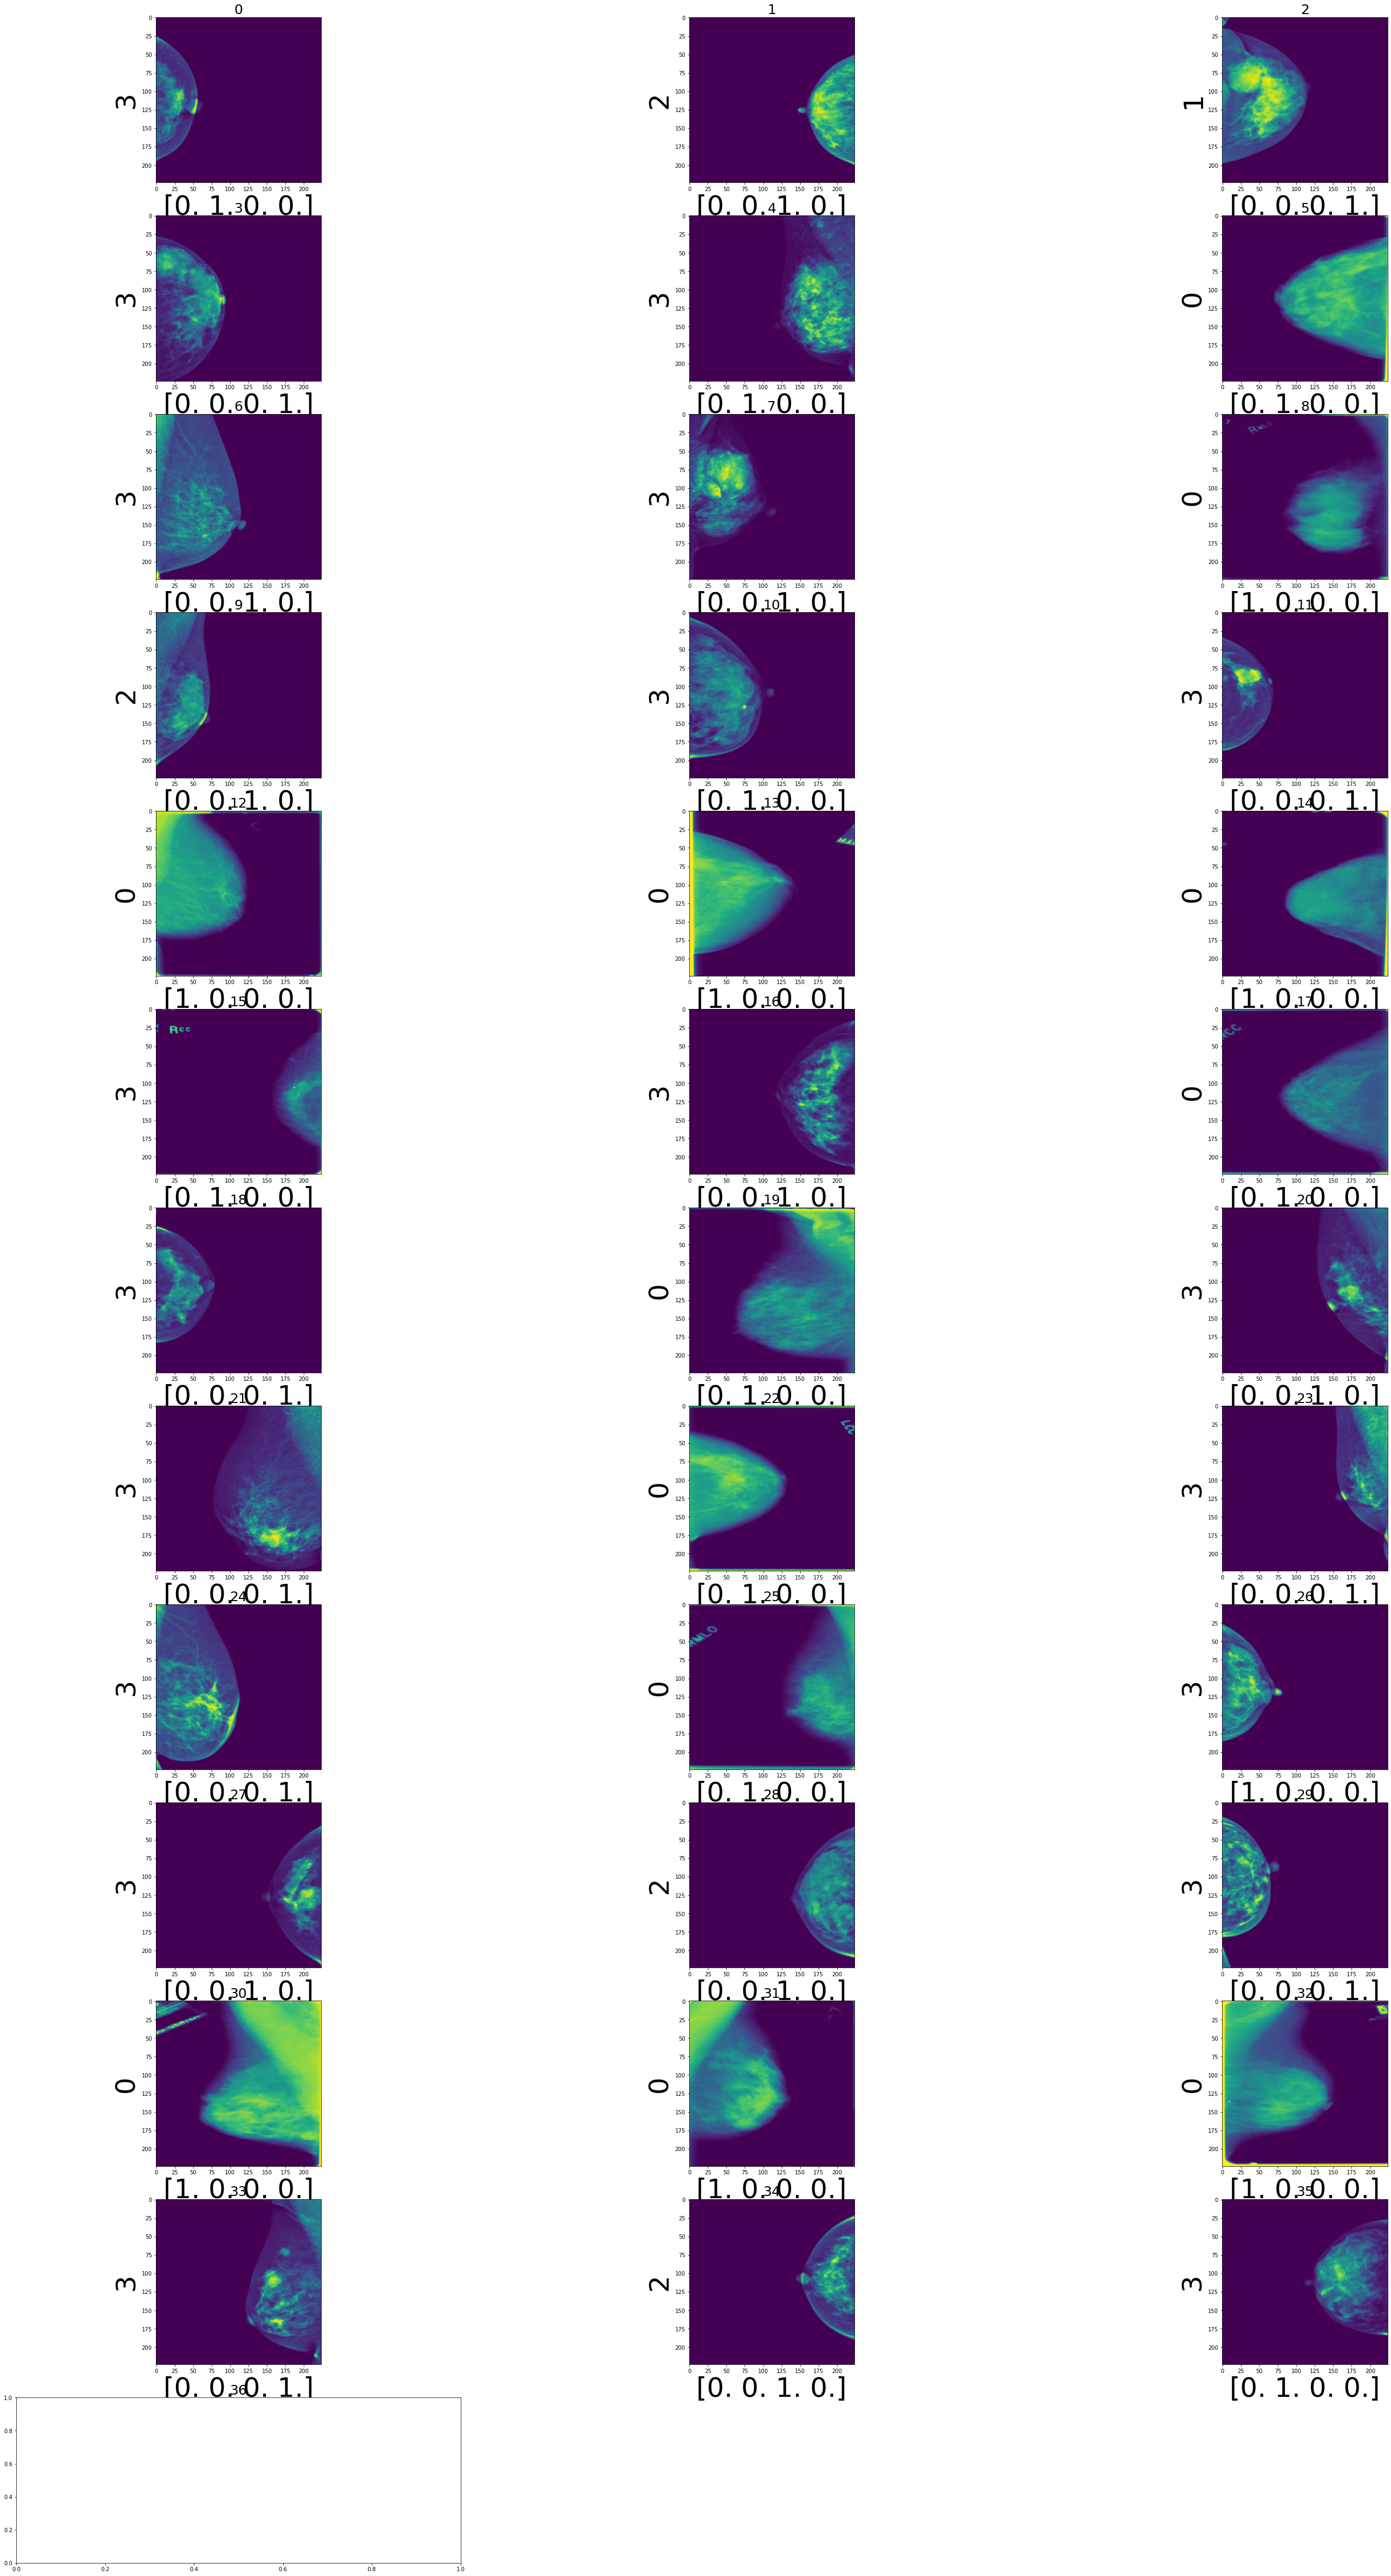

In [ ]:
X_veri2 = X_veri.reshape(X_veri.shape[0], 224, 224, 1)


# making predictions
prediction = model.predict_classes(X_veri2)


import numpy as np
import matplotlib.pyplot as plt

width=50
height=100
rows = 15
cols = 3
axes=[]
fig=plt.figure(figsize=(width,height))

for a in range(rows*cols):
    #b = np.random.randint(7, size=(height,width))
    axes.append( fig.add_subplot(rows, cols, a+1) )
    #subplot_title=str(a)# + ":" + y_veri[a].astype(str)+ " > " + prediction[a].astype(str)
    #axes[-1].set_title(subplot_title)  
    axes[-1].set_title(str(a), fontsize=25)  
    #axes[-1].set(xlabel=y_veri[a], fontsize=18, ylabel=prediction[a])
    axes[-1].set_xlabel(y_veri[a], fontsize=50)
    axes[-1].set_ylabel(prediction[a], fontsize=50)
    plt.imshow(X_veri[a])
    
#fig.tight_layout()    
plt.show()





In [ ]:
model_result_path = "keras_model_100621.h5"
model.save(model_result_path)



In [ ]:
model_result_path = "keras_model_100621.h5"
model.save(model_result_path)

#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

File Uploaded


In [ ]:
!ls

imagesArrTotal.npz  imagesLabelTotal.npz  keras_model_100621.h5


<H2> Model Training Phase (Continues)

In [ ]:
# change optimiser to SGD or vgg16 
# further reduce learning rate
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)


# applying (sigmoid) activation to my 1D convolutional layer (
# from Adam to RMSprop; RMSprop to SGD


In [ ]:
# base = keras.applications.VGG19(input_shape=(100,400,3), 
#                                 include_top=False, 
#                                 input_size=(100,400,3),
#                                 weights='imagenet',
#                                 pooling='max')
# # freeze base layers
# for layer in base.layers:
#     layer.trainable=False

# model = keras.Sequential()
# model.add(base)
# # you should experiment with different top level designs 
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(20, activation='softmax'))

In [ ]:
# try deep narrow tree; low features and image set

# validation set 20% instead of 10%


In [ ]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 8)       80        
_________________________________________________________________
activation_11 (Activation)   (None, 222, 222, 8)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 98568)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 788552    
_________________________________________________________________
activation_12 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, class_weight=classWeight)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59200082 0.59200082 0.59252682 ... 0.59305353 0.59305353 0.59305353]
Model training time starts = 2021-06-11 02:09:35.061211
Train on 12007 samples, validate on 646 samples
Epoch 1/10
12007/12007 [==============================] - 838s 70ms/step - loss: 0.6391 - accuracy: 0.7242 - val_loss: 0.5684 - val_accuracy: 0.7500
Epoch 2/10
12007/12007 [==============================] - 813s 68ms/step - loss: 0.5974 - accuracy: 0.7478 - val_loss: 0.5648 - val_accuracy: 0.7500
Epoch 3/10
12007/12007 [==============================] - 815s 68ms/step - loss: 0.5793 - accuracy: 0.7499 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 4/10
12007/12007 [==============================] - 829s 69ms/step - loss: 0.5623 - accuracy: 0.7525 - val_loss: 0.5628 - val_accuracy: 0.7500
Epoch 5/10
 6624/12007 [===============>..............] - ETA: 5:58 - loss: 0.5505 - accuracy: 0.7522

KeyboardInterrupt: 

In [ ]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
#opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
activation_17 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                12616736  
_________________________________________________________________
activation_18 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)               

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59200082 0.59200082 0.59252682 ... 0.59305353 0.59305353 0.59305353]
Model training time starts = 2021-06-11 03:16:56.617695
Train on 12007 samples, validate on 646 samples
Epoch 1/10
12007/12007 [==============================] - 979s 82ms/step - loss: 0.6108 - accuracy: 0.7459 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 2/10
12007/12007 [==============================] - 979s 82ms/step - loss: 0.5547 - accuracy: 0.7544 - val_loss: 0.5504 - val_accuracy: 0.7500
Epoch 3/10
12007/12007 [==============================] - 975s 81ms/step - loss: 0.5450 - accuracy: 0.7568 - val_loss: 0.5429 - val_accuracy: 0.7500
Epoch 4/10
   64/12007 [..............................] - ETA: 14:48 - loss: 0.5285 - accuracy: 0.7500

KeyboardInterrupt: 

In [ ]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(2, 2), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adam(lr=0.008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
#opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 223, 223, 8)       40        
_________________________________________________________________
activation_19 (Activation)   (None, 223, 223, 8)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 98568)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 788552    
_________________________________________________________________
activation_20 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59200082 0.59200082 0.59252682 ... 0.59305353 0.59305353 0.59305353]
Model training time starts = 2021-06-11 04:07:10.217198
Train on 12007 samples, validate on 646 samples
Epoch 1/10
12007/12007 [==============================] - 428s 36ms/step - loss: 0.6099 - accuracy: 0.7498 - val_loss: 0.5707 - val_accuracy: 0.7500
Epoch 2/10
12007/12007 [==============================] - 433s 36ms/step - loss: 0.5726 - accuracy: 0.7500 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 3/10
  512/12007 [>.............................] - ETA: 6:34 - loss: 0.5699 - accuracy: 0.7500

KeyboardInterrupt: 

In [ ]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(2, 2), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
#opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 223, 223, 8)       40        
_________________________________________________________________
activation_21 (Activation)   (None, 223, 223, 8)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 98568)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 788552    
_________________________________________________________________
activation_22 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                

In [ ]:
#increase batch size - 256 - accuracy stags at -.7500

from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))


[0.59200082 0.59200082 0.59252682 ... 0.59305353 0.59305353 0.59305353]
Model training time starts = 2021-06-11 04:29:49.222141
Train on 12007 samples, validate on 646 samples
Epoch 1/10
 4832/12007 [===========>..................] - ETA: 14:27 - loss: 0.6010 - accuracy: 0.7500

KeyboardInterrupt: 

In [ ]:
#change optimiser

from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(2, 2), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.SGD(lr=0.0008)
#opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 223, 223, 8)       40        
_________________________________________________________________
activation_23 (Activation)   (None, 223, 223, 8)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 98568)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 788552    
_________________________________________________________________
activation_24 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                

In [ ]:

from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))


Model training time starts = 2021-06-11 04:40:06.800855
Train on 12007 samples, validate on 646 samples
Epoch 1/10
12007/12007 [==============================] - 416s 35ms/step - loss: 0.6540 - accuracy: 0.7263 - val_loss: 0.6854 - val_accuracy: 0.7500
Epoch 2/10
12007/12007 [==============================] - 415s 35ms/step - loss: 0.6390 - accuracy: 0.7355 - val_loss: 0.6665 - val_accuracy: 0.7500
Epoch 3/10
  512/12007 [>.............................] - ETA: 6:16 - loss: 0.6337 - accuracy: 0.7334

KeyboardInterrupt: 

In [ ]:

# keras.optimizers.Adagrad(learning_rate=0.001)

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adagrad(learning_rate=0.01)
#opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 223, 223, 8)       40        
_________________________________________________________________
activation_23 (Activation)   (None, 223, 223, 8)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 98568)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 788552    
_________________________________________________________________
activation_24 (Activation)   (None, 8)                 0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                

KeyboardInterrupt: 

In [ ]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(224,224,1)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))

model.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
#opt = keras.optimizers.Adam(lr=0.0008)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 788544)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50466880  
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Model training time starts = 2021-06-11 05:53:50.454745
Train on 10015 samples, validate on 646 samples
Epoch 1/10
10015/10015 [==============================] - 652s 65ms/step - loss: 0.6629 - accuracy: 0.7374 - val_loss: 0.5430 - val_accuracy: 0.7500
Epoch 2/10
10015/10015 [==============================] - 656s 66ms/step - loss: 0.5397 - accuracy: 0.7565 - val_loss: 0.5285 - val_accuracy: 0.7492
Epoch 3/10
10015/10015 [==============================] - 653s 65ms/step - loss: 0.5255 - accuracy: 0.7602 - val_loss: 0.5204 - val_accuracy: 0.7597
Epoch 4/10
10015/10015 [==============================] - 651s 65ms/step - loss: 0.5182 - accuracy: 0.7615 - val_loss: 0.5145 - val_accuracy: 0.7570
Epoch 5/10
10015/10015 [==============================] - 655s 65ms/step - loss: 0.5144 - accuracy: 0.7637 - val_loss: 0.5172 - val_accuracy: 0.7628
Epoch 6/10
10015/10015 [==============================] - 654s 65ms/step - loss

<H3> Try VGG16

In [ ]:
from keras.applications import VGG16
from keras.layers import *
from keras.models import Model

img_size_target = 224

img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
#vgg_model = VGG16(input_tensor=img_conc)

#vgg_model = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,1) )
vgg_model = VGG16(input_tensor=img_conc, include_top=True, weights='imagenet' )

x = Dense(64, activation='relu')(vgg_model.layers[-2].output) 
x = Dropout(0.25)(x)
#x = Dense(64, activation='relu')(x)
#x = Dropout(0.25)(x)
x = Dense(4, activation='sigmoid')(x)

vgg_model=Model(vgg_model.input, x)





In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False

    
from keras.optimizers import adam

opt = keras.optimizers.Adam(lr=0.0001, decay=1e-5)
#opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)

vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='binary_crossentropy')

vgg_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_1[0][0]              
____________________________________________________________________________________________

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



history = vgg_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)

[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Train on 10015 samples, validate on 646 samples
Epoch 1/10
  896/10015 [=>............................] - ETA: 50:05 - loss: 0.7042 - accuracy: 0.6889

<H3> 1 hour per epoch; max per ibm watson 16gb free (50 hours) = 25 epoch
<H3> try save weight and continue training

<H3> kernel died in middle of round 1 vgg16 with 10000 images



In [ ]:
# reduce image size to 1500 per class, dense maintain 64; total 6000 images

from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



history = vgg_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


[0.59141339 0.59141339 0.59089022 ... 0.59351304 0.59351304 0.59351304]
Train on 6019 samples, validate on 646 samples
Epoch 1/10
6019/6019 [==============================] - 2127s 353ms/step - loss: 0.6050 - accuracy: 0.7413 - val_loss: 0.5726 - val_accuracy: 0.7500
Epoch 2/10
6019/6019 [==============================] - 2117s 352ms/step - loss: 0.5721 - accuracy: 0.7468 - val_loss: 0.5900 - val_accuracy: 0.7500
Epoch 3/10
 128/6019 [..............................] - ETA: 31:35 - loss: 0.5611 - accuracy: 0.7285

KeyboardInterrupt: 

In [ ]:
# try half images size, half dense layer to 32

from keras.applications import VGG16
from keras.layers import *
from keras.models import Model

img_size_target = 224

img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
#vgg_model = VGG16(input_tensor=img_conc)

#vgg_model = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,1) )
vgg_model = VGG16(input_tensor=img_conc, include_top=True, weights='imagenet' )

x = Dense(32, activation='relu')(vgg_model.layers[-2].output) 
x = Dropout(0.25)(x)
#x = Dense(64, activation='relu')(x)
#x = Dropout(0.25)(x)
x = Dense(4, activation='sigmoid')(x)

vgg_model=Model(vgg_model.input, x)


In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False

    
from keras.optimizers import adam

opt = keras.optimizers.Adam(lr=0.001) #, decay=1e-5)
#opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)

vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='binary_crossentropy')

vgg_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 224, 224, 3)  0           input_2[0][0]                    
                                                                 input_2[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_2[0][0]              
____________________________________________________________________________________________

In [ ]:
# reduce image size to 1500 per class, dense to 32; total 6000 images

from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



history = vgg_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


[0.59141339 0.59141339 0.59089022 ... 0.59351304 0.59351304 0.59351304]
Train on 6019 samples, validate on 646 samples
Epoch 1/10
2304/6019 [==========>...................] - ETA: 20:05 - loss: 0.6813 - accuracy: 0.7500

KeyboardInterrupt: 

In [ ]:
# try half images size, half dense layer to 32

from keras.applications import VGG16
from keras.layers import *
from keras.models import Model

img_size_target = 224

img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
#vgg_model = VGG16(input_tensor=img_conc)

#vgg_model = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,1) )
vgg_model = VGG16(input_tensor=img_conc, include_top=True, weights='imagenet' )

x = Dense(256, activation='relu')(vgg_model.layers[-2].output) 
x = Dropout(0.25)(x)
#x = Dense(64, activation='relu')(x)
#x = Dropout(0.25)(x)
x = Dense(4, activation='sigmoid')(x)

vgg_model=Model(vgg_model.input, x)

In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False

    
from keras.optimizers import adam

opt = keras.optimizers.Adam(lr=0.01) #, decay=1e-5)
#opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)

vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='binary_crossentropy')

vgg_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 224, 224, 3)  0           input_3[0][0]                    
                                                                 input_3[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_3[0][0]              
____________________________________________________________________________________________

In [ ]:
# reduce image size to 1500 per class, dense to 32; total 6000 images

from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



history = vgg_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)


[0.59141339 0.59141339 0.59089022 ... 0.59351304 0.59351304 0.59351304]
Train on 6019 samples, validate on 646 samples
Epoch 1/10
 128/6019 [..............................] - ETA: 33:45 - loss: 158800.7258 - accuracy: 0.6074

<H3> ibm kernel died

<H3> change to multi-class from multi label



In [ ]:


from keras.applications import VGG16
from keras.layers import *
from keras.models import Model

img_size_target = 224

img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
#vgg_model = VGG16(input_tensor=img_conc)

#vgg_model = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,1) )
vgg_model = VGG16(input_tensor=img_conc, include_top=True, weights='imagenet' )

x = Dense(64, activation='relu')(vgg_model.layers[-2].output) 
x = Dropout(0.25)(x)
#x = Dense(64, activation='relu')(x)
#x = Dropout(0.25)(x)
#x = Dense(4, activation='sigmoid')(x)
x = Dense(4, activation='softmax')(x)

vgg_model=Model(vgg_model.input, x)

In [ ]:
# convert y_train to single dimention multi class


In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False

    
from keras.optimizers import adam

opt = keras.optimizers.Adam(lr=0.001) #, decay=1e-5)
#opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)

#vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='binary_crossentropy')
vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='categorical_crossentropy')
#vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='sparse_categorical_crossentropy')


vgg_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 224, 224, 3)  0           input_2[0][0]                    
                                                                 input_2[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_2[0][0]              
____________________________________________________________________________________________

In [ ]:
from keras.utils import to_categorical

#y_train3 = to_categorical(y_train2)
#y_test3 = to_categorical(y_test2)
#y_veri3 = to_categorical(y_veri2)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_veri = to_categorical(y_veri)


In [ ]:
print(y_train)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
print(np.unique(y_train2))

[0 1 2 3]


In [ ]:
print(X_train.shape, X_test.shape, X_veri.shape)

(6019, 224, 224, 1) (646, 224, 224, 1) (72, 224, 224, 1)


In [ ]:



from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)





history = vgg_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = vgg_model.fit(X_train, y_train2, epochs=10, validation_data=(X_test, y_test2), batch_size=64)


[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Train on 10015 samples, validate on 646 samples
Epoch 1/10
  640/10015 [>.............................] - ETA: 51:36 - loss: 7.3245 - accuracy: 0.2703

<H3> kernel died with 10000 images


In [ ]:

from keras.applications import VGG16
from keras.layers import *
from keras.models import Model

img_size_target = 224

img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  
#vgg_model = VGG16(input_tensor=img_conc)

#vgg_model = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,1) )
vgg_model = VGG16(input_tensor=img_conc, include_top=True, weights='imagenet' )

x = Dense(64, activation='relu')(vgg_model.layers[-2].output) 
x = Dropout(0.25)(x)
#x = Dense(64, activation='relu')(x)
#x = Dropout(0.25)(x)
x = Dense(4, activation='sigmoid')(x)
#x = Dense(4, activation='softmax')(x)

vgg_model=Model(vgg_model.input, x)

In [ ]:
for layer in vgg_model.layers[:-10]:
    layer.trainable = False

    
from keras.optimizers import adam

opt = keras.optimizers.Adam(lr=0.001) #, decay=1e-5)
#opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)

vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='binary_crossentropy')
#vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='categorical_crossentropy')
#vgg_model.compile(optimizer=opt, metrics=['accuracy'], loss='sparse_categorical_crossentropy')


vgg_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        concatenate_1[0][0]              
____________________________________________________________________________________________

In [ ]:


from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)





history = vgg_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = vgg_model.fit(X_train, y_train2, epochs=10, validation_data=(X_test, y_test2), batch_size=64)


[0.59141339 0.59141339 0.59089022 ... 0.59351304 0.59351304 0.59351304]
Train on 6019 samples, validate on 646 samples
Epoch 1/10
6019/6019 [==============================] - 2123s 353ms/step - loss: 0.6905 - accuracy: 0.7365 - val_loss: 0.5798 - val_accuracy: 0.7500
Epoch 2/10
6019/6019 [==============================] - 2115s 351ms/step - loss: 0.5815 - accuracy: 0.7457 - val_loss: 0.5676 - val_accuracy: 0.7500
Epoch 3/10
6019/6019 [==============================] - 2114s 351ms/step - loss: 0.5814 - accuracy: 0.7497 - val_loss: 0.5781 - val_accuracy: 0.7500
Epoch 4/10
5568/6019 [==========================>...] - ETA: 2:26 - loss: 0.5888 - accuracy: 0.7496

KeyboardInterrupt: 

In [ ]:
# save model and target 50 epochs across sessions


model_result_path = "keras_model_i6091_vgg16.h5"
model.save(model_result_path)

#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

In [ ]:
# model.fit(x=X_train, y=y_train, epochs=10,callbacks=[model_callback])#your first training
# tf.saved_model.save(model, save_to_dir_path) #save the model
# del model #to delete the model
# model =  tf.keras.models.load_model(save_to_dir_path)
# model.fit(x=X_train, y=y_train, epochs=10,callbacks=[model_callback])#your second training


# model = load_model("model.h5")
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss 1:', score[0])
# print('Test accuracy 1:', score[1])
# model.fit(x_train, y_train,batch_size=batch_size,epochs=1,verbose=0)
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss 2:', score[0])
# print('Test accuracy 2:', score[1])


<H3> to simplify model layers; train to 50/100 epoch; from above 64/64

In [ ]:

from keras.layers import Activation
from keras.layers import BatchNormalization

model_s = Sequential()

model_s.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(224,224,1)))
model_s.add(Activation('relu'))
#model.add(BatchNormalization())
model_s.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=(224,224,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model_s.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model_s.add(Dense(64))
model_s.add(Activation('relu'))
#model.add(Dense(32, activation='relu'))
model_s.add(Dropout(0.25))
#model.add(Dense(8))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model_s.add(Dense(4, activation='sigmoid'))

model_s.summary()

#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
#opt = keras.optimizers.Adam(lr=0.0008, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
opt = keras.optimizers.Adam(lr=0.0008)

model_s.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 788544)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50466880  
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model_s.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Model training time starts = 2021-06-12 09:22:29.411212
Train on 10015 samples, validate on 646 samples
Epoch 1/10
10015/10015 [==============================] - 658s 66ms/step - loss: 0.6936 - accuracy: 0.7297 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 2/10
10015/10015 [==============================] - 658s 66ms/step - loss: 0.5623 - accuracy: 0.7548 - val_loss: 0.5220 - val_accuracy: 0.7504
Epoch 3/10
10015/10015 [==============================] - 657s 66ms/step - loss: 0.5411 - accuracy: 0.7601 - val_loss: 0.5220 - val_accuracy: 0.7570
Epoch 4/10
10015/10015 [==============================] - 661s 66ms/step - loss: 0.5294 - accuracy: 0.7617 - val_loss: 0.5129 - val_accuracy: 0.7562
Epoch 5/10
10015/10015 [==============================] - 658s 66ms/step - loss: 0.5134 - accuracy: 0.7667 - val_loss: 0.4985 - val_accuracy: 0.7639
Epoch 6/10
10015/10015 [==============================] - 660s 66ms/step - loss

In [ ]:
model_result_path = "keras_model_i10015_64_64.h5"
model_s.save(model_result_path)
print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

model saved
File Uploaded


In [ ]:
# repeat training to 100 epoch
model_s2 = keras.models.load_model(model_result_path)


In [ ]:


from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model_s2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

Model training time starts = 2021-06-12 11:17:38.940928
Train on 10015 samples, validate on 646 samples
Epoch 1/10
10015/10015 [==============================] - 663s 66ms/step - loss: 0.4262 - accuracy: 0.8032 - val_loss: 0.4892 - val_accuracy: 0.7639
Epoch 2/10
10015/10015 [==============================] - 661s 66ms/step - loss: 0.4184 - accuracy: 0.8061 - val_loss: 0.4991 - val_accuracy: 0.7632
Epoch 3/10
10015/10015 [==============================] - 662s 66ms/step - loss: 0.4115 - accuracy: 0.8086 - val_loss: 0.4898 - val_accuracy: 0.7647
Epoch 4/10
10015/10015 [==============================] - 661s 66ms/step - loss: 0.4061 - accuracy: 0.8113 - val_loss: 0.4891 - val_accuracy: 0.7647
Epoch 5/10
10015/10015 [==============================] - 661s 66ms/step - loss: 0.4003 - accuracy: 0.8126 - val_loss: 0.4866 - val_accuracy: 0.7666
Epoch 6/10
10015/10015 [==============================] - 659s 66ms/step - loss: 0.3954 - accuracy: 0.8153 - val_loss: 0.4874 - val_accuracy: 0.7639
Ep

In [ ]:
model_result_path = "keras_model_i10015_64_64_2.h5"
model_s.save(model_result_path)
print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

model saved
File Uploaded


<H3> 20 epoch done

In [ ]:
model_result_path = "keras_model_i10015_64_64_2.h5"
#model_s.save(model_result_path)
#print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.download_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')
    
    # repeat training to 100 epoch
model_s3 = keras.models.load_model(model_result_path)

score = model_s3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

File Downloaded


In [ ]:
# repeat training to 100 epoch
model_s3 = keras.models.load_model(model_result_path)

In [ ]:
score = model_s3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4910283819440718
Test accuracy: 0.7654798626899719


In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model_s3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Model training time starts = 2021-06-13 00:55:49.241403
Train on 10015 samples, validate on 646 samples
Epoch 1/20
10015/10015 [==============================] - 607s 61ms/step - loss: 0.4286 - accuracy: 0.8023 - val_loss: 0.4916 - val_accuracy: 0.7647
Epoch 2/20
10015/10015 [==============================] - 607s 61ms/step - loss: 0.4184 - accuracy: 0.8074 - val_loss: 0.4915 - val_accuracy: 0.7597
Epoch 3/20
10015/10015 [==============================] - 605s 60ms/step - loss: 0.4095 - accuracy: 0.8089 - val_loss: 0.4911 - val_accuracy: 0.7651
Epoch 4/20
10015/10015 [==============================] - 602s 60ms/step - loss: 0.4051 - accuracy: 0.8114 - val_loss: 0.4872 - val_accuracy: 0.7643
Epoch 5/20
10015/10015 [==============================] - 604s 60ms/step - loss: 0.3995 - accuracy: 0.8127 - val_loss: 0.4925 - val_accuracy: 0.7655
Epoch 6/20
10015/10015 [==============================] - 604s 60ms/step - loss

In [ ]:
model_result_path = "keras_model_i10015_64_64_3.h5"
model_s3.save(model_result_path)
print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

model saved
File Uploaded


<H3> 40 epoch done

In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model_s3.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Model training time starts = 2021-06-13 04:19:16.007855
Train on 10015 samples, validate on 646 samples
Epoch 1/30
10015/10015 [==============================] - 606s 61ms/step - loss: 0.3441 - accuracy: 0.8428 - val_loss: 0.4810 - val_accuracy: 0.7663
Epoch 2/30
10015/10015 [==============================] - 600s 60ms/step - loss: 0.3459 - accuracy: 0.8422 - val_loss: 0.4890 - val_accuracy: 0.7585
Epoch 3/30
10015/10015 [==============================] - 603s 60ms/step - loss: 0.3450 - accuracy: 0.8419 - val_loss: 0.4842 - val_accuracy: 0.7647
Epoch 4/30
10015/10015 [==============================] - 606s 61ms/step - loss: 0.3397 - accuracy: 0.8435 - val_loss: 0.4844 - val_accuracy: 0.7674
Epoch 5/30
10015/10015 [==============================] - 608s 61ms/step - loss: 0.3360 - accuracy: 0.8470 - val_loss: 0.4859 - val_accuracy: 0.7682
Epoch 6/30
10015/10015 [==============================] - 603s 60ms/step - loss

In [ ]:
model_result_path = "keras_model_i10015_64_64_4.h5"
model_s3.save(model_result_path)
print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

model saved
File Uploaded


<H3> 70 epoch done

In [ ]:
model_result_path = "keras_model_i10015_64_64_4.h5"
#model_s.save(model_result_path)
#print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.download_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')
    
    # repeat training to 100 epoch
model_s3 = keras.models.load_model(model_result_path)

score = model_s3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

File Downloaded
Test loss: 0.47965523642114644
Test accuracy: 0.7674216032028198


In [ ]:
from sklearn.utils import compute_class_weight
from sklearn.utils import compute_sample_weight


classWeight = compute_sample_weight(class_weight="balanced", y=y_train)

print(classWeight)



from datetime import datetime

dateTimeObj = datetime.now()
print("Model training time starts = " + str(dateTimeObj))


history = model_s3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64, class_weight=classWeight)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


dateTimeObj = datetime.now()
print("Model training time ends = " + str(dateTimeObj))

[0.59188336 0.59188336 0.59156847 ... 0.59314541 0.59314541 0.59314541]
Model training time starts = 2021-06-14 01:17:06.669883
Train on 10015 samples, validate on 574 samples
Epoch 1/20
10015/10015 [==============================] - 656s 65ms/step - loss: 0.3017 - accuracy: 0.8608 - val_loss: 0.4822 - val_accuracy: 0.7609
Epoch 2/20
10015/10015 [==============================] - 652s 65ms/step - loss: 0.3067 - accuracy: 0.8593 - val_loss: 0.4825 - val_accuracy: 0.7613
Epoch 3/20
10015/10015 [==============================] - 657s 66ms/step - loss: 0.2993 - accuracy: 0.8629 - val_loss: 0.4820 - val_accuracy: 0.7666
Epoch 4/20
10015/10015 [==============================] - 653s 65ms/step - loss: 0.3002 - accuracy: 0.8609 - val_loss: 0.4796 - val_accuracy: 0.7652
Epoch 5/20
10015/10015 [==============================] - 657s 66ms/step - loss: 0.2971 - accuracy: 0.8617 - val_loss: 0.4840 - val_accuracy: 0.7648
Epoch 6/20
10015/10015 [==============================] - 670s 67ms/step - loss

In [ ]:
model_result_path = "keras_model_i10015_64_64_5.h5"
model_s3.save(model_result_path)
print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.upload_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Uploaded')

model saved
File Uploaded


<H3> 90 epoch done

In [14]:
model_result_path = "keras_model_i10015_64_64_5.h5"
#model_s3.save(model_result_path)
#print("model saved")


#Upload model file into object storage
#cos.upload_file(Filename=model_result_path, Bucket=credentials_1['BUCKET'], Key=model_result_path)

try:
    cos3.download_file(Filename=model_result_path, Bucket=credentials_3['BUCKET'], Key=model_result_path)
except Exception as e:
    print(Exception, e)
else:
    print('File Downloaded')

File Downloaded


In [15]:
import tensorflow

model_s3 = tensorflow.keras.models.load_model(model_result_path)

<H2> Model Training Phase - Ends

<H2> Model Evaluation Phase

In [16]:
score = model_s3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.48680208587064977
Test accuracy: 0.760453


<H3> Accuracy of the model is 0.76; to use confusion matrix for a clearer picture on the scores; especially in medical domain

In [17]:
prediction = model_s3.predict(X_test)
#prediction = model_s3.predict(X_veri)

print(prediction)


[[1.0852045e-01 1.6259840e-01 3.6968043e-01 2.7830759e-01]
 [5.2334064e-01 3.5228422e-01 1.2815160e-03 5.9113058e-04]
 [8.6161220e-01 2.1951751e-01 8.6424698e-05 1.9316893e-05]
 ...
 [1.3606179e-01 1.9205044e-01 5.1356596e-01 1.7800523e-01]
 [1.6379498e-01 1.5153971e-01 1.8922555e-01 5.1171446e-01]
 [2.2106767e-01 4.9754933e-01 6.5918481e-03 1.6604589e-02]]


In [18]:
#print(y_veri)
print(y_test)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [20]:
prediction=np.argmax(prediction, axis=1)

#y_veri2=np.argmax(y_veri, axis=1)
y_veri2=np.argmax(y_test, axis=1) #use y_test to get confusion matrix first

In [28]:
print(prediction)

print(y_veri2)

[2 0 0 2 3 0 1 2 2 2 2 3 2 1 2 0 1 2 3 1 3 3 2 2 3 0 3 2 2 2 3 0 2 3 2 2 2
 2 2 2 2 3 1 2 0 2 2 2 2 3 0 2 1 2 0 0 0 2 2 0 2 3 1 2 0 1 0 0 2 2 2 2 2 3
 2 2 0 2 2 1 0 2 2 2 2 2 0 2 0 2 0 2 1 2 2 3 2 2 2 2 3 3 2 3 3 0 2 2 2 3 2
 2 0 0 2 2 2 2 3 0 3 0 2 2 2 0 2 2 2 0 2 2 3 2 2 0 2 3 2 1 2 2 0 0 3 3 2 2
 1 0 2 3 2 2 3 2 3 2 2 3 2 2 2 2 3 2 0 2 0 0 2 0 2 1 3 2 2 2 2 0 0 2 2 2 2
 3 3 2 2 3 0 1 3 2 0 2 2 2 0 2 0 3 1 2 3 3 2 2 0 2 2 2 0 2 0 2 0 2 2 2 0 0
 2 2 2 0 2 0 2 2 2 0 3 2 2 2 2 1 2 0 2 3 2 2 0 2 2 3 0 3 3 2 2 2 2 3 3 2 2
 2 0 2 2 2 0 3 2 2 2 2 2 2 2 0 0 1 0 2 2 2 0 3 2 3 2 2 0 3 0 2 0 2 2 0 0 2
 2 2 2 2 0 2 2 0 2 0 3 2 0 0 2 2 0 3 2 2 2 2 1 0 0 0 3 3 2 0 0 2 0 0 0 2 2
 3 1 3 1 2 3 3 2 1 0 0 2 3 2 0 2 2 2 0 3 3 2 0 0 3 0 2 2 2 2 3 2 0 2 2 0 2
 2 0 2 0 0 2 2 0 2 2 2 0 2 1 0 1 3 2 0 0 0 3 3 0 2 0 0 3 1 2 2 3 2 2 0 0 0
 3 2 2 2 2 2 3 2 2 1 2 0 0 2 0 2 2 2 2 2 1 2 2 2 3 2 2 2 0 2 0 0 2 2 2 3 2
 2 2 2 0 2 2 2 2 2 3 2 0 2 0 3 2 2 0 2 0 0 0 2 2 0 2 3 2 2 2 2 3 2 2 2 1 2
 3 3 2 2 2 2 2 2 2 3 2 2 

In [45]:
import sklearn.metrics as metrics


# cm = sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred)
# print(cm)
# print( skm.classification_report(y_true,y_pred))

    
#Calculating and printing the f1 score 
f1_test = metrics.f1_score(y_veri2, prediction, average='micro')
print('The f1 score for the verification data:', f1_test)

# Function to create a confusion matrix 
def conf_matrix(y_test2, pred_test):    
    
    y_unique = np.unique(y_veri2)
    # Creating a confusion matrix
    #con_mat = confusion_matrix(y_test, pred_test)
    con_mat = metrics.multilabel_confusion_matrix(y_test2, pred_test, labels = y_unique)
    con_mat
    
    print(con_mat)
    print(metrics.classification_report(y_test2, pred_test))

#     con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
#     #Ploting the confusion matrix
#     plt.figure(figsize=(6,6))
#     plt.xlabel("Predicted value")
#     plt.ylabel("Actual value")
#     sns.set(font_scale=1.5) 
#     sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    return con_mat
    
#Calling function 
con_mat2 = conf_matrix(y_veri2, prediction)


# x= true class, y = predicted class
#   + -
# + TP FP
# - FN TN

# precision = correct class labelled (TP / TP + FP)
# recall = number of class labelled (TP / TP + FN)


The f1 score for the verification data: 0.46689895470383275
[[[400  44]
  [ 43  87]]

 [[406  12]
  [137  19]]

 [[231 196]
  [ 31 116]]

 [[379  54]
  [ 95  46]]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       130
           1       0.61      0.12      0.20       156
           2       0.37      0.79      0.51       147
           3       0.46      0.33      0.38       141

    accuracy                           0.47       574
   macro avg       0.53      0.48      0.44       574
weighted avg       0.53      0.47      0.43       574



<H2> Model Conclusion

<H3> The 4 multi-label classes are Calcification-Benign, Calcification-Malignant, Mass-Benign, Mass-Malignant
<H3> Although accuracy score of the model is at 0.76, the confusion matrix is a better score to evaluate the model
<H3> Being a medical domain image prediction model, the concern would be towards false-negative (which would delay the treatment time), and lesser towards false-positive (which would still lead to patient inconvenience)
<H3> For the Malignant cases, the (recall) detection of calcification and mass are 0.12 and 0.33 respectively, which are rather low.
<H3> For the Benign cases, the (recall) detection of calcification and mass are 0.67 and 0.79 respectively, which is rather moderate.

<H3> Conclusion of model evaluation : The model has a lot more room for improvement. This can be in terms of number of training images (with more computing and time resource), model training parameters or neural network architecture. It can also be more steps in pre-processing of the images; i.e. narrowing down to the more precise location of the calcifiation or mass. This would require radiographer expertise and incur more budget on a corporate level. These future works are beyond the scope of the project, but would produce a better trained decsion support model that can help to compliment the assessments of the doctors.
    

In [57]:
print(con_mat2)

[[[400  44]
  [ 43  87]]

 [[406  12]
  [137  19]]

 [[231 196]
  [ 31 116]]

 [[379  54]
  [ 95  46]]]


<H4> For further exploration in graphical display

In [47]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

       
    plt.show()

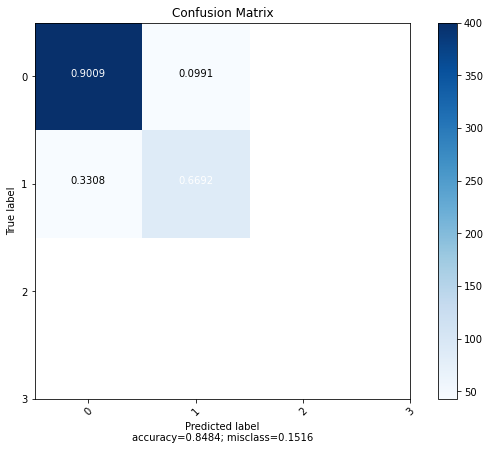

In [58]:
y_unique = np.unique(y_veri2)

plot_confusion_matrix(cm = con_mat2[0], normalize = True, target_names = y_unique,  title = "Confusion Matrix") 


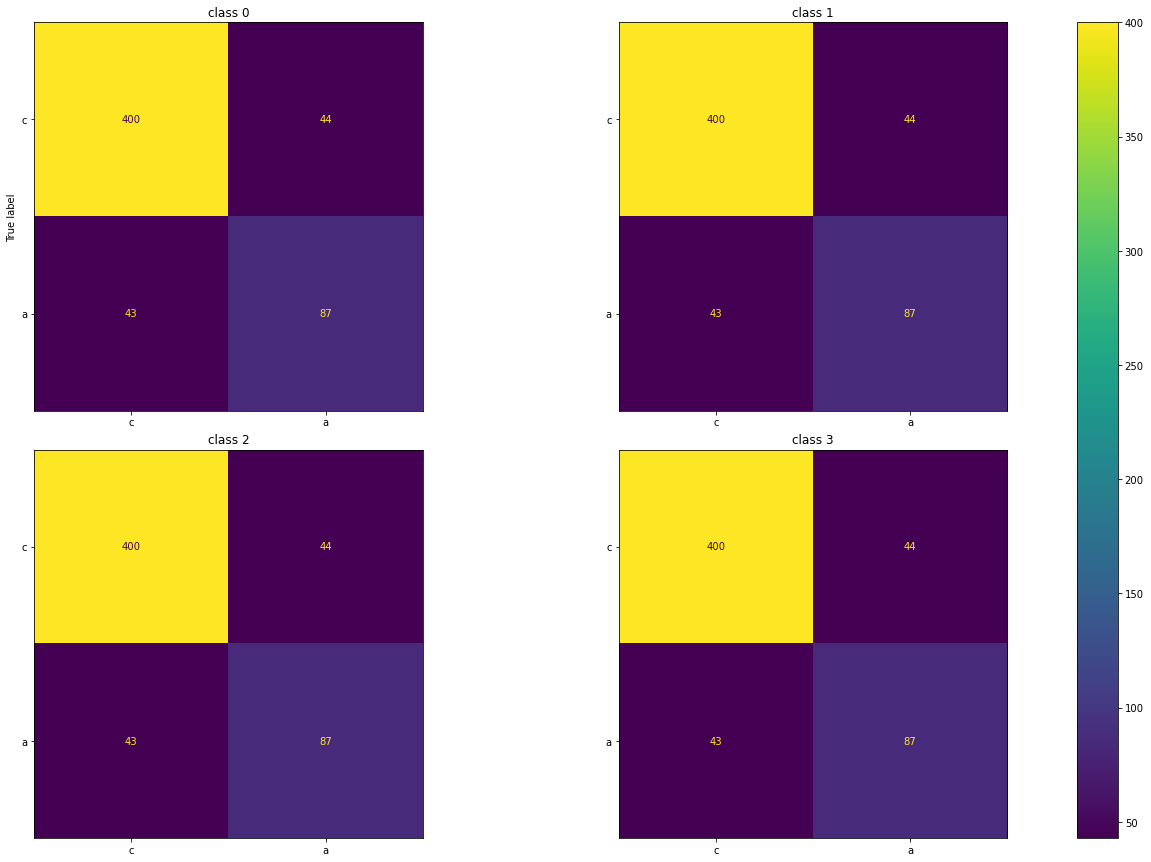

In [53]:
f, axes = plt.subplots(2, 2, figsize=(25, 15))
axes = axes.ravel()

print(axes)

#disp = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat2, display_labels=" calc mass")

#disp = disp.plot(include_values=include_values,
#             cmap=cmap, ax=ax, xticks_rotation=xticks_rotation)

#plt.show()

    
for i in range(4):
#    disp = metrics.ConfusionMatrixDisplay(con_mat2(y_veri2[:, i], prediction[:, i]), display_labels=[0, i])
    #disp = metrics.ConfusionMatrixDisplay(con_mat2(y_veri2[i].tolist(), prediction[i].tolist())

    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat2[0], display_labels="calc mass")
    
    print(disp)
    
    #disp.plot(ax=axes[i], values_format='.4g')
    disp.plot(ax=axes[i])#, values_format='.4g')
    disp.ax_.set_title(f'class {i}')
    if i<10:
         disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 2.9MB 5.2MB/s 


<H2> Model deployment phase

In [ ]:
import pickle

# Save the trained model as a pickle string.
#saved_model = pickle.dumps(knn)
  
# Load the pickled model
#knn_from_pickle = pickle.loads(saved_model)


model_s3.deploy_model(file_name='neural_5.sav')

In [ ]:
#from sklearn.externals 
import joblib

# Save to file in the current working directory
joblib_file = "joblib_model_5.pkl"
joblib.dump(model_s3, joblib_file)

# Load from file
#joblib_model = joblib.load(joblib_file)

['joblib_model_5.pkl']

In [ ]:
# possibly split into 2 model to increase model accuracy and reduce confusion

In [ ]:
!ls

keras_model_i10015_64_64_5.h5  sample_data


<H2> IBM Model deployment

<H3> Changed to Google Collab for deployment as trained model has framework version mismatch with ibm sklearn framework version. (Need to retrain the whole model to continue deployment with Watson Machine Learning.)

In [ ]:
api_key = 'HMMxiTNRQCd0mj1R3V-C3xn3IZ-pMur1VgU5p7CnxQyW'
location = 'us-south'


In [ ]:
wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [ ]:
!pip install -U ibm-watson-machine-learning

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: ibm-watson-machine-learning in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.0.96)


In [ ]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)
print(client.version)

1.0.96


In [ ]:
space_id = '067b34c1-8a1d-4d4c-a1be-56717bff14d0'

In [ ]:
client.spaces.list(limit=10)

------------------------------------  ---------  ------------------------
ID                                    NAME       CREATED
067b34c1-8a1d-4d4c-a1be-56717bff14d0  ibmCourse  2021-06-15T01:31:20.360Z
------------------------------------  ---------  ------------------------


In [ ]:
client.set.default_space(space_id)

'SUCCESS'

In [ ]:
client.repository.list_models()

------------------------------------  -------------------------------------  ------------------------  -----------------
ID                                    NAME                                   CREATED                   TYPE
f251d048-1b19-458e-9e39-69aae965b9b9  Mammogram Abnormality Detection Model  2021-06-15T02:47:44.002Z  scikit-learn_0.23
8c64aa84-3b9e-4083-bb08-4e74affdccfe  Mammogram Abnormality Detection Model  2021-06-15T02:23:06.002Z  scikit-learn_0.23
------------------------------------  -------------------------------------  ------------------------  -----------------


In [ ]:
#client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.1.3'}]

In [ ]:
!tar -czvf model_i10015_64_64_5.tar.gz "joblib_model_5.pkl"

joblib_model_5.pkl


In [ ]:
#!tar -czvf model_i10015_64_64_5.tar.gz "keras_model_i10015_64_64_5.h5"

!tar -zcvf model_i10015_64_64_5.tgz keras_model_i10015_64_64_5.h5


keras_model_i10015_64_64_5.h5


In [ ]:
!tar -czvf model_i10015_64_64_5.tgz "keras_model_i10015_64_64_5.h5"

keras_model_i10015_64_64_5.h5


In [ ]:
!ls

joblib_model_5.pkl	       model_i10015_64_64_5.tar.gz
keras_model_i10015_64_64_5.h5  model_i10015_64_64_5.tgz


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages
Requires: scipy, termcolor, six, google-pasta, numpy, tensorflow-estimator, keras-applications, gast, wheel, astor, grpcio, protobuf, tensorboard, keras-preprocessing, wrapt, opt-einsum, absl-py
Required-by: 


In [ ]:
model_result_path

'keras_model_i10015_64_64_5.h5'

In [ ]:
import tensorflow as tf

tf.__version__

'2.1.0'

In [ ]:
keras.__version__

'2.3.1'

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


#client2 = WatsonMachineLearningAPIClient( <your-credentials> )
client2 = WatsonMachineLearningAPIClient()
    
metadata2 = {
    client2.repository.ModelMetaNames.NAME: "keras model",
    client2.repository.ModelMetaNames.FRAMEWORK_NAME: "tensorflow",
    client2.repository.ModelMetaNames.FRAMEWORK_VERSION: "2.1.0",
    client2.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.3.1'}]
}




ModuleNotFoundError: No module named 'watson_machine_learning_client'

In [ ]:
model_details = client2.repository.store_model( model="model_i10015_64_64_5.tgz", meta_props=metadata )

In [ ]:
sklearn.__version__

'0.23.1'

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [ ]:
metadata = {
    client.repository.ModelMetaNames.NAME: 'Mammogram Abnormality Detection Model',
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
    #client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.3.1'}]    
}


#path_to_tar_gz = 'model_i10015_64_64_5.tar.gz'
path_to_tar_gz = 'model_i10015_64_64_5.tgz'
#path_to_tar_gz = 'joblib_model_5.pkl'

published_model = client.repository.store_model(
    model = path_to_tar_gz,
    meta_props = metadata,
    training_data = None) #iris.data,
    #training_target=iris.feature_names)

In [ ]:
models_details = client.repository.list_models()

------------------------------------  -------------------------------------  ------------------------  -----------------
ID                                    NAME                                   CREATED                   TYPE
b37fba75-047a-4e97-b5cf-d2488b87b228  Mammogram Abnormality Detection Model  2021-06-15T04:29:54.002Z  scikit-learn_0.23
9b783f75-f98c-4741-92fd-e0b2fbb0733c  Mammogram Abnormality Detection Model  2021-06-15T04:10:16.002Z  scikit-learn_0.23
d39601dc-375e-48d0-a366-473dbd21cded  Mammogram Abnormality Detection Model  2021-06-15T03:58:36.002Z  scikit-learn_0.23
cff515fe-4587-4f35-a363-5c3cabb581ed  Mammogram Abnormality Detection Model  2021-06-15T03:46:29.002Z  scikit-learn_0.23
f251d048-1b19-458e-9e39-69aae965b9b9  Mammogram Abnormality Detection Model  2021-06-15T02:47:44.002Z  scikit-learn_0.23
8c64aa84-3b9e-4083-bb08-4e74affdccfe  Mammogram Abnormality Detection Model  2021-06-15T02:23:06.002Z  scikit-learn_0.23
------------------------------------  -------

In [ ]:
client.deployments.list()

------------------------------------  ---------------------------------------------------  ------  ------------------------
GUID                                  NAME                                                 STATE   CREATED
f70dd07d-e438-457d-b72a-4e04e105ac80  Deployment of Mammogram Abnormality Detection Model  failed  2021-06-15T03:59:06.356Z
0a9e0e7d-5948-4c64-b888-92821d7b5566  Deployment of Mammogram Abnormality Detection Model  failed  2021-06-15T03:46:57.657Z
558416ce-2563-46ca-9ee5-4ed2e154ec52  Deployment of Mammogram Abnormality Detection Model  failed  2021-06-15T02:48:35.573Z
3ad1e898-6f67-4faa-a63d-8ba6fc3ef85c  Deployment of Mammogram Abnormality Detection Model  failed  2021-06-15T02:25:15.932Z
------------------------------------  ---------------------------------------------------  ------  ------------------------


In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of Mammogram Abnormality Detection Model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create("b37fba75-047a-4e97-b5cf-d2488b87b228", meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: 'b37fba75-047a-4e97-b5cf-d2488b87b228' started

#######################################################################################


initializing...
failed

--------------------------
Deployment creation failed
--------------------------


No .pickle file found in the saved model artifact. Files found: ['/opt/ibm/scoring/python/workdir/model_4518257d8213b869e3218f6096d4c119_jJNXgbHpOn/keras_model_i10015_64_64_5.h5', '/opt/ibm/scoring/python/workdir/model_4518257d8213b869e3218f6096d4c119_jJNXgbHpOn/artifact_content.tar', '/opt/ibm/scoring/python/workdir/model_4518257d8213b869e3218f6096d4c119_jJNXgbHpOn/artifact_content']


WMLClientError: Deployment creation failed for deployment id: ff566287-4179-407e-a140-5c82a653a38f. Errors: [{'code': 'model_not_found_in_artifact', 'message': "No .pickle file found in the saved model artifact. Files found: ['/opt/ibm/scoring/python/workdir/model_4518257d8213b869e3218f6096d4c119_jJNXgbHpOn/keras_model_i10015_64_64_5.h5', '/opt/ibm/scoring/python/workdir/model_4518257d8213b869e3218f6096d4c119_jJNXgbHpOn/artifact_content.tar', '/opt/ibm/scoring/python/workdir/model_4518257d8213b869e3218f6096d4c119_jJNXgbHpOn/artifact_content']", 'target': {'type': 'none', 'name': 'none'}, 'more_info': 'none'}]

<H2> End IBM model deployment

<H3> Switch to Google Colab

<H2> Google Colab model deployment

In [1]:
#!pip install tensorflow

#!pip install keras

!pip install keras==2.3.1

import tensorflow as tf
#from tensorflow.keras import Sequential

#import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

     |████████████████████████████████| 378kB 8.3MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [2]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [15]:
model_result_path = "/content/drive/MyDrive/keras_model_i10015_64_64_4.h5"



from tensorflow.keras.models import load_model 

#model_s3 = tensorflow.keras.models.load_model(model_result_path)
model_s3 = load_model(model_result_path)

In [5]:
!ls

drive  sample_data


In [ ]:
!pip install fastapi uvicorn

     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 10.1MB 41.7MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 


In [ ]:
!pip install heroku

     |████████████████████████████████| 235kB 9.9MB/s 
  Created wheel for heroku: filename=heroku-0.1.4-cp37-none-any.whl size=12366 sha256=3b2763ca9b363b3d100aed5ba47b8e8d61ddc62861b9dbefc27de9afaa8fb906
  Stored in directory: /root/.cache/pip/wheels/c3/e0/e7/87db45acda4ec7f6c9f75a2cf48753e4671b6f6420567dd815
  Created wheel for python-dateutil: filename=python_dateutil-1.5-cp37-none-any.whl size=203007 sha256=e7db64f814428cfd4beee14016bf9e0a586b49b2042b64ab9bdda4fa42b10d2b
  Stored in directory: /root/.cache/pip/wheels/3e/57/ae/3a3f171dc8c46ac987fa8d7a56fcc19d82ff1a7151cf46a228
Successfully built heroku python-dateutil
ERROR: pandas 1.1.5 has requirement python-dateutil>=2.7.3, but you'll have python-dateutil 1.5 which is incompatible.
ERROR: matplotlib 3.2.2 has requirement python-dateutil>=2.1, but you'll have python-dateutil 1.5 which is incompatible.
ERROR: lunarcalendar 0.0.9 has requirement python-dateutil>=2.6.1, but you'll have python-dateutil 1.5 which is incompatible.
ERRO

<H3> Using uvicorn/ngrok and fastapi for quick protyping of web application on google colab

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 15.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=25cd3f40afda28907122db5721a5bd3df56fb5bcbef280ee086d86e6d17ad9e1
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 747kB 34.9MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 10.1MB 30.2MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=11f9cff0b37846b8e5468cb20f410d8708d8a59b8d1c7d2e99337ea156999078
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!pip install git

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [ ]:
git --version

NameError: ignored

In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [ ]:
import numpy as np
from fastapi import FastAPI, Form
import pandas as pd

from starlette.responses import HTMLResponse
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import image

import tensorflow as tf
import re

import uvicorn
from fastapi import FastAPI, File, UploadFile, Form

!pip install python-multipart

  Created wheel for python-multipart: filename=python_multipart-0.0.5-cp37-none-any.whl size=31677 sha256=4437642465fa6b60bec34a800c90cc2e27f9d233c54e276794c2c0a8767aa9e7
  Stored in directory: /root/.cache/pip/wheels/f0/e6/66/14a866a3cbd6a0cabfbef91f7edf40aa03595ef6c88d6d1be4
Successfully built python-multipart


In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 28.2MB/s 


In [ ]:
!pip install Pillow

from PIL import Image

In [ ]:
import pydicom as dicom
import matplotlib.pylab as plt

import numpy as np

from io import BytesIO
from skimage.transform import resize

img_size = 224


#def predict(image: Image.Image):
def predict(img_test_arr: Image.Image):
    
    resized_arr_test = resize(img_test_arr, (img_size, img_size), anti_aliasing=True) # Reshaping images to preferred size
    resized_arr_test = resized_arr_test/255
    
    
    #image = np.asarray(image.resize((224, 224)))[..., :3]
    #image = np.expand_dims(image, 0)
    #image = image / 127.5 - 1.0
    #image = image / 255
    
    #result = decode_predictions(model_s3.predict(resized_arr_test.reshape(1,img_size,img_size,1)), 2)[0]
    result = model_s3.predict(resized_arr_test.reshape(1,img_size,img_size,1)) #grayscale
    print(result)
    print(result[0])
    #strA = ''.join(result[0])
    #print("strA", strA)

    response = []
    #for i, res in enumerate(result):
    #    resp = {}
    #    resp["class"] = res[1]
        #resp["confidence"] = f"{res[2]*100:0.2f} %"
    #    response.append(resp)
    #resp = {}
    #resp["class"] = "Calc-Benign, Calc-Malignant, Mass-Benign, Mass-Malignant"
    #resp["proba"] = result
     #resp["confidence"] = f"{res[2]*100:0.2f} %"

    #resp = {"class": 'Calc-Benign Calc-Malignant, Mass-Benign, Mass-Malignant', "proba": result}
    #resp = {"proba": result}
    resp = {"class= [Calc-Benign Calc-Malignant, Mass-Benign, Mass-Malignant], proba =" : np.array_str(result[0])}

    response.append(resp)
    

    #return response
    return resp

In [ ]:
# fastapi multipart libraries conflict; resolve by uninstall and reinstall

!pip uninstall multipart
!pip uninstall python-multipart

!pip install python-multipart
import multipart

Uninstalling python-multipart-0.0.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/multipart/*
    /usr/local/lib/python3.7/dist-packages/python_multipart-0.0.5.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled python-multipart-0.0.5
Processing /root/.cache/pip/wheels/f0/e6/66/14a866a3cbd6a0cabfbef91f7edf40aa03595ef6c88d6d1be4/python_multipart-0.0.5-cp37-none-any.whl


In [ ]:
#!pip install python-multipart
import pydicom as dicom
import matplotlib.pylab as plt

from io import BytesIO

from fastapi import FastAPI, File, Form, UploadFile
from fastapi.responses import HTMLResponse

import multipart

app = FastAPI()

def read_imagefile(file) -> Image.Image:
    #imageR = Image.open(BytesIO(file))
    #imageR = dicom.dcmread(image_path)
    imageR = dicom.dcmread(BytesIO(file)).pixel_array
    print("read_imagefile done")
    #ds.pixel_array
    return imageR

@app.post("/predict/image/")
async def predict_api(file: UploadFile = File(...)):
    extension = file.filename.split(".")[-1] in ("jpg", "jpeg", "png", "dcm")
    
    if not extension:
        return "Image must be jpg, png or dcm format!"
    
    #print("here2")
    imageZ = read_imagefile(await file.read())
    #print("here3")    
    prediction = predict(imageZ)
    #print("here4")    
    
    return prediction

@app.get('/predict')
def take_inp():
  content='''
    <html>
        <head>
            <title>Mammogram Abnormality Detection</title>
        </head>  
  <body>
  <form action="/predict/image/" enctype="multipart/form-data" method="post">
  <input name="file" type="file" />
  <input type="submit" />
  </form>
  </body>
  </html>'''

  return HTMLResponse(content=content)

   

#        <form method="post">
#        <input maxlength="28" name="text" type="text" value="Text Emotion to be tested" />
#        <input type="submit" />'''


@app.get('/')
def basic_view():
    return {"WELCOME": "GO TO /docs route, or /post or send post request to /predict "}



In [ ]:
# Terminate open tunnels if exist
ngrok.kill()

In [ ]:
#get confusion matrix scores

In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(8088)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8088)

Public URL: http://0f379a02f808.ngrok.io


INFO:     Started server process [1546]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8088 (Press CTRL+C to quit)


INFO:     202.83.109.254:0 - "GET / HTTP/1.1" 200 OK
INFO:     202.83.109.254:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     202.83.109.254:0 - "GET /predict HTTP/1.1" 200 OK
INFO:     202.83.109.254:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
read_imagefile done
[[0.13943586 0.21104996 0.34523737 0.26855928]]
[0.13943586 0.21104996 0.34523737 0.26855928]
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 200 OK
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/protocols/http/h11_impl.py", line 369, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/middleware/proxy_headers.py", line 59, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/fastapi/applications.py", line 199, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/applications.py", line 112, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 181, in __call__
    raise exc from None
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 159, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.7/dist-pa

read_imagefile done
[[0.80027956 0.1440938  0.00383975 0.00197306]]
[0.80027956 0.1440938  0.00383975 0.00197306]
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 200 OK
read_imagefile done
[[0.5547782  0.27247494 0.00937054 0.00737741]]
[0.5547782  0.27247494 0.00937054 0.00737741]
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 200 OK
read_imagefile done
[[8.1738508e-01 1.7580448e-01 1.2118593e-03 6.5471599e-04]]
[8.1738508e-01 1.7580448e-01 1.2118593e-03 6.5471599e-04]
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 200 OK
read_imagefile done
[[0.4420251  0.3654372  0.00287108 0.00251439]]
[0.4420251  0.3654372  0.00287108 0.00251439]
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 200 OK
read_imagefile done
[[4.8315319e-01 3.9957604e-01 5.2455085e-04 3.6260425e-04]]
[4.8315319e-01 3.9957604e-01 5.2455085e-04 3.6260425e-04]
INFO:     202.83.109.254:0 - "POST /predict/image/ HTTP/1.1" 200 OK
read_imagefile done
[[0.58267    0.3324974

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1546]


In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

<H4> Below just for Internal References

In [ ]:
uvicorn.run("app:app", host='127.0.0.1', port=8128, workers=2)


INFO:     Uvicorn running on http://127.0.0.1:8128 (Press CTRL+C to quit)
INFO:     Started parent process [60]
INFO:     Stopping parent process [60]


In [ ]:
!pip install colabcode

     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 8.3MB 9.8MB/s 
     |████████████████████████████████| 389kB 46.7MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 430kB 44.4MB/s 
     |████████████████████████████████| 122kB 58.7MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.24.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found e

In [ ]:
from colabcode import ColabCode

server = ColabCode(port=1088, code=False)


In [ ]:
!pip install pyngrok --quiet
from pyngrok import ngrok



In [ ]:
# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
public_url = ngrok.connect(port="5000", proto="http", options={"bind_tls": True})
print("Tracking URL:", public_url)

Tracking URL: NgrokTunnel: "http://947f947b130c.ngrok.io" -> "http://localhost:80"


In [ ]:
!uvicorn app:app --reload

INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [620] using statreload
ERROR:    Error loading ASGI app. Could not import module "app".
INFO:     Stopping reloader process [620]
